# Python packages used

## Standard packages

In [1]:
import numpy as np
import scipy

## Zstats v2.0 package

In [2]:
#import functions within
from Zstats import Zfromp, pfromZ #map p-values <-> significance Z 
from Zstats import DeltaP #probability of observing *n* events

#Functions for single-channel counting experiments
from Zstats import pExcl, pDisc #frequentist p-values
from Zstats import CLs #modified-frequentist CLs
from Zstats import CLExcl, CLDisc #Bayesian-motivated statistical measures CLexcl and CLdisc
from Zstats import ZExclObs, ZDiscObs #Observed exclusion and discovery significances
from Zstats import sExclObs, nDiscObs #Observed signal upper limits and Observed number of events needed for discovery
from Zstats import ZExclExp, ZDiscExp #Expected exclusion and discovery significances
from Zstats import sExclExp, sDiscExp #Expected signal upper limits and signal needed for expected discovery

#Functions for multi-channel counting experiments
from Zstats import ZExclObsN_Unc0, ZDiscObsN_Unc0 #Observed exclusion and discovery significances with perfectly known backgrounds
from Zstats import ZExclExpN_Unc0, ZDiscExpN_Unc0 #Expected exclusion and discovery significances with perfectly known backgrounds

#import modules within
from Zstats import FC #contains Feldman-Cousins methods to compute signal upper-limits and experimental sensitivity
from Zstats import ProtonDecay #contains functions to compute statistical significances for proton decay experiments

# Plotting tools

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms

from matplotlib.ticker import MultipleLocator, LogLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)

#Function to shade between any two lines/curves
#x1, y1 are arrays for one line/curve, and x2, y2 are arrays for the other line/curve
def fillbetween(x1,y1,x2,y2, *args, **kwargs):
    plt.fill(
        np.append(x1,x2[::-1]),
        np.append(y1,y2[::-1]),
        *args,
        **kwargs
    )

#For writing text along any line
class RotationAwareAnnotation(mtext.Annotation):
    def __init__(self, s, xy, p, pa=None, ax=None, **kwargs):
        self.ax = ax or plt.gca()
        self.p = p
        if not pa:
            self.pa = xy
        kwargs.update(rotation_mode=kwargs.get("rotation_mode", "anchor"))
        mtext.Annotation.__init__(self, s, xy, **kwargs)
        self.set_transform(mtransforms.IdentityTransform())
        if 'clip_on' in kwargs:
            self.set_clip_path(self.ax.patch)
        self.ax._add_text(self)

    def calc_angle(self):
        p = self.ax.transData.transform_point(self.p)
        pa = self.ax.transData.transform_point(self.pa)
        ang = np.arctan2(p[1]-pa[1], p[0]-pa[0])
        return np.rad2deg(ang)

    def _get_rotation(self):
        return self.calc_angle()

    def _set_rotation(self, rotation):
        pass

    _rotation = property(_get_rotation, _set_rotation)
    
#Plot style
def plot(USE_TEX=True, x_scale='linear', y_scale='linear', x_min=None, y_min=None, x_max=None, y_max=None, x_label = None, y_label = None, title=None, major_xtick=None, major_ytick=None, minor_xtick=None, minor_ytick=None, x2_min = None, x2_max = None, x2_label = None, xl_rotate=None):
    plt.rc('axes', labelsize=40, titlesize=36, lw =3)
    plt.rc('xtick', labelsize=30, direction='in', top=True, labeltop=False)
    plt.rc('ytick', labelsize=30, direction='in', right=True, labelright=False)
    plt.rc('legend', fontsize=20)
    plt.rcParams["legend.framealpha"] = 0.9
    plt.rcParams['xtick.major.width'] = 3
    plt.rcParams['ytick.major.width'] = 3
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['xtick.major.size'] = 13
    plt.rcParams['ytick.major.size'] = 13
    plt.rcParams['xtick.minor.size'] = 6
    plt.rcParams['ytick.minor.size'] = 6
    plt.rcParams['lines.linewidth'] = 1.5
    plt.rcParams['xtick.major.pad'] = 12
    plt.rcParams['ytick.major.pad'] = 8
    plt.rcParams['axes.titlepad'] = 8
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    if x_min or x_max: plt.xlim(xmin=x_min,xmax=x_max)
    if y_min or y_max: plt.ylim(ymin=y_min,ymax=y_max)
    if x_label: plt.xlabel(x_label, labelpad=8)
    if y_label: plt.ylabel(y_label, labelpad=10)
    if title: plt.title(title)
    if xl_rotate: plt.xticks(rotation = xl_rotate)
    if USE_TEX:
        plt.rc('text',usetex=True)
        plt.rcParams['text.latex.preamble'] = r"\boldmath \usepackage{amssymb} \usepackage{xcolor} \usepackage{cancel} \usepackage{amsmath} \usepackage{slashed}"
    if x_scale == 'linear':
        if major_xtick: plt.gca().xaxis.set_major_locator(MultipleLocator(major_xtick))
        if minor_xtick: plt.gca().xaxis.set_minor_locator(MultipleLocator(minor_xtick))
    elif x_scale == 'log':
        plt.gca().xaxis.set_major_locator(LogLocator(base=10, numticks=25))
        plt.gca().xaxis.set_minor_locator(LogLocator(base=10, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1), numticks=25))
    if y_scale == 'linear':
        if major_ytick: plt.gca().yaxis.set_major_locator(MultipleLocator(major_ytick))
        if minor_ytick: plt.gca().yaxis.set_minor_locator(MultipleLocator(minor_ytick))
    elif y_scale == 'log':
        plt.gca().yaxis.set_major_locator(LogLocator(base=10, numticks=25))
        plt.gca().yaxis.set_minor_locator(LogLocator(base=10, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1), numticks=25))

In [4]:
plot()
plt.close()

# Section II-A: Single-channel counting experiments

## Fig 2.1: Illustration of the idea of the CLs statistic for exclusion

### Fig 2.1a

In [87]:
#Inputs
nobs=5#observed number of events
s=8.4#signal
b=2.2#background

nmax=20

#X-axis: number of observed events
n_range = np.arange(0, nmax+1)

#Y-axis: Poisson probability
DeltaP_splusb=[DeltaP(n,scipy.inf,scipy.inf,s,b) for n in n_range]#for s+b hypothesis
DeltaP_b=[DeltaP(n,scipy.inf,scipy.inf,0,b) for n in n_range]#for b-only hypothesis

#X-axis: number of observed events (for shaded regions below)
nobs_range=np.arange(0,nobs+1)

#Y-axis: Poisson probability (for shaded regions below)
DeltaP_splusb_0tonobs=[DeltaP(n,scipy.inf,scipy.inf,s,b) for n in nobs_range]#for s+b hypothesis
DeltaP_b_0tonobs=[DeltaP(n,scipy.inf,scipy.inf,0,b) for n in nobs_range]#for b-only hypothesis

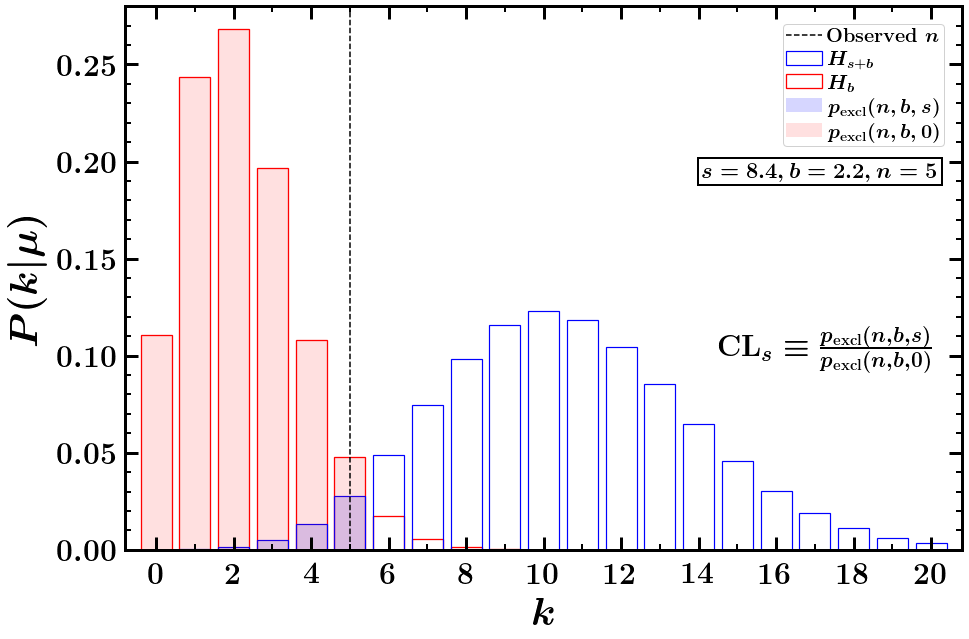

In [20]:
y_min=0
y_max=0.28

x_min=0
x_max=nmax

BARWIDTH=0.8

alpha_edge = 1.0
alpha_null = 0.16
alpha_alt = 0.12

fig = plt.figure(figsize=(15,10))

plt.vlines(nobs, y_min, y_max, color='black', label=r'\textrm{\bf Observed $n$}', ls='--')

plt.bar(n_range,DeltaP_splusb,color='blue', edgecolor='blue', fill=0, width=BARWIDTH, alpha=alpha_edge, label=r'$\textrm{\bf $H_{s + b}$}$', lw=1.2)
plt.bar(n_range,DeltaP_b,color='red', edgecolor='red', fill=0, width=BARWIDTH, alpha=alpha_edge, label=r'$\textrm{\bf $H_b$}$', lw=1.3, zorder=-1)

plt.bar(nobs_range, DeltaP_splusb_0tonobs, color='blue',alpha=alpha_null, label=r'$\textrm{\bf $p_{\rm excl} (n, b, s)$}$', width=BARWIDTH)
plt.bar(nobs_range, DeltaP_b_0tonobs, color='red',alpha=alpha_alt, label=r'$\textrm{\bf $p_{\rm excl} (n, b, 0)$}$', width=BARWIDTH)

plt.text(14.5,0.1,r'$\textrm{\bf CL}_{s} \equiv \frac{p_{\rm excl} (n, b, s)}{p_{\rm excl} (n, b, 0)}$',fontsize=30)

RotationAwareAnnotation(r'$\textrm{\bf $s=%s, b=%s, n=%s$}$' %(s, b, nobs), xy=(13.7, 0.2), p=(20, 0.2), xytext=(15, 0), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.9)

plot(x_min=x_min-2*BARWIDTH/2, y_min=y_min, x_max=x_max+2*BARWIDTH/2, y_max=y_max, x_label=r'$k$', y_label=r'$P (k | \mu)$', major_xtick=2, minor_xtick=1, major_ytick=0.05, minor_ytick=0.01, title=None)

fig.savefig(fname='CLs_illustration1.pdf',bbox_inches='tight')

### Fig2.1b

In [21]:
#Inputs
nobs=5#observed no. of events
s=2.2#signal
b=8.4#background

nmax=20

#X-axis: number of observed events
n_range = np.arange(0, nmax+1)

#Y-axis: Poisson probability
DeltaP_splusb=[DeltaP(n,scipy.inf,scipy.inf,s,b) for n in n_range]#for s+b hypothesis
DeltaP_b=[DeltaP(n,scipy.inf,scipy.inf,0,b) for n in n_range]#for b-only hypothesis

#X-axis: number of observed events (for shaded regions below)
nobs_range=np.arange(0,nobs+1)

#Y-axis: Poisson probability (for shaded regions below)
DeltaP_splusb_0tonobs=[DeltaP(n,scipy.inf,scipy.inf,s,b) for n in nobs_range]#for s+b hypothesis
DeltaP_b_0tonobs=[DeltaP(n,scipy.inf,scipy.inf,0,b) for n in nobs_range]#for b-only hypothesis

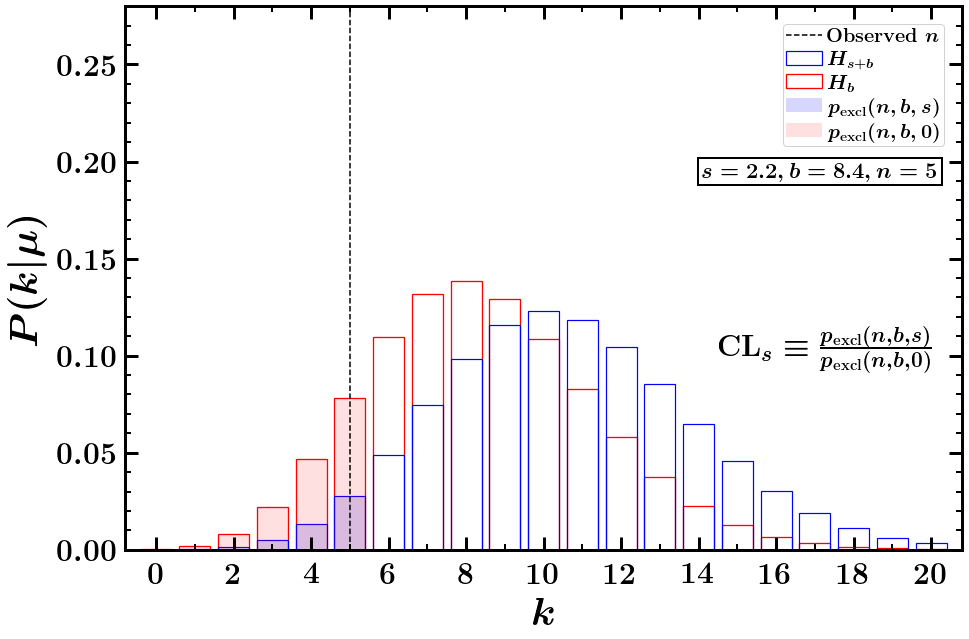

In [22]:
y_min=0
y_max=0.28

x_min=0
x_max=nmax

BARWIDTH=0.8

alpha_edge = 1.0
alpha_null = 0.16
alpha_alt = 0.12

fig = plt.figure(figsize=(15,10))

plt.vlines(nobs, y_min, y_max, color='black', label=r'\textrm{\bf Observed $n$}', ls='--')

plt.bar(n_range,DeltaP_splusb,color='blue', edgecolor='blue', fill=0, width=BARWIDTH, alpha=alpha_edge, label=r'$\textrm{\bf $H_{s + b}$}$', lw=1.2)
plt.bar(n_range,DeltaP_b,color='red', edgecolor='red', fill=0, width=BARWIDTH, alpha=alpha_edge, label=r'$\textrm{\bf $H_b$}$', lw=1.3, zorder=-1)

plt.bar(nobs_range, DeltaP_splusb_0tonobs, color='blue',alpha=alpha_null, label=r'$\textrm{\bf $p_{\rm excl} (n, b, s)$}$', width=BARWIDTH)
plt.bar(nobs_range, DeltaP_b_0tonobs, color='red',alpha=alpha_alt, label=r'$\textrm{\bf $p_{\rm excl} (n, b, 0)$}$', width=BARWIDTH)

plt.text(14.5,0.1,r'$\textrm{\bf CL}_{s} \equiv \frac{p_{\rm excl} (n, b, s)}{p_{\rm excl} (n, b, 0)}$',fontsize=30)

RotationAwareAnnotation(r'$\textrm{\bf $s=%s, b=%s, n=%s$}$' %(s, b, nobs), xy=(13.7, 0.2), p=(20, 0.2), xytext=(15, 0), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.9)

plot(x_min=x_min-2*BARWIDTH/2, y_min=y_min, x_max=x_max+2*BARWIDTH/2, y_max=y_max, x_label=r'$k$', y_label=r'$P (k | \mu)$', major_xtick=2, minor_xtick=1, major_ytick=0.05, minor_ytick=0.01, title=None)

fig.savefig(fname='CLs_illustration2.pdf',bbox_inches='tight')

## Fig 2.2: Comparison of significances obtained from $p_{\text excl}$ and ${\rm CL}_s$

In [5]:
#Inputs
SIGNAL = 4

#X-axis: background mean
bmin = 1e-3
bmax = 1e3
barray = np.geomspace(bmin, bmax, 1000)

#Y-axis
#Significances from pexcl for various number of observed events
Z_pExcl_n0 = [ZExclObs(n=0, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=False) for b in barray]
Z_pExcl_n1 = [ZExclObs(n=1, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=False) for b in barray] 
Z_pExcl_n2 = [ZExclObs(n=2, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=False) for b in barray]
Z_pExcl_n3 = [ZExclObs(n=3, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=False) for b in barray]
              
#Significances from CLs for various number of observed events
Z_CLs_n0 = [ZExclObs(n=0, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=True) for b in barray]
Z_CLs_n1 = [ZExclObs(n=1, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=True) for b in barray]
Z_CLs_n2 = [ZExclObs(n=2, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=True) for b in barray]
Z_CLs_n3 = [ZExclObs(n=3, bhat=b, dbhat=0, s=SIGNAL, CLExclbool=True) for b in barray]

/Users/prudhvibhattiprolu/miniconda3/envs/py38/lib/python3.8/site-packages/Zstats/__init__.py:961: RuntimeWarning: invalid value encountered in double_scalars
  result=pExcl(n,m,tau,b,s,more_info)/pExcl(n,m,tau,b,0,more_info)


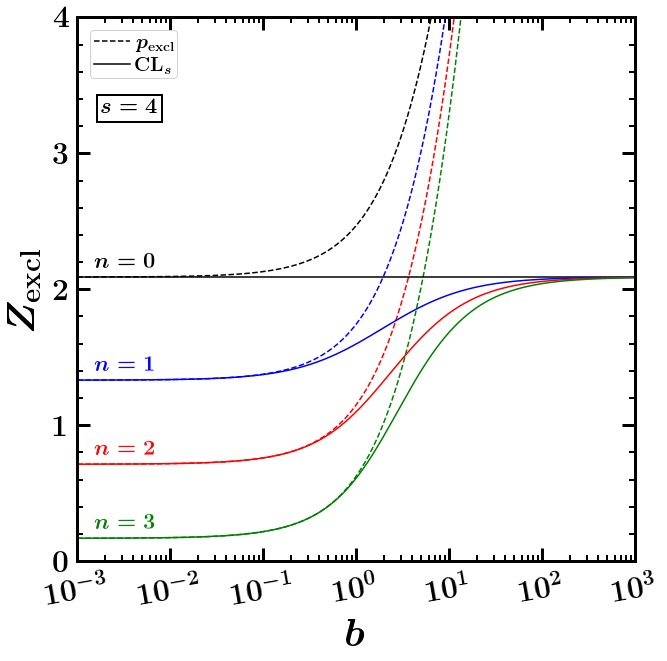

In [6]:
fig = plt.figure(figsize=(10,10))

text=lambda n, x, yoff, color: RotationAwareAnnotation(r'$\textrm{\bf $n=%s$}$' %(n), xy=(x, Zfromp(pExcl(n, np.inf, np.inf, x, SIGNAL))), p=(x+0.005, Zfromp(pExcl(n, np.inf, np.inf, x+0.005, SIGNAL))), xytext=(0, yoff), va='bottom', textcoords="offset points", fontsize=22, color=color)

plt.plot(barray, Z_pExcl_n0, ls='--', color='black', label=r'\textrm{\bf $p_{\rm excl}$}')
plt.plot(barray, Z_pExcl_n1, ls='--', color='blue')
plt.plot(barray, Z_pExcl_n2, ls='--', color='red')
plt.plot(barray, Z_pExcl_n3, ls='--', color='green')
                           
plt.plot(barray, Z_CLs_n0, ls='-', color='black', label=r'\textrm{\bf ${\rm CL}_s$}')
plt.plot(barray, Z_CLs_n1, ls='-', color='blue')
plt.plot(barray, Z_CLs_n2, ls='-', color='red')
plt.plot(barray, Z_CLs_n3, ls='-', color='green')

text(0, 0.0015, 5, color='black')
text(1, 0.0015, 5, color='blue')
text(2, 0.0015, 5, color='red')
text(3, 0.0015, 5, color='green')

#plt.hlines(0, 0.001, 100, color='grey')

RotationAwareAnnotation('$\\textrm{\\bf $s = %s$}$' %(SIGNAL), xy=(1.8e-3, 3.4), p=(30, 3.4), xytext=(0, 0), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

plot(x_scale='log', xl_rotate=10, x_min=bmin, x_max=bmax, y_min=0, y_max=4, x_label=r'$b$', y_label=r'$\textrm{\bf $Z_{\rm excl}$}$', title=None, major_ytick=1, minor_ytick=0.2)

fig.savefig(fname='pExcl_CLs_s4_varyingb.pdf',bbox_inches='tight')

## Fig 2.3: 90%CL and 95%CL upper limits on signal

In [13]:
#To obtain upper limits obtained by Feldman-Cousins method that are non-increasing as a function of background mean
def non_inc_func(array):
    result=[]
    for i in range(len(array)):
        temp=[]
        for j in range(i+1, len(array)):
            if array[j] > array[i]:
                temp.append(array[j])
        if len(temp) >= 1:
            result.append(max(temp))
        else:
            result.append(array[i])
    return result

### Fig 2.3a

In [15]:
#X-axis: background mean
barray = np.geomspace(1e-3, 50, num=1500)

#Y-axis
#Feldman-Cousins upper limits (before requiring them to be non-increasing as a function of b)
FC_n0=[FC.UpperLimit(0, b, CL=0.9) for b in barray]
FC_n1=[FC.UpperLimit(1, b, CL=0.9) for b in barray]
FC_n2=[FC.UpperLimit(2, b, CL=0.9) for b in barray]

#CLs upper limits
CLs_n0=[sExclObs(n=0, bhat=b, CLExclbool=True, CL=0.9) for b in barray]
CLs_n1=[sExclObs(n=1, bhat=b, CLExclbool=True, CL=0.9) for b in barray]
CLs_n2=[sExclObs(n=2, bhat=b, CLExclbool=True, CL=0.9) for b in barray]

#standard frequentist upper limits
pExcl_n0=[sExclObs(n=0, bhat=b, CLExclbool=False, CL=0.9) for b in barray]
pExcl_n1=[sExclObs(n=1, bhat=b, CLExclbool=False, CL=0.9) for b in barray]
pExcl_n2=[sExclObs(n=2, bhat=b, CLExclbool=False, CL=0.9) for b in barray]

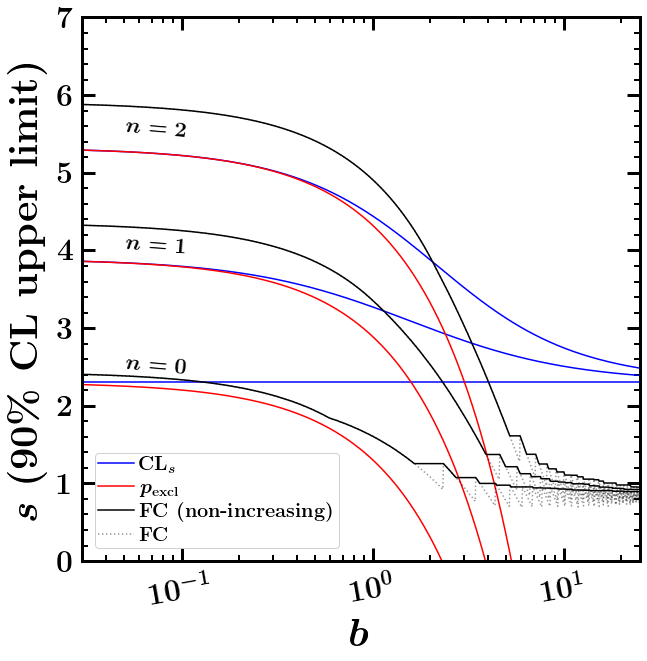

In [16]:
color_CLs = 'blue'
text_CLs=lambda n, x, yoff: RotationAwareAnnotation(r'$\textrm{\bf $n=%s$}$' %(n), xy=(x, sExclObs(n, x)), p=(x+0.1, sExclObs(n, x+0.1)), xytext=(0, yoff), va='bottom', textcoords="offset points", fontsize=22)

color_pExcl = 'red'

color_FC = 'black'
alpha_FC = 0.4
text_FC=lambda n, x, yoff: RotationAwareAnnotation(r'$\textrm{\bf $n=%s$}$' %(n), xy=(x, FC.UpperLimit(n, x)), p=(x+0.1, FC.UpperLimit(n, x+0.1)), xytext=(0, yoff), va='bottom', textcoords="offset points", fontsize=22)

fig = plt.figure(figsize=(10,10))

plt.plot(barray, CLs_n0, color=color_CLs, label=r'\textrm{\bf ${\rm CL}_s$}')
plt.plot(barray, CLs_n1, color=color_CLs)
plt.plot(barray, CLs_n2, color=color_CLs)

plt.plot(barray, pExcl_n0, color=color_pExcl, ls='-', label=r'\textrm{\bf $p_{\rm excl}$}')
plt.plot(barray, pExcl_n1, color=color_pExcl, ls='-')
plt.plot(barray, pExcl_n2, color=color_pExcl, ls='-')

plt.plot(barray, non_inc_func(FC_n0), color=color_FC, label=r'\textrm{\bf FC (non-increasing)}')
plt.plot(barray, FC_n0, color=color_FC, alpha=alpha_FC, ls=':', label=r'\textrm{\bf FC}')

plt.plot(barray, non_inc_func(FC_n1), color=color_FC)
plt.plot(barray, FC_n1, color=color_FC, alpha=alpha_FC, ls=':')

plt.plot(barray, non_inc_func(FC_n2), color=color_FC)
plt.plot(barray, FC_n2, color=color_FC, alpha=alpha_FC, ls=':')

text_FC(0, 0.05, 3)
text_CLs(1, 0.05, 10)
text_CLs(2, 0.05, 15)

plt.hlines(0, 0.001, 100, color='grey')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=3)

plot(x_scale='log', xl_rotate=10, x_min=3e-2, x_max=2.5e1, y_min=0, y_max=7, x_label=r'$b$', y_label=r'\textrm{\bf $s$ (90\% CL upper limit)}', title=None, major_xtick=2, minor_xtick=0.5, major_ytick=1, minor_ytick=0.2)

fig.savefig(fname='sUL_fixn_90CL.pdf',bbox_inches='tight')

### Fig 2.3b

In [17]:
#X-axis: background mean
barray = np.geomspace(1e-3, 50, num=1500)

#Y-axis
#Feldman-Cousins upper limits (before requiring them to be non-increasing as a function of b)
FC_n0_95=[FC.UpperLimit(0, b, CL=0.95) for b in barray]
FC_n1_95=[FC.UpperLimit(1, b, CL=0.95) for b in barray]
FC_n2_95=[FC.UpperLimit(2, b, CL=0.95) for b in barray]

#CLs upper limits
CLs_n0_95=[sExclObs(n=0, bhat=b, CLExclbool=True, CL=0.95) for b in barray]
CLs_n1_95=[sExclObs(n=1, bhat=b, CLExclbool=True, CL=0.95) for b in barray]
CLs_n2_95=[sExclObs(n=2, bhat=b, CLExclbool=True, CL=0.95) for b in barray]

#standard frequentist upper limits
pExcl_n0_95=[sExclObs(n=0, bhat=b, CLExclbool=False, CL=0.95) for b in barray]
pExcl_n1_95=[sExclObs(n=1, bhat=b, CLExclbool=False, CL=0.95) for b in barray]
pExcl_n2_95=[sExclObs(n=2, bhat=b, CLExclbool=False, CL=0.95) for b in barray]

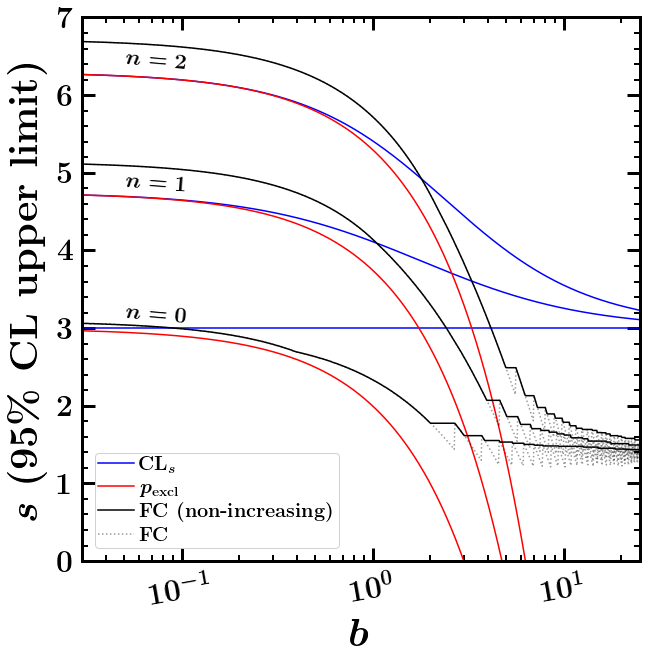

In [18]:
color_CLs = 'blue'
text_CLs=lambda n, x, yoff: RotationAwareAnnotation(r'$\textrm{\bf $n=%s$}$' %(n), xy=(x, sExclObs(n, x, CL=0.95)), p=(x+0.1, sExclObs(n, x+0.1, CL=0.95)), xytext=(0, yoff), va='bottom', textcoords="offset points", fontsize=22)

color_pExcl = 'red'

color_FC = 'black'
alpha_FC = 0.4
text_FC=lambda n, x, yoff: RotationAwareAnnotation(r'$\textrm{\bf $n=%s$}$' %(n), xy=(x, FC.UpperLimit(n, x, CL=0.95)), p=(x+0.1, FC.UpperLimit(n, x+0.1, CL=0.95)), xytext=(0, yoff), va='bottom', textcoords="offset points", fontsize=22)

fig = plt.figure(figsize=(10,10))

plt.plot(barray, CLs_n0_95, color=color_CLs, label=r'\textrm{\bf ${\rm CL}_s$}')
plt.plot(barray, CLs_n1_95, color=color_CLs)
plt.plot(barray, CLs_n2_95, color=color_CLs)

plt.plot(barray, pExcl_n0_95, color=color_pExcl, ls='-', label=r'\textrm{\bf $p_{\rm excl}$}')
plt.plot(barray, pExcl_n1_95, color=color_pExcl, ls='-')
plt.plot(barray, pExcl_n2_95, color=color_pExcl, ls='-')

plt.plot(barray, non_inc_func(FC_n0_95), color=color_FC, label=r'\textrm{\bf FC (non-increasing)}')
plt.plot(barray, FC_n0_95, color=color_FC, alpha=alpha_FC, ls=':', label=r'\textrm{\bf FC}')

plt.plot(barray, non_inc_func(FC_n1_95), color=color_FC)
plt.plot(barray, FC_n1_95, color=color_FC, alpha=alpha_FC, ls=':')

plt.plot(barray, non_inc_func(FC_n2_95), color=color_FC)
plt.plot(barray, FC_n2_95, color=color_FC, alpha=alpha_FC, ls=':')

text_FC(0, 0.05, 3)
text_CLs(1, 0.05, 5)
text_CLs(2, 0.05, 8)

plt.hlines(0, 0.001, 100, color='grey')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=3)

plot(x_scale='log', xl_rotate=10, x_min=3e-2, x_max=2.5e1, y_min=0, y_max=7, x_label=r'$b$', y_label=r'\textrm{\bf $s$ (95\% CL upper limit)}', title=None, major_xtick=2, minor_xtick=0.5, major_ytick=1, minor_ytick=0.2)

fig.savefig(fname='sUL_fixn_95CL.pdf',bbox_inches='tight')

## Fig 2.4: Comparison of significances obtained from $p_{\rm disc}$ and ${\rm CL}_{\rm disc}$

### Fig 2.4a

In [7]:
#Inputs
n_fix = 10#observed number of events

#X-axis: signal mean
smin = 0.1
smax = 50
sarray = np.append(np.geomspace(1e-8, 1e-1, 100), np.arange(smin, smax+0.1, 0.1))

#Y-axis: Discovery significances for fixed number of observed events and various choices of background mean - b = {0.1, 1, 3}

#Standard frequentist - pdisc (independent of s)
Z_pDisc_b0p1=[ZDiscObs(n=n_fix, bhat=0.1, dbhat=0, s=s, CLDiscbool=False) for s in sarray]
Z_pDisc_b1=[ZDiscObs(n=n_fix, bhat=1, dbhat=0, s=s, CLDiscbool=False) for s in sarray]
Z_pDisc_b3=[ZDiscObs(n=n_fix, bhat=3, dbhat=0, s=s, CLDiscbool=False) for s in sarray]

#Bayesian measure - CLDisc (Bayes factor)
Z_CLDisc_b0p1=[ZDiscObs(n=n_fix, bhat=0.1, dbhat=0, s=s, CLDiscbool=True) for s in sarray]
Z_CLDisc_b1=[ZDiscObs(n=n_fix, bhat=1, dbhat=0, s=s, CLDiscbool=True) for s in sarray]
Z_CLDisc_b3=[ZDiscObs(n=n_fix, bhat=3, dbhat=0, s=s, CLDiscbool=True) for s in sarray]

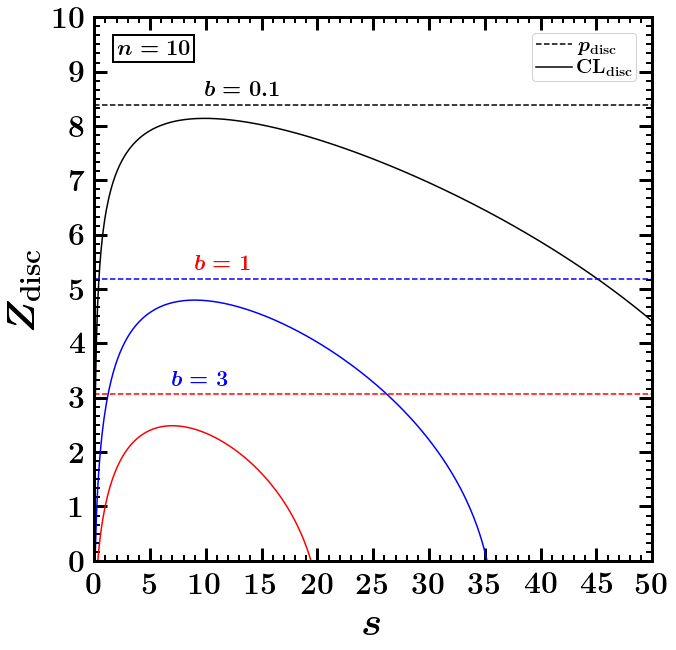

In [8]:
text = lambda s, b, color: RotationAwareAnnotation(r'$b=%s$' %(b), xy=(s, Zfromp(pDisc(n=n_fix, m=np.inf, tau=np.inf, b=b))), p=(s+10, Zfromp(pDisc(n=n_fix, m=np.inf, tau=np.inf, b=b))), xytext=(0, 5), va='bottom', textcoords="offset points", fontsize=22, color=color)

fig = plt.figure(figsize=(10,10))

plt.plot(sarray, Z_pDisc_b0p1, color='black', ls='--', label=r'$\textrm{\bf $p_{\rm disc}$}$')
plt.plot(sarray, Z_CLDisc_b0p1, color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$}$')
text(n_fix - 0.1, 0.1, 'black')

plt.plot(sarray, Z_pDisc_b1, color='blue', ls='--')
plt.plot(sarray, Z_CLDisc_b1, color='blue', ls='-')
text(n_fix - 1, 1, 'red')

plt.plot(sarray, Z_pDisc_b3, color='red', ls='--')
plt.plot(sarray, Z_CLDisc_b3, color='red', ls='-')
text(n_fix - 3, 3, 'blue')

RotationAwareAnnotation('$\\textrm{\\bf $n = %s$}$' %(n_fix), xy=(2, 9.6), p=(30, 9.6), xytext=(0, 0), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8)

plot(x_scale='linear', y_scale='linear', x_min=0, x_max=smax,
     y_min=0, y_max=10,
     y_label=r'$\textrm{\bf $Z_{\rm disc}$}$', x_label=r'$s$',
     major_xtick=5, minor_xtick=1,
     major_ytick=1, minor_ytick=1/6,
     xl_rotate=0)

fig.savefig(fname='pDisc_CLDisc_n10_varyings.pdf',bbox_inches='tight')

### Fig 2.4b

In [9]:
#Inputs
n_fix = 3#observed number of events

#X-axis: signal mean
smin = 0.1
smax = 30
sarray = np.append(np.geomspace(1e-8, 1e-1, 100), np.arange(smin, smax+0.1, 0.1))

#Y-axis: Discovery significances for fixed number of observed events and various choices of background mean - b = {0.1, 1, 3}

#Standard frequentist - pdisc (independent of s)
Z_pDisc_b0p00001=[ZDiscObs(n=n_fix, bhat=1e-5, dbhat=0, s=s, CLDiscbool=False) for s in sarray]
Z_pDisc_b0p01=[ZDiscObs(n=n_fix, bhat=0.01, dbhat=0, s=s, CLDiscbool=False) for s in sarray]
Z_pDisc_b0p2=[ZDiscObs(n=n_fix, bhat=0.2, dbhat=0, s=s, CLDiscbool=False) for s in sarray]

#Bayesian measure - CLDisc (Bayes factor)
Z_CLDisc_b0p00001=[ZDiscObs(n=n_fix, bhat=1e-5, dbhat=0, s=s, CLDiscbool=True) for s in sarray]
Z_CLDisc_b0p01=[ZDiscObs(n=n_fix, bhat=0.01, dbhat=0, s=s, CLDiscbool=True) for s in sarray]
Z_CLDisc_b0p2=[ZDiscObs(n=n_fix, bhat=0.2, dbhat=0, s=s, CLDiscbool=True) for s in sarray]

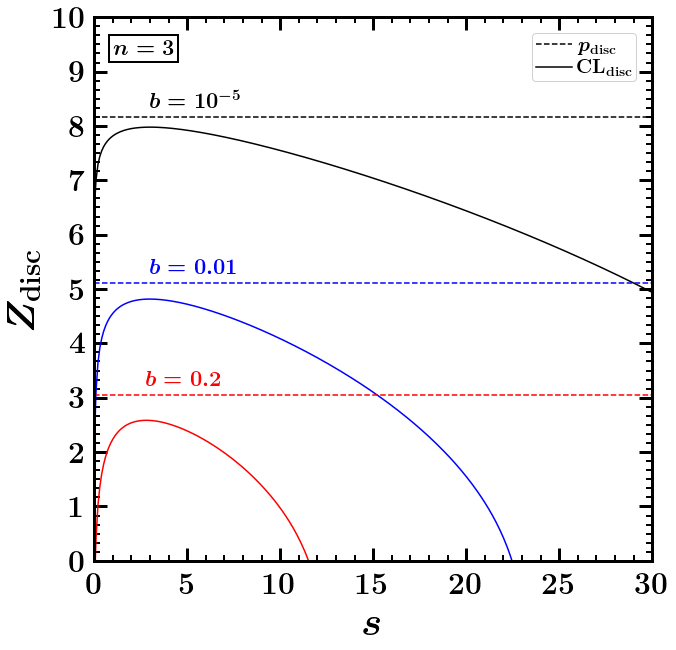

In [10]:
text = lambda s, b, color: RotationAwareAnnotation(r'$b=%s$' %(b), xy=(s, Zfromp(pDisc(n=n_fix, m=np.inf, tau=np.inf, b=b))), p=(s+10, Zfromp(pDisc(n=n_fix, m=np.inf, tau=np.inf, b=b))), xytext=(0, 5), va='bottom', textcoords="offset points", fontsize=22, color=color)

fig = plt.figure(figsize=(10,10))

plt.plot(sarray, Z_pDisc_b0p00001, color='black', ls='--', label=r'$\textrm{\bf $p_{\rm disc}$}$')
plt.plot(sarray, Z_CLDisc_b0p00001, color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$}$')
RotationAwareAnnotation(r'$b = 10^{-5}$', xy=(n_fix - 1e-5, Zfromp(pDisc(n=n_fix, m=np.inf, tau=np.inf, b=1e-5))), p=(n_fix - 1e-5 + 10, Zfromp(pDisc(n=n_fix, m=np.inf, tau=np.inf, b=1e-5))), xytext=(0, 5), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.plot(sarray, Z_pDisc_b0p01, color='blue', ls='--')
plt.plot(sarray, Z_CLDisc_b0p01, color='blue', ls='-')
text(n_fix - 0.01, 0.01, 'blue')

plt.plot(sarray, Z_pDisc_b0p2, color='red', ls='--')
plt.plot(sarray, Z_CLDisc_b0p2, color='red', ls='-')
text(n_fix - 0.2, 0.2, 'red')

RotationAwareAnnotation('$\\textrm{\\bf $n = %s$}$' %(n_fix), xy=(1, 9.6), p=(30, 9.6), xytext=(0, 0), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8)

plot(x_scale='linear', y_scale='linear', x_min=0, x_max=smax,
     y_min=0, y_max=10,
     y_label=r'$\textrm{\bf $Z_{\rm disc}$}$', x_label=r'$s$',
     major_xtick=5, minor_xtick=1,
     major_ytick=1, minor_ytick=1/6,
     xl_rotate=0)

fig.savefig(fname='pDisc_CLDisc_n3_varyings.pdf',bbox_inches='tight')

## Fig 2.5: Events needed for discovery 

### Fig 2.5a

In [24]:
#Inputs
ZCRIT=3#Significance needed for discovery

#X-axis: background mean
barray = np.geomspace(1e-4, 1e1, 1000)

#Y-axis: observed number of events needed for discovery using various measures
#Standard frequentist - pDisc
n_pDisc = [nDiscObs(bhat=b, dbhat=0.0*b, Z=ZCRIT, integer_only=1) for b in barray]

#Bayes factor - CLDisc with signal mean s = {2, 10}
n_CLDisc_s2 = [nDiscObs(bhat=b, dbhat=0.0*b, CLDiscbool=True, s=2.0, Z=ZCRIT, integer_only=1) for b in barray]
n_CLDisc_s10 = [nDiscObs(bhat=b, dbhat=0.0*b, CLDiscbool=True, s=10.0, Z=ZCRIT, integer_only=1) for b in barray]

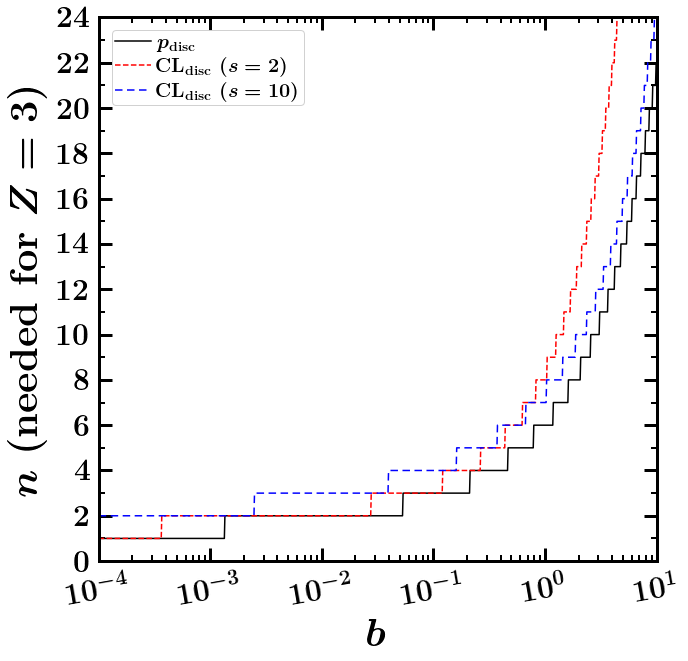

In [25]:
NMAX=24

fig = plt.figure(figsize=(10,10))

plt.plot(barray, n_pDisc, color='black', label=r'$\textrm{\bf $p_{\rm disc}$}$')
plt.plot(barray, n_CLDisc_s2, color='red', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$ ($s=2$)}$', ls='--')
plt.plot(barray, n_CLDisc_s10, color='blue', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$ ($s=10$)}$', ls=(0, (5, 3)))

plot(x_scale='log', x_label=r'$b$', y_label=r'\textrm{\bf $n$ (needed for $Z = %s$)}' %(ZCRIT), title=None, x_min=1e-4, x_max=1e1, major_xtick=2, minor_xtick=0.2, y_min=0, y_max=NMAX, major_ytick=2, minor_ytick=1, xl_rotate=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=2)

fig.savefig(fname='nneededforZ%s.pdf' %(ZCRIT),bbox_inches='tight')

### Fig 2.5b

In [26]:
#Inputs
ZCRIT=5#Significance needed for discovery

#X-axis: background mean
barray = np.geomspace(1e-4, 1e1, 1000)

#Y-axis: observed number of events needed for discovery using various measures
#Standard frequentist - pDisc
n_pDisc = [nDiscObs(bhat=b, dbhat=0.0*b, Z=ZCRIT, integer_only=1) for b in barray]

#Bayes factor - CLDisc with signal mean s = {2, 10}
n_CLDisc_s2 = [nDiscObs(bhat=b, dbhat=0.0*b, CLDiscbool=True, s=2.0, Z=ZCRIT, integer_only=1) for b in barray]
n_CLDisc_s10 = [nDiscObs(bhat=b, dbhat=0.0*b, CLDiscbool=True, s=10.0, Z=ZCRIT, integer_only=1) for b in barray]

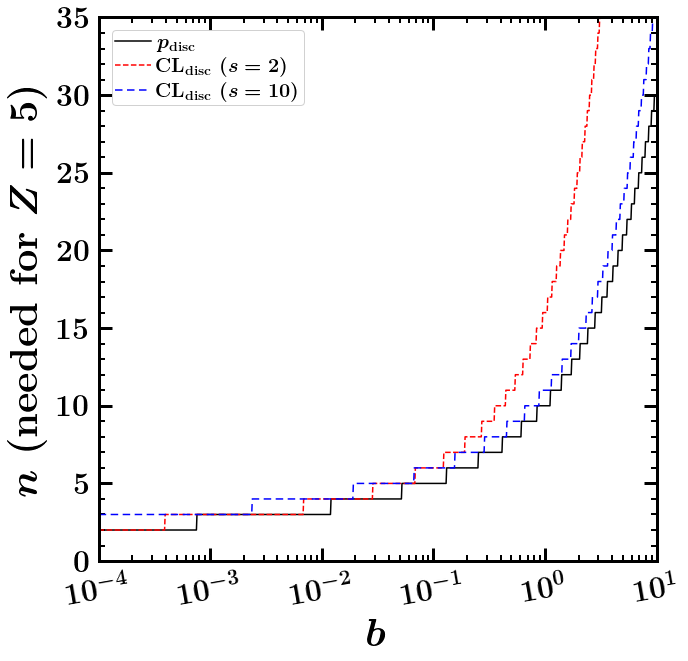

In [27]:
NMAX=35

fig = plt.figure(figsize=(10,10))

plt.plot(barray, n_pDisc, color='black', label=r'$\textrm{\bf $p_{\rm disc}$}$')
plt.plot(barray, n_CLDisc_s2, color='red', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$ ($s=2$)}$', ls='--')
plt.plot(barray, n_CLDisc_s10, color='blue', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$ ($s=10$)}$', ls=(0, (5, 3)))

plot(x_scale='log', x_label=r'$b$', y_label=r'\textrm{\bf $n$ (needed for $Z=%s$)}' %(ZCRIT), title=None, x_min=1e-4, x_max=1e1, major_xtick=2, minor_xtick=0.2, y_min=0, y_max=NMAX, major_ytick=5, minor_ytick=1, xl_rotate=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=2)

fig.savefig(fname='nneededforZ%s.pdf' %(ZCRIT),bbox_inches='tight')

## Fig 2.6: Median vs exact Asimov exclusion (${\rm CL}_s$) and discovery (${\rm CL}_{\rm disc}$) significances

### Fig 2.6a

In [11]:
#X-axis: background mean
barray = np.geomspace(3e-2, 1e2, 2500)

#Y-axis: expected exclusion significances using modified frequentist CLs for various signal means 
ZExcl_s3 = np.transpose([ZExclExp(s=3, bhat=b, asimov_only=False, CLExclbool=True) for b in barray])
ZExcl_s5 = np.transpose([ZExclExp(s=5, bhat=b, asimov_only=False, CLExclbool=True) for b in barray])
ZExcl_s10 = np.transpose([ZExclExp(s=10, bhat=b, asimov_only=False, CLExclbool=True) for b in barray])
ZExcl_s15 = np.transpose([ZExclExp(s=15, bhat=b, asimov_only=False, CLExclbool=True) for b in barray])

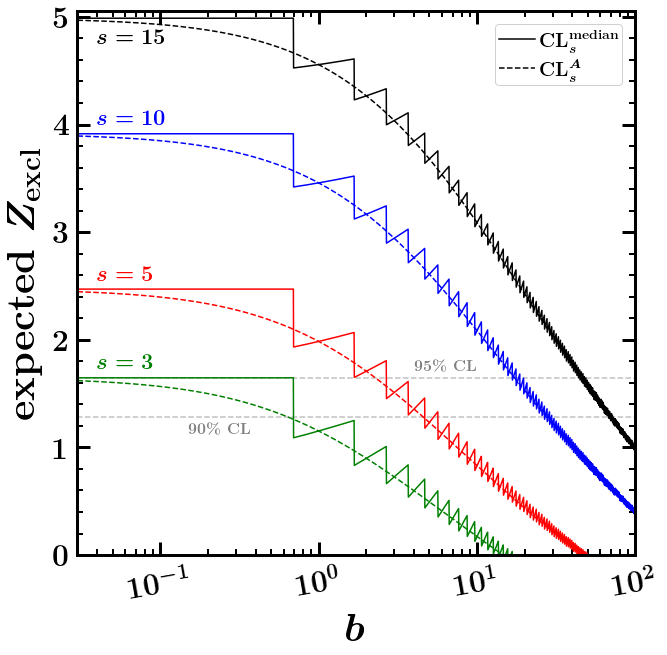

In [12]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, ZExcl_s3[3], color='green', ls='-')
plt.plot(barray, ZExcl_s3[0], color='green', ls='--')

plt.plot(barray, ZExcl_s5[3], color='red', ls='-')
plt.plot(barray, ZExcl_s5[0], color='red', ls='--')

plt.plot(barray, ZExcl_s10[3], color='blue', ls='-')
plt.plot(barray, ZExcl_s10[0], color='blue', ls='--')

plt.plot(barray, ZExcl_s15[3], color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}^{\rm median}_s$}$')
plt.plot(barray, ZExcl_s15[0], color='black', ls='--', label=r'$\textrm{\bf ${\rm CL}^A_s$}$')

RotationAwareAnnotation(r'$\textrm{\bf $s=3$}$', (0.04, ZExcl_s3[3][0]), (100, ZExcl_s3[3][0]), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='green')
RotationAwareAnnotation(r'$\textrm{\bf $s=5$}$', (0.04, ZExcl_s5[3][0]), (100, ZExcl_s5[3][0]), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='red')
RotationAwareAnnotation(r'$\textrm{\bf $s=10$}$', (0.04, ZExcl_s10[3][0]), (100, ZExcl_s10[3][0]), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='blue')
RotationAwareAnnotation(r'$\textrm{\bf $s=15$}$', (0.04, ZExcl_s15[3][0]), (100, ZExcl_s15[3][0]), xytext=(0,-10), va='top', textcoords="offset points", fontsize=22, color='black')

plt.hlines(Zfromp(0.10), 3e-2, 1e2, ls='--', color='gray', alpha=0.5)
RotationAwareAnnotation(r'$\textrm{\bf 90\% CL}$', (0.15, Zfromp(0.10)), (100, Zfromp(0.10)), xytext=(0,-5), va='top', textcoords="offset points", fontsize=16, color='gray')

plt.hlines(Zfromp(0.05), 3e-2, 1e2, ls='--', color='gray', alpha=0.5)
RotationAwareAnnotation(r'$\textrm{\bf 95\% CL}$', (4, Zfromp(0.05)), (100, Zfromp(0.05)), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=16, color='gray')

plot(x_scale='log', x_label=r'$b$', y_label=r'\textrm{\bf expected $Z_{\rm excl}$}', title=None, x_min=3e-2, x_max=1e2, y_min=0, y_max=5.05, major_ytick=1, minor_ytick=0.2, xl_rotate=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper right')

fig.savefig(fname='CLs_expectedZ_vs_b.pdf',bbox_inches='tight')

### Fig 2.6b

In [13]:
#X-axis: background mean
barray = np.geomspace(1e-3, 1e2, 2500)

#Y-axis: expected discovery significances using Bayesian  measure CLdisc for various signal means
ZDisc_s1 = np.transpose([ZDiscExp(s=1, bhat=b, asimov_only=False, CLDiscbool=True) for b in barray])
ZDisc_s2 = np.transpose([ZDiscExp(s=2, bhat=b, asimov_only=False, CLDiscbool=True) for b in barray])
ZDisc_s3 = np.transpose([ZDiscExp(s=3, bhat=b, asimov_only=False, CLDiscbool=True) for b in barray])
ZDisc_s5 = np.transpose([ZDiscExp(s=5, bhat=b, asimov_only=False, CLDiscbool=True) for b in barray])
ZDisc_s10 = np.transpose([ZDiscExp(s=10, bhat=b, asimov_only=False, CLDiscbool=True) for b in barray])
ZDisc_s25 = np.transpose([ZDiscExp(s=25, bhat=b, asimov_only=False, CLDiscbool=True) for b in barray])

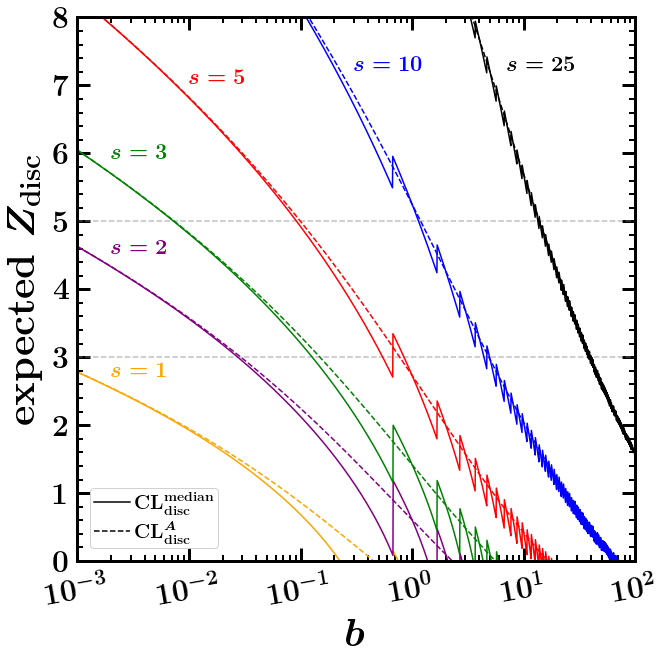

In [14]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, ZDisc_s1[3], color='orange', ls='-')
plt.plot(barray, ZDisc_s1[0], color='orange', ls='--')

plt.plot(barray, ZDisc_s2[3], color='purple', ls='-')
plt.plot(barray, ZDisc_s2[0], color='purple', ls='--')

plt.plot(barray, ZDisc_s3[3], color='green', ls='-')
plt.plot(barray, ZDisc_s3[0], color='green', ls='--')

plt.plot(barray, ZDisc_s5[3], color='red', ls='-')
plt.plot(barray, ZDisc_s5[0], color='red', ls='--')

plt.plot(barray, ZDisc_s10[3], color='blue', ls='-')
plt.plot(barray, ZDisc_s10[0], color='blue', ls='--')

plt.plot(barray, ZDisc_s25[3], color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}^{\rm median}_{\rm disc}$}$')
plt.plot(barray, ZDisc_s25[0], color='black', ls='--', label=r'$\textrm{\bf ${\rm CL}^A_{\rm disc}$}$')

RotationAwareAnnotation(r'$\textrm{\bf $s=1$}$', (2e-3, 2.8), (100, 2.8), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='orange')
RotationAwareAnnotation(r'$\textrm{\bf $s=2$}$', (2e-3, 4.6), (100, 4.6), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='purple')
RotationAwareAnnotation(r'$\textrm{\bf $s=3$}$', (2e-3, 6.0), (100, 6.0), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='green')
RotationAwareAnnotation(r'$\textrm{\bf $s=5$}$', (1e-2, 7.1), (100, 7.1), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='red')
RotationAwareAnnotation(r'$\textrm{\bf $s=10$}$', (3e-1, 7.3), (100, 7.3), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='blue')
RotationAwareAnnotation(r'$\textrm{\bf $s=25$}$', (7, 7.3), (100, 7.3), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.hlines(3, 1e-3, 1e2, ls='--', color='gray', alpha=0.5)
#RotationAwareAnnotation(r'$\textrm{\bf $3\sigma$}$', (2e-3, 3), (100, 3), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=16, color='gray')

plt.hlines(5, 1e-3, 1e2, ls='--', color='gray', alpha=0.5)
#RotationAwareAnnotation(r'$\textrm{\bf $5\sigma$}$', (2e-3, 5), (100, 5), xytext=(0,-5), va='top', textcoords="offset points", fontsize=16, color='gray')

plot(x_scale='log', x_label=r'$b$', y_label=r'\textrm{\bf expected $Z_{\rm disc}$}', title=None, x_min=1e-3, x_max=1e2, y_min=0, y_max=8, major_ytick=1, minor_ytick=0.2, xl_rotate=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower left')

fig.savefig(fname='CLDisc_expectedZ_vs_b.pdf',bbox_inches='tight')

## Fig 2.7: Exact Asimov $p_{\rm excl/disc}$ vs ${\rm CL}_{\rm excl/disc}$

### Fig 2.7a

In [15]:
#X-axis: background mean
barray = np.geomspace(3e-2, 1e2, 2500)

#Y-axis: exact Asimov exclusion significances using frequentist pexcl and modified frequentist CLs for various signal means
ZExcl_s3 = np.transpose([[ZExclExp(s=3, bhat=b, CLExclbool=True), ZExclExp(s=3, bhat=b, CLExclbool=False)] for b in barray])
ZExcl_s5 = np.transpose([[ZExclExp(s=5, bhat=b, CLExclbool=True), ZExclExp(s=5, bhat=b, CLExclbool=False)] for b in barray])
ZExcl_s10 = np.transpose([[ZExclExp(s=10, bhat=b, CLExclbool=True), ZExclExp(s=10, bhat=b, CLExclbool=False)] for b in barray])
ZExcl_s15 = np.transpose([[ZExclExp(s=15, bhat=b, CLExclbool=True), ZExclExp(s=15, bhat=b, CLExclbool=False)] for b in barray])

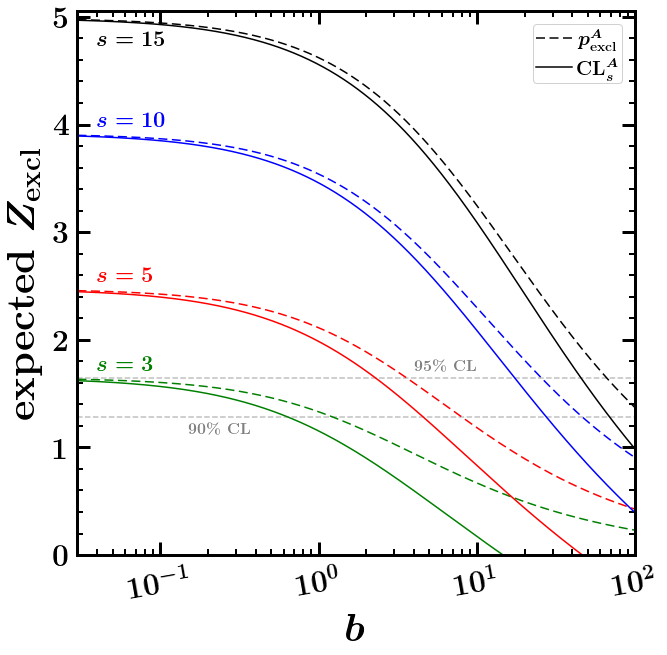

In [16]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, ZExcl_s3[1], color='green', ls=(0, (6, 3)))
plt.plot(barray, ZExcl_s3[0], color='green', ls='-')

plt.plot(barray, ZExcl_s5[1], color='red', ls=(0, (6, 3)))
plt.plot(barray, ZExcl_s5[0], color='red', ls='-')

plt.plot(barray, ZExcl_s10[1], color='blue', ls=(0, (6, 3)))
plt.plot(barray, ZExcl_s10[0], color='blue', ls='-')

plt.plot(barray, ZExcl_s15[1], color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf $p^A_{\rm excl}$}$')
plt.plot(barray, ZExcl_s15[0], color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}^A_s$}$')

RotationAwareAnnotation(r'$\textrm{\bf $s=3$}$', (0.04, ZExcl_s3[1][0]), (100, ZExcl_s3[1][0]), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='green')
RotationAwareAnnotation(r'$\textrm{\bf $s=5$}$', (0.04, ZExcl_s5[1][0]), (100, ZExcl_s5[1][0]), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='red')
RotationAwareAnnotation(r'$\textrm{\bf $s=10$}$', (0.04, ZExcl_s10[1][0]), (100, ZExcl_s10[1][0]), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='blue')
RotationAwareAnnotation(r'$\textrm{\bf $s=15$}$', (0.04, ZExcl_s15[1][0]), (100, ZExcl_s15[1][0]), xytext=(0,-10), va='top', textcoords="offset points", fontsize=22, color='black')

plt.hlines(Zfromp(0.10), 3e-2, 1e2, ls='--', color='gray', alpha=0.5)
RotationAwareAnnotation(r'$\textrm{\bf 90\% CL}$', (0.15, Zfromp(0.10)), (100, Zfromp(0.10)), xytext=(0,-5), va='top', textcoords="offset points", fontsize=16, color='gray')

plt.hlines(Zfromp(0.05), 3e-2, 1e2, ls='--', color='gray', alpha=0.5)
RotationAwareAnnotation(r'$\textrm{\bf 95\% CL}$', (4, Zfromp(0.05)), (100, Zfromp(0.05)), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=16, color='gray')

plot(x_scale='log', x_label=r'$b$', y_label=r'\textrm{\bf expected $Z_{\rm excl}$}', title=None, x_min=3e-2, x_max=1e2, y_min=0, y_max=5.05, major_ytick=1, minor_ytick=0.2, xl_rotate=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper right')

fig.savefig(fname='ZExclAsimovNEW.pdf',bbox_inches='tight')

### Fig 2.7b

In [17]:
#X-axis: background mean
barray = np.geomspace(1e-3, 1e2, 3000)

#Y-axis: exact Asimov discovery significances using frequentist pdisc and Bayesian CLdisc for various signal means
ZDisc_s1 = np.transpose([[ZDiscExp(s=1, bhat=b, CLDiscbool=True), ZDiscExp(s=1, bhat=b, CLDiscbool=False)] for b in barray])
ZDisc_s2 = np.transpose([[ZDiscExp(s=2, bhat=b, CLDiscbool=True), ZDiscExp(s=2, bhat=b, CLDiscbool=False)] for b in barray])
ZDisc_s3 = np.transpose([[ZDiscExp(s=3, bhat=b, CLDiscbool=True), ZDiscExp(s=3, bhat=b, CLDiscbool=False)] for b in barray])
ZDisc_s5 = np.transpose([[ZDiscExp(s=5, bhat=b, CLDiscbool=True), ZDiscExp(s=5, bhat=b, CLDiscbool=False)] for b in barray])
ZDisc_s10 = np.transpose([[ZDiscExp(s=10, bhat=b, CLDiscbool=True), ZDiscExp(s=10, bhat=b, CLDiscbool=False)] for b in barray])
ZDisc_s25 = np.transpose([[ZDiscExp(s=25, bhat=b, CLDiscbool=True), ZDiscExp(s=25, bhat=b, CLDiscbool=False)] for b in barray])

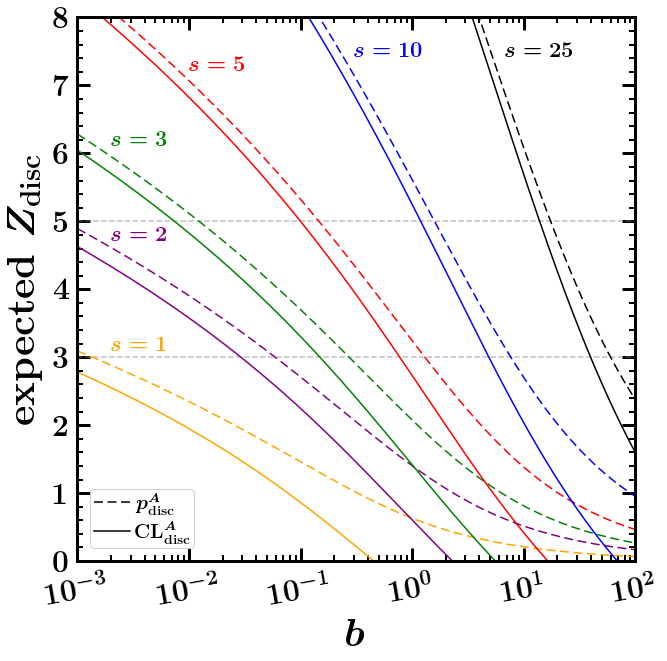

In [18]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, ZDisc_s1[1], color='orange', ls=(0, (6, 3)))
plt.plot(barray, ZDisc_s1[0], color='orange', ls='-')

plt.plot(barray, ZDisc_s2[1], color='purple', ls=(0, (6, 3)))
plt.plot(barray, ZDisc_s2[0], color='purple', ls='-')

plt.plot(barray, ZDisc_s3[1], color='green', ls=(0, (6, 3)))
plt.plot(barray, ZDisc_s3[0], color='green', ls='-')

plt.plot(barray, ZDisc_s5[1], color='red', ls=(0, (6, 3)))
plt.plot(barray, ZDisc_s5[0], color='red', ls='-')

plt.plot(barray, ZDisc_s10[1], color='blue', ls=(0, (6, 3)))
plt.plot(barray, ZDisc_s10[0], color='blue', ls='-')

plt.plot(barray, ZDisc_s25[1], color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf $p^A_{\rm disc}$}$')
plt.plot(barray, ZDisc_s25[0], color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}^A_{\rm disc}$}$')

RotationAwareAnnotation(r'$\textrm{\bf $s=1$}$', (2e-3, 3.1), (100, 3.1), xytext=(0, -5), va='bottom', textcoords="offset points", fontsize=22, color='orange')
RotationAwareAnnotation(r'$\textrm{\bf $s=2$}$', (2e-3, 4.8), (100, 4.8), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='purple')
RotationAwareAnnotation(r'$\textrm{\bf $s=3$}$', (2e-3, 6.2), (100, 6.2), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='green')
RotationAwareAnnotation(r'$\textrm{\bf $s=5$}$', (1e-2, 7.3), (100, 7.3), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='red')
RotationAwareAnnotation(r'$\textrm{\bf $s=10$}$', (3e-1, 7.5), (100, 7.5), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='blue')
RotationAwareAnnotation(r'$\textrm{\bf $s=25$}$', (6.8, 7.5), (100, 7.5), xytext=(0, -10), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.hlines(3, 1e-3, 1e2, ls='--', color='gray', alpha=0.5)
#RotationAwareAnnotation(r'$\textrm{\bf $3\sigma$}$', (2e-3, 3), (100, 3), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=16, color='gray')

plt.hlines(5, 1e-3, 1e2, ls='--', color='gray', alpha=0.5)
#RotationAwareAnnotation(r'$\textrm{\bf $5\sigma$}$', (2e-3, 5), (100, 5), xytext=(0,-5), va='top', textcoords="offset points", fontsize=16, color='gray')

plot(x_scale='log', x_label=r'$b$', y_label=r'\textrm{\bf expected $Z_{\rm disc}$}', title=None, x_min=1e-3, x_max=1e2, y_min=0, y_max=8, major_ytick=1, minor_ytick=0.2, xl_rotate=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower left')

fig.savefig(fname='ZDiscAsimovNEW.pdf',bbox_inches='tight')

## Fig 2.8: Expected 90%CL and 95%CL upper limits on signal

### Fig 2.8a (top-left)

In [25]:
#X-axis: background mean
barray = np.geomspace(10**-4, 2, 1500)

#Y-axis:

#Expected 90% CL upper limit using the standard frequentist approach (pExcl)
sULarray_pExcl = [sExclExp(bhat=b, CL=0.9, CLExclbool=False) for b in barray]

#Expected 90% CL upper limit using the modified frequentist approach (CLs)
sULarray_CLs = [sExclExp(bhat=b, CL=0.9, CLExclbool=True) for b in barray]

In [31]:
#X-axis: background mean
barray_FC = np.geomspace(10**-4, 2, 1000)

#Y-axis:

#Expected 90% CL upper limit using the Feldman-Cousins method with observed events n = round(b)
sULarray_FC = [FC.UpperLimit(round(b), b, CL=0.9) for b in barray_FC]#This might a while

#Expected 90% CL upper limit using the Feldman-Cousins experimental senstivity
sULarray_FC_avg = [FC.Sensitivity(b, CL=0.9) for b in barray_FC]#This might a while

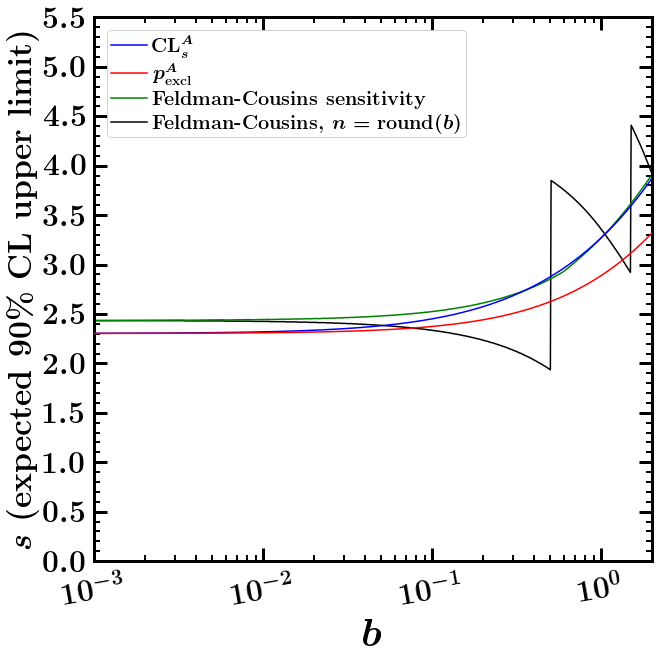

In [32]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, sULarray_CLs, color='blue', zorder=5, label=r'\textrm{\bf ${\rm CL}^A_s$}')

plt.plot(barray, sULarray_pExcl, color='red', zorder=5, label=r'\textrm{\bf $p^A_{\rm excl}$}')

plt.plot(barray_FC, sULarray_FC_avg, color='green', label=r'\textrm{\bf Feldman-Cousins sensitivity}')

plt.plot(barray_FC, sULarray_FC, color='black', zorder=-5, label=r'\textrm{\bf Feldman-Cousins, $n = \textrm{\bf round($b$)}$}')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=2)

plot(x_scale='log', x_min=1e-3, y_min=0, x_max=2, y_max=5.5, x_label=r'$b$', y_label=None, major_xtick=10, minor_xtick=2, major_ytick=0.5, minor_ytick=0.1, xl_rotate=10)

plt.ylabel(r'\textrm{\bf $s$ (expected 90\% CL upper limit)}', fontsize=32)

fig.savefig(fname='ExpectedsUL_smallb_90CL.pdf',bbox_inches='tight')

### Fig 2.8b (top-right)

In [28]:
#X-axis: background mean
barray = np.geomspace(10**-4, 2, 1500)

#Y-axis:

#Expected 95% CL upper limit using the standard frequentist approach (pExcl)
sULarray_pExcl_95 = [sExclExp(bhat=b, CL=0.95, CLExclbool=False) for b in barray]

#Expected 95% CL upper limit using the modified frequentist approach (CLs)
sULarray_CLs_95 = [sExclExp(bhat=b, CL=0.95, CLExclbool=True) for b in barray]

In [33]:
#X-axis: background mean
barray_FC = np.geomspace(10**-4, 2, 1000)

#Y-axis:

#Expected 95% CL upper limit using the Feldman-Cousins method with observed events n = round(b)
sULarray_FC_95 = [FC.UpperLimit(round(b), b, CL=0.95) for b in barray_FC]#This might a while

#Expected 95% CL upper limit using the Feldman-Cousins experimental senstivity
sULarray_FC_avg_95 = [FC.Sensitivity(b, CL=0.95) for b in barray_FC]#This might a while

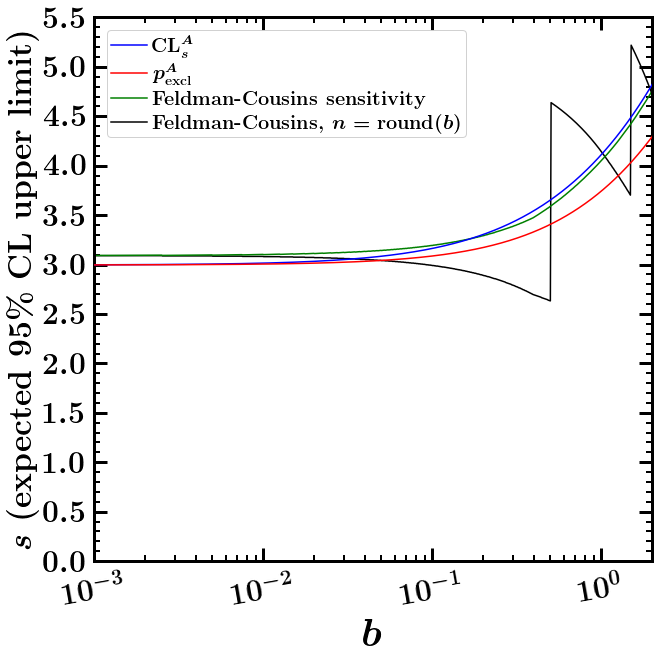

In [34]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, sULarray_CLs_95, color='blue', zorder=5, label=r'\textrm{\bf ${\rm CL}^A_s$}')

plt.plot(barray, sULarray_pExcl_95, color='red', zorder=5, label=r'\textrm{\bf $p^A_{\rm excl}$}')

plt.plot(barray_FC, sULarray_FC_avg_95, color='green', label=r'\textrm{\bf Feldman-Cousins sensitivity}')

plt.plot(barray_FC, sULarray_FC_95, color='black', zorder=-5, label=r'\textrm{\bf Feldman-Cousins, $n = \textrm{\bf round($b$)}$}')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=2)

plot(x_scale='log', x_min=1e-3, y_min=0, x_max=2, y_max=5.5, x_label=r'$b$', y_label=None, major_xtick=10, minor_xtick=2, major_ytick=0.5, minor_ytick=0.1, xl_rotate=10)

plt.ylabel(r'\textrm{\bf $s$ (expected 95\% CL upper limit)}', fontsize=32)

fig.savefig(fname='ExpectedsUL_smallb_95CL.pdf',bbox_inches='tight')

### Fig 2.8c (bottom-left)

In [35]:
#X-axis: background mean
barray = np.arange(0, 50+0.01, 0.01)

#Y-axis:

#Expected 90% CL upper limit using the standard frequentist approach (pExcl)
sULarray_pExcl = [sExclExp(bhat=b, CL=0.9, CLExclbool=False) for b in barray]

#Expected 90% CL upper limit using the modified frequentist approach (CLs)
sULarray_CLs = [sExclExp(bhat=b, CL=0.9, CLExclbool=True) for b in barray]

#Expected 90% CL upper limit using the Feldman-Cousins method with observed events n = round(b)
sULarray_FC = [FC.UpperLimit(round(b), b, CL=0.9) for b in barray]

In [38]:
#X-axis: background mean
barray_FC_avg = np.append(np.append(np.array([0.0]), np.geomspace(1e-2, 1, 100)), np.arange(1.5, 50+0.5, 0.5))

#Y-axis: Expected 90% CL upper limit using the Feldman-Cousins experimental sensitivity
sULarray_FC_avg = [FC.Sensitivity(b, CL=0.9) for b in barray_FC_avg]

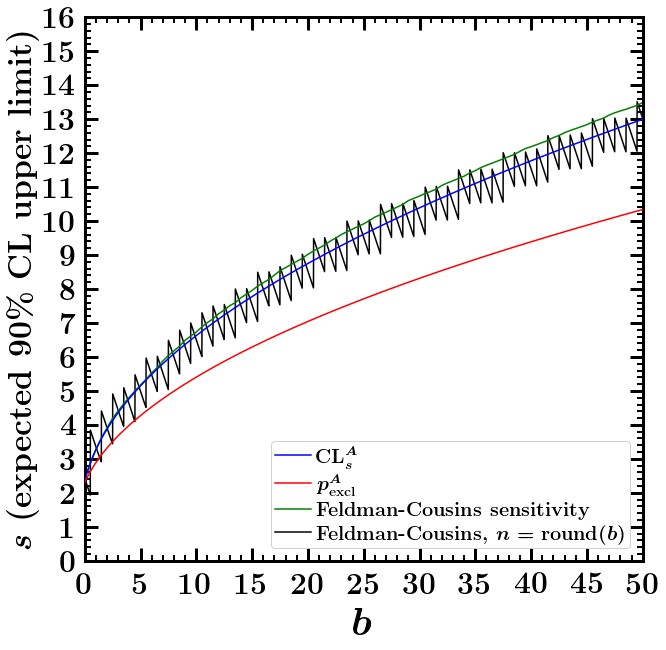

In [39]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, sULarray_CLs, color='blue', zorder=5, label=r'\textrm{\bf ${\rm CL}^A_s$}')

plt.plot(barray, sULarray_pExcl, color='red', zorder=5, label=r'\textrm{\bf $p^A_{\rm excl}$}')

plt.plot(barray_FC_avg, sULarray_FC_avg, color='green', label=r'\textrm{\bf Feldman-Cousins sensitivity}')

plt.plot(barray, sULarray_FC, color='black', zorder=-5, label=r'\textrm{\bf Feldman-Cousins, $n = \textrm{\bf round($b$)}$}')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

plot(x_scale='linear', x_min=0, y_min=0, x_max=50, y_max=16, x_label=r'$b$', y_label=None, major_xtick=5, minor_xtick=1, major_ytick=1, minor_ytick=0.2)

plt.ylabel(r'\textrm{\bf $s$ (expected 90\% CL upper limit)}', fontsize=32)

fig.savefig(fname='ExpectedsUL_largeb_90CL.pdf',bbox_inches='tight')

### Fig 2.8d (bottom-right)

In [40]:
#X-axis: background mean
barray = np.arange(0, 50+0.01, 0.01)

#Y-axis:

#Expected 95% CL upper limit using the standard frequentist approach (pExcl)
sULarray_pExcl_95 = [sExclExp(bhat=b, CL=0.95, CLExclbool=False) for b in barray]

#Expected 95% CL upper limit using the modified frequentist approach (CLs)
sULarray_CLs_95 = [sExclExp(bhat=b, CL=0.95, CLExclbool=True) for b in barray]

#Expected 95% CL upper limit using the Feldman-Cousins method with observed events n = round(b)
sULarray_FC_95 = [FC.UpperLimit(round(b), b, CL=0.95) for b in barray]

In [41]:
#X-axis: background mean
barray_FC_avg = np.append(np.append(np.array([0.0]), np.geomspace(1e-2, 1, 100)), np.arange(1.5, 50+0.5, 0.5))

#Y-axis: Expected 90% CL upper limit using the Feldman-Cousins experimental sensitivity
sULarray_FC_avg_95 = [FC.Sensitivity(b, CL=0.95) for b in barray_FC_avg]

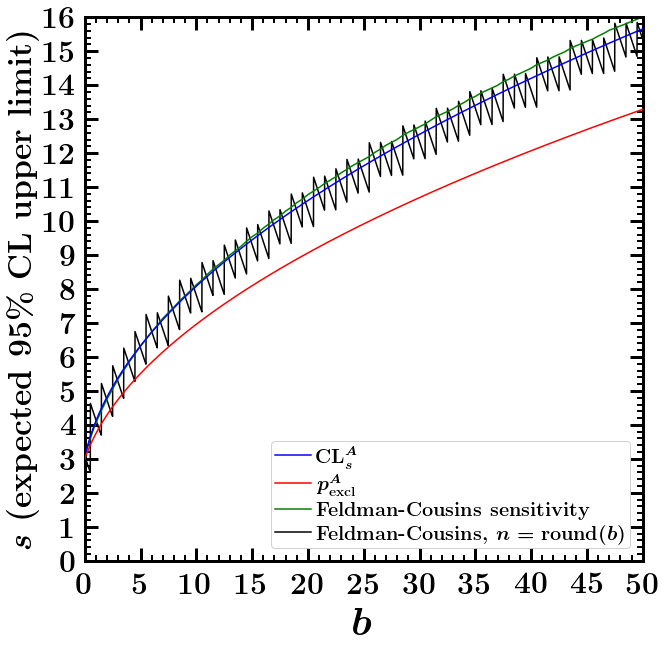

In [42]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, sULarray_CLs_95, color='blue', zorder=5, label=r'\textrm{\bf ${\rm CL}^A_s$}')

plt.plot(barray, sULarray_pExcl_95, color='red', zorder=5, label=r'\textrm{\bf $p^A_{\rm excl}$}')

plt.plot(barray_FC_avg, sULarray_FC_avg_95, color='green', label=r'\textrm{\bf Feldman-Cousins sensitivity}')

plt.plot(barray, sULarray_FC_95, color='black', zorder=-5, label=r'\textrm{\bf Feldman-Cousins, $n = \textrm{\bf round($b$)}$}')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

plot(x_scale='linear', x_min=0, y_min=0, x_max=50, y_max=16, x_label=r'$b$', y_label=None, major_xtick=5, minor_xtick=1, major_ytick=1, minor_ytick=0.2)

plt.ylabel(r'\textrm{\bf $s$ (expected 95\% CL upper limit)}', fontsize=32)

fig.savefig(fname='ExpectedsUL_largeb_95CL.pdf',bbox_inches='tight')

## Fig 2.9: Signal needed for expected $Z\sigma$ discovery

### Fig 2.9a

In [43]:
#X-axis: background mean
barray = np.geomspace(1e-4, 1, 1000)

#Y-axis: signal needed for expected discovery for Z=3 evidence and Z=5 discovery

#Standard frequentist - pdisc
s_pDisc_Z3 = [sDiscExp(bhat=b, CLDiscbool=False, Z=3) for b in barray]
s_pDisc_Z5 = [sDiscExp(bhat=b, CLDiscbool=False, Z=5) for b in barray]

#Bayes factor - CLdisc
s_CLDisc_Z3 = [sDiscExp(bhat=b, CLDiscbool=True, Z=3) for b in barray]
s_CLDisc_Z5 = [sDiscExp(bhat=b, CLDiscbool=True, Z=5) for b in barray]

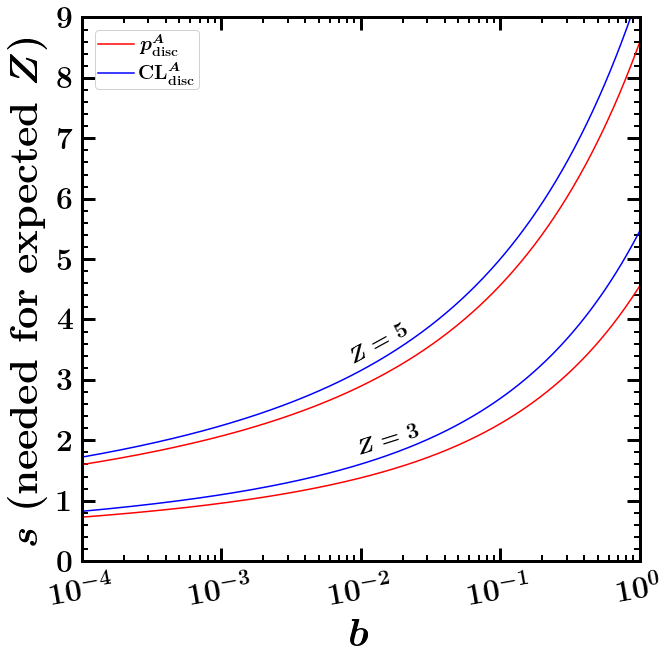

In [44]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, s_pDisc_Z3, color='red', label=r'$\textrm{\bf $p^A_{\rm disc}$}$')
plt.plot(barray, s_CLDisc_Z3, color='blue', label=r'$\textrm{\bf ${\rm CL}^A_{\rm disc}$}$')
RotationAwareAnnotation(r'$\textrm{\bf $Z=3$}$', (0.01, sDiscExp(0.01, CLDiscbool=True, Z=3)), (0.012, sDiscExp(0.012, CLDiscbool=True, Z=3)), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.plot(barray, s_pDisc_Z5, color='red')
plt.plot(barray, s_CLDisc_Z5, color='blue')
RotationAwareAnnotation(r'$\textrm{\bf $Z=5$}$', (0.01, sDiscExp(0.01, CLDiscbool=True, Z=5)), (0.012, sDiscExp(0.012, CLDiscbool=True, Z=5)), xytext=(-5,3), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

plot(x_scale='log', y_scale='linear', x_min=1e-4, y_min=0, x_max=1, y_max=9, x_label=r'$b$', y_label=r'\textrm{\bf $s$ (needed for expected $Z$)}', major_xtick=5, minor_xtick=1, major_ytick=1, minor_ytick=0.2, xl_rotate=10)

fig.savefig(fname='sneededforZ35_lo.pdf',bbox_inches='tight')

### Fig 2.9b

In [45]:
#X-axis: background mean
barray = np.arange(0, 50+0.01, 0.01)

#Y-axis: signal needed for expected discovery for Z=3 evidence and Z=5 discovery

#Standard frequentist - pdisc
s_pDisc_Z3 = [sDiscExp(bhat=b, CLDiscbool=False, Z=3) for b in barray]
s_pDisc_Z5 = [sDiscExp(bhat=b, CLDiscbool=False, Z=5) for b in barray]

#Bayes factor - CLdisc
s_CLDisc_Z3 = [sDiscExp(bhat=b, CLDiscbool=True, Z=3) for b in barray]
s_CLDisc_Z5 = [sDiscExp(bhat=b, CLDiscbool=True, Z=5) for b in barray]

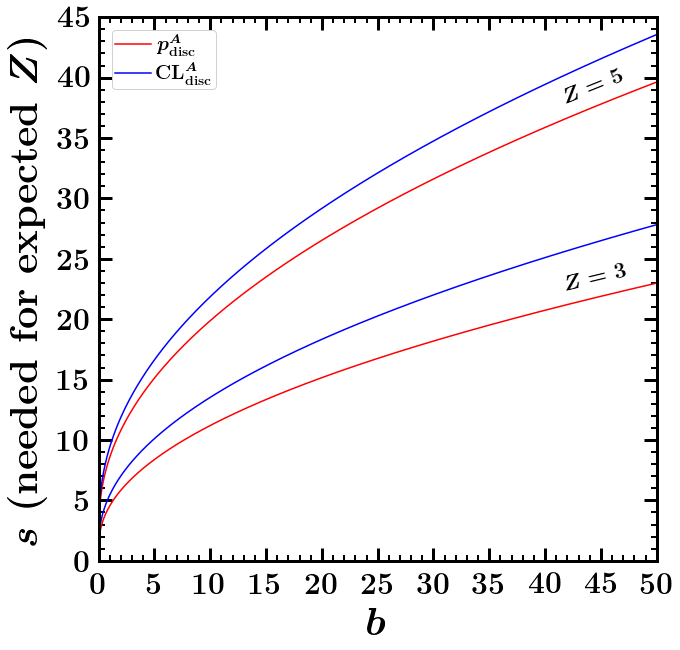

In [46]:
fig = plt.figure(figsize=(10,10))

plt.plot(barray, s_pDisc_Z3, color='red', label=r'$\textrm{\bf $p^A_{\rm disc}$}$')
plt.plot(barray, s_CLDisc_Z3, color='blue', label=r'$\textrm{\bf ${\rm CL}^A_{\rm disc}$}$')
RotationAwareAnnotation(r'$\textrm{\bf $Z=3$}$', (42, sDiscExp(42, CLDiscbool=False, Z=3)), (50, sDiscExp(50, CLDiscbool=False, Z=3)), xytext=(0,10), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.plot(barray, s_pDisc_Z5, color='red')
plt.plot(barray, s_CLDisc_Z5, color='blue')
RotationAwareAnnotation(r'$\textrm{\bf $Z=5$}$', (42, sDiscExp(42, CLDiscbool=False, Z=5)), (50, sDiscExp(50, CLDiscbool=False, Z=5)), xytext=(0,10), va='bottom', textcoords="offset points", fontsize=22, color='black')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

plot(x_scale='linear', y_scale='linear', x_min=0, y_min=0, x_max=50, y_max=45, x_label=r'$b$', y_label=r'\textrm{\bf $s$ (needed for expected $Z$)}', major_xtick=5, minor_xtick=1, major_ytick=5, minor_ytick=1, xl_rotate=0)

fig.savefig(fname='sneededforZ35_hi.pdf',bbox_inches='tight')

## Fig 2.10: Probability of observing at least one event in the zero background limit

In [47]:
#Inputs
b_temp=0 #background mean

#X-axis: signal mean
sarray=np.arange(0, 5+0.0005, 0.0005)

#Y-axis: probability of observing at least one event
pZarray=[1-np.exp(-s-b_temp) for s in sarray]

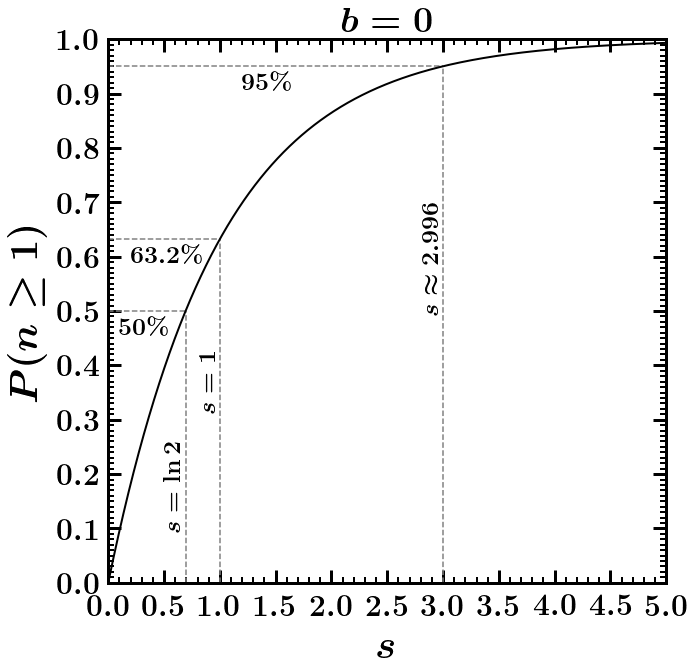

In [49]:
fig = plt.figure(figsize=(10,10))

plt.plot(sarray, pZarray, color='black', lw=2)

plt.hlines(0.5, xmin=0, xmax=np.log(2), color='grey', ls='--')
plt.vlines(np.log(2), ymin=0, ymax=0.5, color='grey', ls='--')

plt.hlines(0.6321205579969469, xmin=0, xmax=1, color='grey', ls='--')
plt.vlines(1, ymin=0, ymax=0.6321205579969469, color='grey', ls='--')

plt.hlines(0.95, xmin=0, xmax=2.996, color='grey', ls='--')
plt.vlines(2.996, ymin=0, ymax=0.95, color='grey', ls='--')

RotationAwareAnnotation(r'$s = \ln 2$', (np.log(2), 0.1), (np.log(2), 1), xytext=(0,-4), va='bottom', textcoords="offset points", fontsize=25, color='black')

RotationAwareAnnotation(r'$s = 1$', (1, 0.32), (1, 1), xytext=(0,-4), va='bottom', textcoords="offset points", fontsize=25, color='black')

RotationAwareAnnotation(r'$s \approx 2.996$', (2.996, 0.5), (2.996, 1), xytext=(0,-4), va='bottom', textcoords="offset points", fontsize=25)

RotationAwareAnnotation(r'$50 \%$', (0.1, 0.5), (5, 0.5), xytext=(0,-5), va='top', textcoords="offset points", fontsize=25, color='black')

RotationAwareAnnotation(r'$63.2 \%$', (0.2, 0.6321205579969469), (5, 0.6321205579969469), xytext=(0,-5), va='top', textcoords="offset points", fontsize=25, color='black')

RotationAwareAnnotation(r'$95 \%$', (1.2, 0.95), (5, 0.95), xytext=(0,-5), va='top', textcoords="offset points", fontsize=25, color='black')

plot(x_scale='linear', y_scale='linear', x_min=0, y_min=0, x_max=5, y_max=1, x_label=r'$s$', y_label=r'\textrm{\bf $P(n \ge 1)$}', title=r'$\textrm{\bf $b=0$}$', major_xtick=0.5, minor_xtick=0.1, major_ytick=0.1, minor_ytick=0.01)

fig.savefig(fname='P_n_ge_1_b0.pdf',bbox_inches='tight')

# Section II-B: Exclusion for multi-channel counting experiments 

## Fig 2.11: Exclusion significances for counting experiment with a good and a bad channel

In [58]:
#Inputs

#Good channel
n1 = 2 #observed number of events
b1 = 2 #background
s1 = 7 #signal

#Bad channel
n2 = 0 #observed number of events
b2 = 10 #background
s2 = 0.01 #signal

#Combined
narray_varyn2 = lambda n2: [n1, n2]
narray = narray_varyn2(n2)

barray_varyb2 = lambda b2: [b1, b2]
barray = barray_varyb2(b2)

sarray = [s1, s2]

### Fig 2.11a

In [59]:
#X-axis: observed number of events in channel 2
n2min = 0
n2max = 20
n2array = list(range(n2max+1))

#Y-axis: observed exclusion significance obtained by varying n2

#CLexcl for both channels (indistinguishable from CLexcl for channel 1 only)
Z_CLExcl_bothchannels = [ZExclObsN_Unc0(narray_varyn2(n), barray, sarray, CLExclbool=True) for n in n2array] 

#CLs for both channels
Z_CLs_bothchannels = [ZExclObsN_Unc0(narray_varyn2(n), barray, sarray, CLExclbool=False, CLsbool=True) for n in n2array] 

#pexcl for both channels
Z_pExcl_bothchannels = [ZExclObsN_Unc0(narray_varyn2(n), barray, sarray, CLExclbool=False, CLsbool=False) for n in n2array] 

#pexcl for channel 1 only
Z_pExcl_channel1 = [ZExclObs(n=n1, bhat=b1, dbhat=0, s=s1, CLExclbool=False)]*len(n2array)

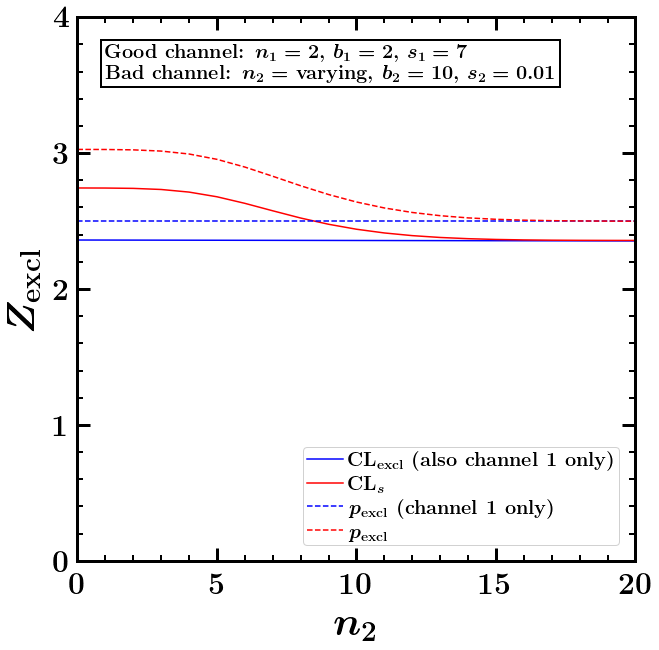

In [60]:
fig = plt.figure(figsize=(10,10))

plt.plot(n2array, Z_CLExcl_bothchannels, color='blue', label=r'$\textrm{\bf ${\rm CL}_{\rm excl}$ (also channel 1 only)}$')

plt.plot(n2array, Z_CLs_bothchannels, color='red', ls='-', label=r'$\textrm{\bf ${\rm CL}_s$}$')

plt.plot(n2array, Z_pExcl_channel1, color='blue', ls='--', label=r'$\textrm{\bf $p_{\rm excl}$ (channel 1 only)}$')

plt.plot(n2array, Z_pExcl_bothchannels, color='red', ls='--', label=r'$\textrm{\bf $p_{\rm excl}$}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower right')

plot(x_scale='linear', y_scale='linear', x_min=n2min, x_max=n2max, y_min=0, y_max=4, y_label=r'$\textrm{\bf $Z_{\rm excl}$}$', x_label=r'$n_2$', major_xtick=5, minor_xtick=1, major_ytick=1, minor_ytick=0.2)

RotationAwareAnnotation("$\\textrm{\\bf Good channel: $n_1 = 2$, $b_1 = 2$, $s_1 = 7$}$\n$\\textrm{\\bf Bad channel: $n_2 = $ varying, $b_2 = 10$, $s_2 = 0.01$}$", xy=(1, 3.8), p=(20, 3.8), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZExcl_2_2_7_var_10_0p01.pdf',bbox_inches='tight')

### Fig 2.11b

In [63]:
#X-axis: background mean in channel 2
b2min = 1e-2
b2max = 1e1
b2array = np.geomspace(b2min, b2max, 750)

#Y-axis: observed exclusion significance obtained by varying b2

#CLexcl for both channels (indistinguishable from CLexcl for channel 1 only)
Z_CLExcl_bothchannels = [ZExclObsN_Unc0(narray, barray_varyb2(b), sarray, CLExclbool=True) for b in b2array]

#CLs for both channels
Z_CLs_bothchannels = [ZExclObsN_Unc0(narray, barray_varyb2(b), sarray, CLExclbool=False, CLsbool=True) for b in b2array]

#pexcl for both channels
Z_pExcl_bothchannels = [ZExclObsN_Unc0(narray, barray_varyb2(b), sarray, CLExclbool=False, CLsbool=False) for b in b2array]

#pexcl for channel 1 only
Z_pExcl_channel1 = [ZExclObs(n=n1, bhat=b1, dbhat=0, s=s1, CLExclbool=False)]*len(b2array)

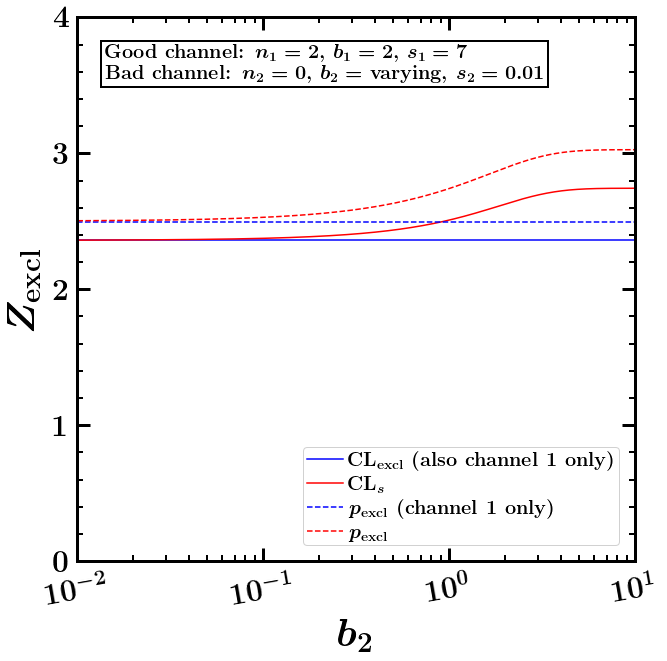

In [64]:
fig = plt.figure(figsize=(10,10))

plt.plot(b2array, Z_CLExcl_bothchannels, color='blue', label=r'$\textrm{\bf ${\rm CL}_{\rm excl}$ (also channel 1 only)}$')

plt.plot(b2array, Z_CLs_bothchannels, color='red', ls='-', label=r'$\textrm{\bf ${\rm CL}_s$}$')

plt.plot(b2array, Z_pExcl_channel1, color='blue', ls='--', label=r'$\textrm{\bf $p_{\rm excl}$ (channel 1 only)}$')

plt.plot(b2array, Z_pExcl_bothchannels, color='red', ls='--', label=r'$\textrm{\bf $p_{\rm excl}$}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower right')

plot(x_scale='log', y_scale='linear', x_min=b2min, x_max=b2max, y_min=0, y_max=4, y_label=r'$\textrm{\bf $Z_{\rm excl}$}$', x_label=r'$b_2$', major_ytick=1, minor_ytick=0.2, xl_rotate=10)

RotationAwareAnnotation("$\\textrm{\\bf Good channel: $n_1 = 2$, $b_1 = 2$, $s_1 = 7$}$\n$\\textrm{\\bf Bad channel: $n_2 = 0$, $b_2 = $ varying, $s_2 = 0.01$}$", xy=(0.014, 3.8), p=(20, 3.8), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZExcl_2_2_7_0_var_0p01.pdf',bbox_inches='tight')

## Fig 2.12: Discontinuities in frequentist exclusion significances as a function of $s$

### Fig 2.12a

In [70]:
#Inputs

#channel 1
n1 = 1 #observed number of events
b1 = 1 #background
s1 = 4 #signal

#channel 2
n2 = 1 #observed number of events
b2 = 1 #background

#Combined
narray = [n1, n2]
barray = [b1, b2]
sarray_varys2 = lambda s2: [s1, s2]

#X-axis: signal mean in channel 2
s2min = 0
s2max = 10
s2array = np.arange(s2min, s2max+0.005, 0.005)

#Y-axis: observed exclusion significances

#CLexcl for both channels (indistinguishable from CLexcl for channel 1 only)
Z_CLExcl_bothchannels = [ZExclObsN_Unc0(narray, barray, sarray_varys2(s), CLExclbool=True) for s in s2array]

#CLs for both channels
Z_CLs_bothchannels = [ZExclObsN_Unc0(narray, barray, sarray_varys2(s), CLExclbool=False, CLsbool=True) for s in s2array]

#pexcl for both channels
Z_pExcl_bothchannels = [ZExclObsN_Unc0(narray, barray, sarray_varys2(s), CLExclbool=False, CLsbool=False) for s in s2array]

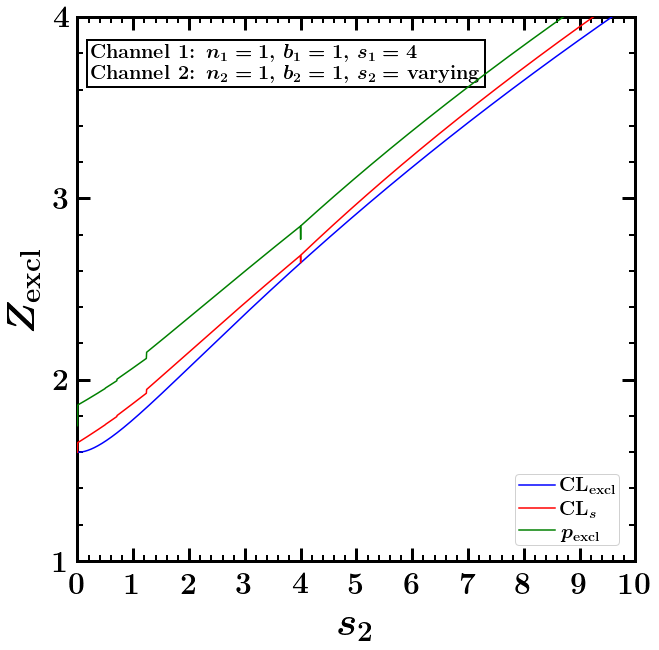

In [73]:
fig = plt.figure(figsize=(10,10))

plt.plot(s2array, Z_CLExcl_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm excl}$}$', zorder=5)

plt.plot(s2array, Z_CLs_bothchannels, color='red', ls='-', label=r'$\textrm{\bf ${\rm CL}_s$}$', zorder=5)

plt.plot(s2array, Z_pExcl_bothchannels, color='green', ls='-', label=r'$\textrm{\bf $p_{\rm excl}$}$', zorder=5)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower right')

plot(x_scale='linear', y_scale='linear', x_min=s2min, x_max=s2max, y_min=1, y_max=4, y_label=r'$\textrm{\bf $Z_{\rm excl}$}$', x_label=r'$s_2$', major_xtick=1, minor_xtick=0.2, major_ytick=1, minor_ytick=0.2)

RotationAwareAnnotation("$\\textrm{\\bf Channel 1: $n_1 = 1$, $b_1 = 1$, $s_1 = 4$}$\n$\\textrm{\\bf Channel 2: $n_2 = 1$, $b_2 = 1$, $s_2 = $ varying}$", xy=(0.25, 3.85), p=(10, 3.85), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZExcl_1_1_1_1_4_var.pdf',bbox_inches='tight')

### Fig 2.12b

In [74]:
#Inputs

#channel 1
n1 = 2 #observed number of events
b1 = 2.4 #background
s1 = 8.5 #signal

#channel 2
n2 = 4 #observed number of events
b2 = 2.3 #background

#Combined
narray = [n1, n2]
barray = [b1, b2]
sarray_varys2 = lambda s2: [s1, s2]

#X-axis: signal mean in channel 2
s2min = 0
s2max = 10
s2array = np.arange(s2min, s2max+0.005, 0.005)

#Y-axis: observed exclusion significances

#CLexcl for both channels (indistinguishable from CLexcl for channel 1 only)
Z_CLExcl_bothchannels = [ZExclObsN_Unc0(narray, barray, sarray_varys2(s), CLExclbool=True) for s in s2array]

#CLs for both channels
Z_CLs_bothchannels = [ZExclObsN_Unc0(narray, barray, sarray_varys2(s), CLExclbool=False, CLsbool=True) for s in s2array]

#pexcl for both channels
Z_pExcl_bothchannels = [ZExclObsN_Unc0(narray, barray, sarray_varys2(s), CLExclbool=False, CLsbool=False) for s in s2array]

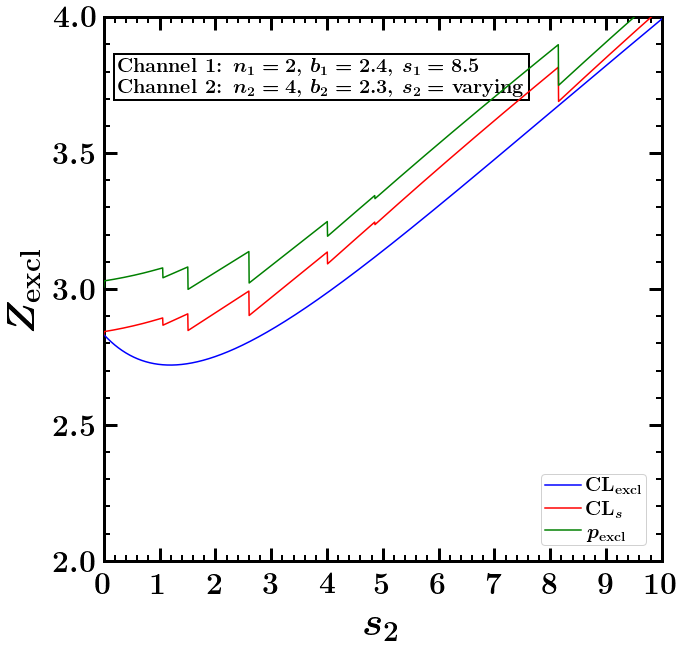

In [75]:
fig = plt.figure(figsize=(10,10))

plt.plot(s2array, Z_CLExcl_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm excl}$}$', zorder=5)

plt.plot(s2array, Z_CLs_bothchannels, color='red', ls='-', label=r'$\textrm{\bf ${\rm CL}_s$}$', zorder=5)

plt.plot(s2array, Z_pExcl_bothchannels, color='green', ls='-', label=r'$\textrm{\bf $p_{\rm excl}$}$', zorder=5)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower right')

plot(x_scale='linear', y_scale='linear', x_min=s2min, x_max=s2max, y_min=2, y_max=4, y_label=r'$\textrm{\bf $Z_{\rm excl}$}$', x_label=r'$s_2$', major_xtick=1, minor_xtick=0.2, major_ytick=0.5, minor_ytick=0.1)

RotationAwareAnnotation("$\\textrm{\\bf Channel 1: $n_1 = 2$, $b_1 = 2.4$, $s_1 = 8.5$}$\n$\\textrm{\\bf Channel 2: $n_2 = 4$, $b_2 = 2.3$, $s_2 = $ varying}$", xy=(0.25, 3.85), p=(10, 3.85), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZExcl_2_2.4_8.5_4_2.3_var.pdf',bbox_inches='tight')

## Fig 2.13: Comparing Asimov significances from $p_{\rm excl}$, ${\rm CL}_s$, and ${\rm CL}_{\rm excl}$ in two-channel counting experiment 

### Fig 2.13a

In [76]:
#Inputs

#channel 1
s1 = 3.4 #signal

#channel 2
s2 = 1.3 #signal
b2 = 0.05 #background

#Combined
sarray = [s1, s2]
barray_varyb1 = lambda b1: [b1, b2]

#X-axis: background mean in channel 1
b1min = 0.04
b1max = 10
b1array = np.geomspace(b1min, b1max, 3000)

#Y-axis: expected exclusion significances

#CLexcl for both channels (indistinguishable from CLexcl for channel 1 only)
Z_CLExcl_bothchannels = [ZExclExpN_Unc0(sarray, barray_varyb1(b), CLExclbool=True) for b in b1array]

#CLs for both channels
Z_CLs_bothchannels = [ZExclExpN_Unc0(sarray, barray_varyb1(b), CLExclbool=False, CLsbool=True) for b in b1array]

#pexcl for both channels
Z_pExcl_bothchannels = [ZExclExpN_Unc0(sarray, barray_varyb1(b), CLExclbool=False, CLsbool=False) for b in b1array]

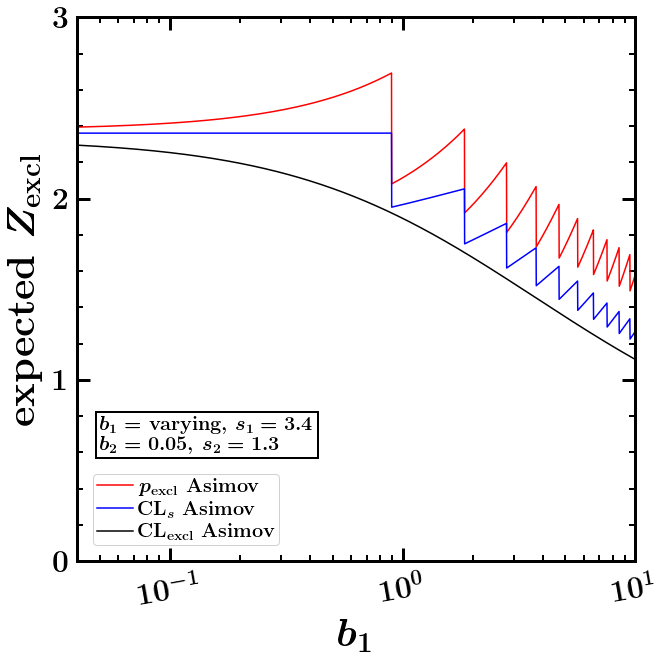

In [77]:
fig = plt.figure(figsize=(10,10))

plt.plot(b1array, Z_pExcl_bothchannels, color='red', ls='-', label=r'$\textrm{\bf $p_{\rm excl}$ Asimov}$')

plt.plot(b1array, Z_CLs_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_s$ Asimov}$')

plt.plot(b1array, Z_CLExcl_bothchannels, color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm excl}$ Asimov}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='log', y_scale='linear', x_min=b1min, x_max=b1max, y_min=0, y_max=3, y_label=r'$\textrm{\bf expected $Z_{\rm excl}$}$', x_label=r'$b_1$', major_ytick=1, minor_ytick=0.2, xl_rotate=10)

RotationAwareAnnotation("$\\textrm{\\bf $b_1 = $ varying, $s_1 = 3.4$}$\n$\\textrm{\\bf $b_2 = 0.05$, $s_2 = 1.3$}$", xy=(0.05, 0.8), p=(10, 0.8), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZAsimov_excl2.pdf',bbox_inches='tight')

### Fig 2.13b

In [78]:
#Inputs

#channel 1
s1 = 3.4 #signal

#channel 2
s2 = 2.6 #signal
b2 = 1.2 #background

#Combined
sarray = [s1, s2]
barray_varyb1 = lambda b1: [b1, b2]

#X-axis: background mean in channel 1
b1min = 0.04
b1max = 10
b1array = np.geomspace(b1min, b1max, 3000)

#Y-axis: expected exclusion significances

#CLexcl for both channels (indistinguishable from CLexcl for channel 1 only)
Z_CLExcl_bothchannels = [ZExclExpN_Unc0(sarray, barray_varyb1(b), CLExclbool=True) for b in b1array]

#CLs for both channels
Z_CLs_bothchannels = [ZExclExpN_Unc0(sarray, barray_varyb1(b), CLExclbool=False, CLsbool=True) for b in b1array]

#pexcl for both channels
Z_pExcl_bothchannels = [ZExclExpN_Unc0(sarray, barray_varyb1(b), CLExclbool=False, CLsbool=False) for b in b1array]

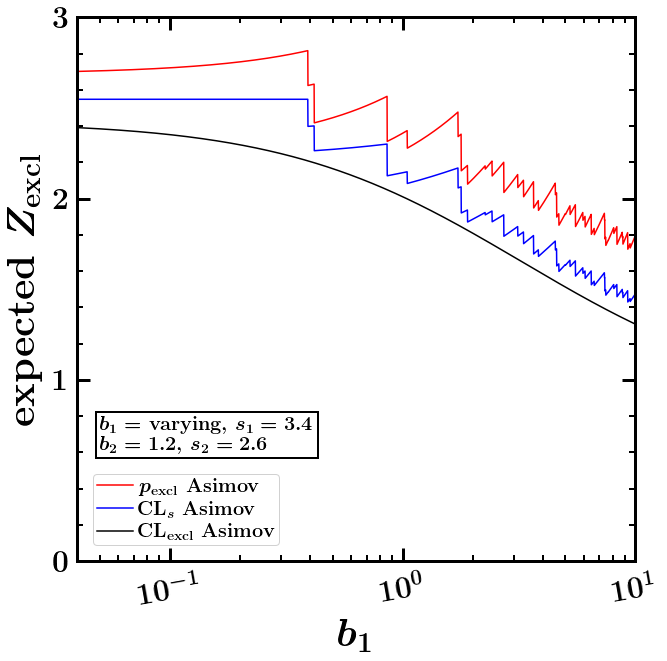

In [79]:
fig = plt.figure(figsize=(10,10))

plt.plot(b1array, Z_pExcl_bothchannels, color='red', ls='-', label=r'$\textrm{\bf $p_{\rm excl}$ Asimov}$')

plt.plot(b1array, Z_CLs_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_s$ Asimov}$')

plt.plot(b1array, Z_CLExcl_bothchannels, color='black', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm excl}$ Asimov}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='log', y_scale='linear', x_min=b1min, x_max=b1max, y_min=0, y_max=3, y_label=r'$\textrm{\bf expected $Z_{\rm excl}$}$', x_label=r'$b_1$', major_ytick=1, minor_ytick=0.2, xl_rotate=10)

RotationAwareAnnotation("$\\textrm{\\bf $b_1 = $ varying, $s_1 = 3.4$}$\n$\\textrm{\\bf $b_2 = 1.2$, $s_2 = 2.6$}$", xy=(0.05, 0.8), p=(10, 0.8), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZAsimov_excl1.pdf',bbox_inches='tight')

# Section II-C: Discovery for multi-channel counting experiments 

## Fig 2.14: Discovery significances for counting experiment with a good and a bad channel

In [80]:
#Inputs

#Good channel
n1 = 10 #observed number of events
b1 = 2 #background
s1 = 9.5 #signal

#Bad channel
n2 = 10 #observed number of events
b2 = 10 #background
s2 = 0.01 #signal

#Combined
narray_varyn2 = lambda n2: [n1, n2]
narray = narray_varyn2(n2)

barray_varyb2 = lambda b2: [b1, b2]
barray = barray_varyb2(b2)

sarray = [s1, s2]

### Fig 2.14a

In [82]:
#X-axis: observed number of events in channel 2
n2min = 0
n2max = 25
n2array = list(range(n2max+1))

#Y-axis: observed discovery significance obtained by varying n2

#CLdisc for both channels
Z_CLDisc_bothchannels = [ZDiscObsN_Unc0(narray_varyn2(n), barray, sarray, CLDiscbool=True) for n in n2array] 

#CLdisc for channel 1 only
Z_CLDisc_channel1 = [ZDiscObs(n=n1, bhat=b1, dbhat=0, s=s1, CLDiscbool=True)]*len(n2array)

#pdisc for both channels
Z_pDisc_bothchannels = [ZDiscObsN_Unc0(narray_varyn2(n), barray, sarray, CLDiscbool=False) for n in n2array] 

#pdisc for channel 1 only
Z_pDisc_channel1 = [ZDiscObs(n=n1, bhat=b1, dbhat=0, s=s1, CLDiscbool=False)]*len(n2array)

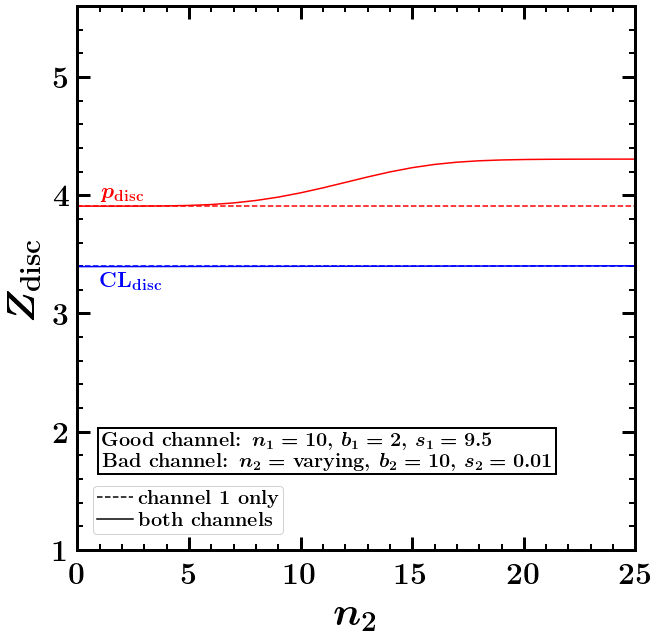

In [83]:
fig = plt.figure(figsize=(10,10))

plt.plot(n2array, [np.nan]*len(n2array), color='black', ls='--', label=r'$\textrm{\bf channel 1 only}$')

plt.plot(n2array, [np.nan]*len(n2array), color='black', ls='-', label=r'$\textrm{\bf both channels}$')

plt.plot(n2array, Z_pDisc_channel1, color='red', ls='--')

plt.plot(n2array, Z_pDisc_bothchannels, color='red', ls='-')

RotationAwareAnnotation(r'$\textrm{\bf $p_{\rm disc}$}$', (1, Zfromp(pDisc(n1, np.inf, np.inf, b1))), (25, Zfromp(pDisc(n1, np.inf, np.inf, b1))), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='red')

plt.plot(n2array, Z_CLDisc_channel1, color='blue', ls='--')

plt.plot(n2array, Z_CLDisc_bothchannels, color='blue', ls='-')

RotationAwareAnnotation(r'$\textrm{\bf ${\rm CL}_{\rm disc}$}$', (1, Zfromp(CLDisc(n1, np.inf, np.inf, b1, s1))), (25, Zfromp(CLDisc(n1, np.inf, np.inf, b1, s1))), xytext=(0,-5), va='top', textcoords="offset points", fontsize=22, color='blue')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='linear', y_scale='linear', x_min=n2min, x_max=n2max, y_min=1, y_max=5.6, y_label=r'$\textrm{\bf $Z_{\rm disc}$}$', x_label=r'$n_2$', major_xtick=5, minor_xtick=1, major_ytick=1, minor_ytick=0.2)

RotationAwareAnnotation("$\\textrm{\\bf Good channel: $n_1 = 10$, $b_1 = 2$, $s_1 = 9.5$}$\n$\\textrm{\\bf Bad channel: $n_2 = $ varying, $b_2 = 10$, $s_2 = 0.01$}$", xy=(1.08, 2.0), p=(20, 2.0), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZDisc_badchannel_n2var.pdf',bbox_inches='tight')

### Fig 2.14b

In [86]:
#X-axis: background mean in channel 2
b2min = 0.01
b2max = 100
b2array = np.geomspace(b2min, b2max, 3000)

#Y-axis: observed discovery significance obtained by varying b2

#CLdisc for both channels
Z_CLDisc_bothchannels = [ZDiscObsN_Unc0(narray, barray_varyb2(b), sarray, CLDiscbool=True) for b in b2array]

#CLdisc for channel 1 only
Z_CLDisc_channel1 = [ZDiscObs(n=n1, bhat=b1, dbhat=0, s=s1, CLDiscbool=True)]*len(b2array)

#pdisc for both channels
Z_pDisc_bothchannels = [ZDiscObsN_Unc0(narray, barray_varyb2(b), sarray, CLDiscbool=False) for b in b2array]

#pdisc for channel 1 only
Z_pDisc_channel1 = [ZDiscObs(n=n1, bhat=b1, dbhat=0, s=s1, CLDiscbool=False)]*len(b2array)

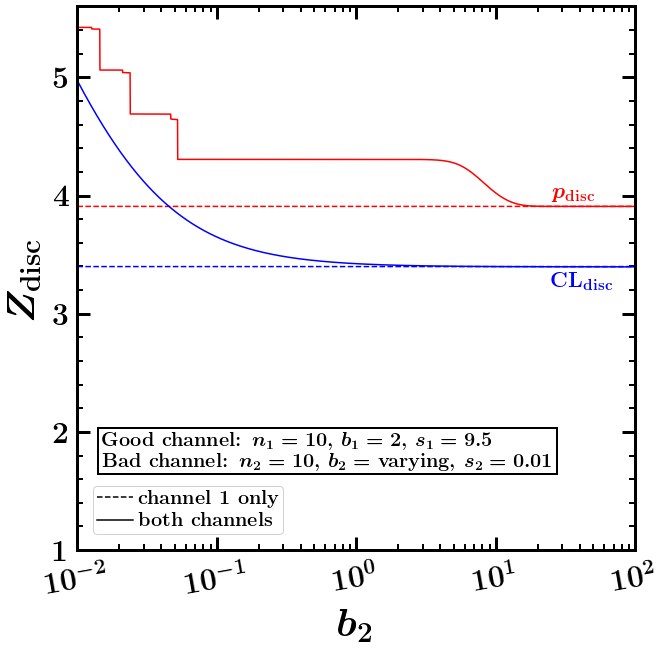

In [87]:
fig = plt.figure(figsize=(10,10))

plt.plot(b2array, [np.nan]*len(b2array), color='black', ls='--', label=r'$\textrm{\bf channel 1 only}$')

plt.plot(b2array, [np.nan]*len(b2array), color='black', ls='-', label=r'$\textrm{\bf both channels}$')

plt.plot(b2array, Z_pDisc_channel1, color='red', ls='--')

plt.plot(b2array, Z_pDisc_bothchannels, color='red', ls='-')

RotationAwareAnnotation(r'$\textrm{\bf $p_{\rm disc}$}$', (25, Zfromp(pDisc(n1, np.inf, np.inf, b1))), (100, Zfromp(pDisc(n1, np.inf, np.inf, b1))), xytext=(0,5), va='bottom', textcoords="offset points", fontsize=22, color='red')

plt.plot(b2array, Z_CLDisc_channel1, color='blue', ls='--')

plt.plot(b2array, Z_CLDisc_bothchannels, color='blue', ls='-')

RotationAwareAnnotation(r'$\textrm{\bf ${\rm CL}_{\rm disc}$}$', (25, Zfromp(CLDisc(n1, np.inf, np.inf, b1, s1))), (100, Zfromp(CLDisc(n1, np.inf, np.inf, b1, s1))), xytext=(0,-5), va='top', textcoords="offset points", fontsize=22, color='blue')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='log', y_scale='linear', x_min=b2min, x_max=b2max, y_min=1, y_max=5.6, y_label=r'$\textrm{\bf $Z_{\rm disc}$}$', x_label=r'$b_2$', major_xtick=5, minor_xtick=1, major_ytick=1, minor_ytick=0.2, xl_rotate=10)

RotationAwareAnnotation("$\\textrm{\\bf Good channel: $n_1 = 10$, $b_1 = 2$, $s_1 = 9.5$}$\n$\\textrm{\\bf Bad channel: $n_2 = 10$, $b_2 = $ varying, $s_2 = 0.01$}$", xy=(0.015, 2.0), p=(20, 2.0), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZDisc_badchannel_b2var.pdf',bbox_inches='tight')

## Fig 2.15: Discontinuities in frequentist discovery significances as a function of $b$

### Fig 2.15a

In [88]:
#Inputs

#channel 1
n1 = 5 #observed number of events
b1 = 1 #background
s1 = 4 #signal

#channel 2
n2 = 5 #observed number of events
s2 = 4 #background

#Combined
narray = [n1, n2]
sarray = [s1, s2]
barray_varyb2 = lambda b2: [b1, b2]

#X-axis: background mean in channel 2
b2min = 0.005
b2max = 5
b2step = 0.005
b2array = np.arange(b2min, b2max + b2step, b2step)

#Y-axis: observed discovery significances

#CLdisc for both channels
Z_CLDisc_bothchannels = [ZDiscObsN_Unc0(narray, barray_varyb2(b), sarray, CLDiscbool=True) for b in b2array]

#pdisc for both channels
Z_pDisc_bothchannels = [ZDiscObsN_Unc0(narray, barray_varyb2(b), sarray, CLDiscbool=False) for b in b2array]

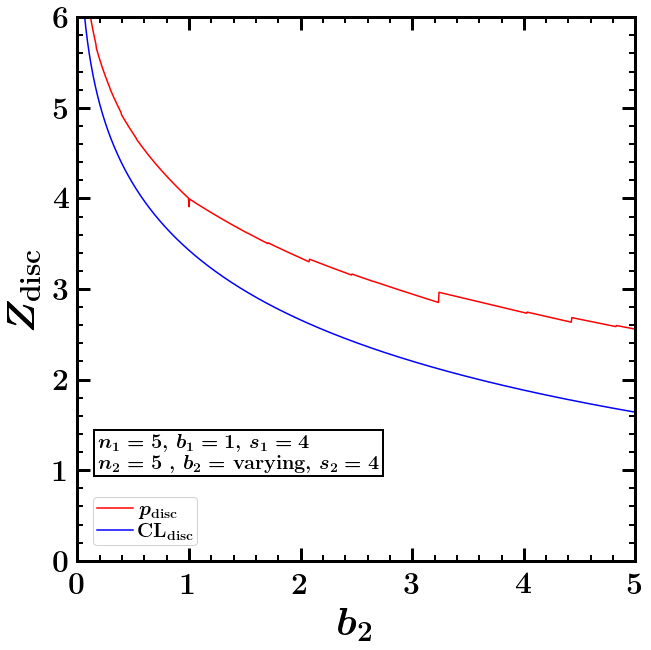

In [90]:
fig = plt.figure(figsize=(10,10))

plt.plot(b2array, Z_pDisc_bothchannels, color='red', ls='-', label=r'$\textrm{\bf $p_{\rm disc}$}$')

plt.plot(b2array, Z_CLDisc_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='linear', y_scale='linear',
     x_min=b2min-b2step, x_max=b2max,
     y_min=0, y_max=6,
     y_label=r'$\textrm{\bf $Z_{\rm disc}$}$',
     x_label=r'$b_2$',
     major_xtick=1, minor_xtick=0.2,
     major_ytick=1, minor_ytick=0.2)

RotationAwareAnnotation("$\\textrm{\\bf $n_1 = 5$, $b_1 = 1$, $s_1 = 4$}$\n$\\textrm{\\bf $n_2 = 5$ , $b_2 = $ varying, $s_2 = 4$}$", xy=(0.18, 1.4), p=(20, 1.4), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZDisc_5_1_4_5_var_4.pdf',bbox_inches='tight')

### Fig 2.15b

In [91]:
#Inputs

#channel 1
n1 = 3 #observed number of events
b1 = 0.1 #background
s1 = 2 #signal

#channel 2
n2 = 5 #observed number of events
s2 = 4 #background

#Combined
narray = [n1, n2]
sarray = [s1, s2]
barray_varyb2 = lambda b2: [b1, b2]

#X-axis: background mean in channel 2
b2min = 0.005
b2max = 8
b2step = 0.005
b2array = np.arange(b2min, b2max + b2step, b2step)

#Y-axis: observed discovery significances

#CLdisc for both channels
Z_CLDisc_bothchannels = [ZDiscObsN_Unc0(narray, barray_varyb2(b), sarray, CLDiscbool=True) for b in b2array]

#pdisc for both channels
Z_pDisc_bothchannels = [ZDiscObsN_Unc0(narray, barray_varyb2(b), sarray, CLDiscbool=False) for b in b2array]

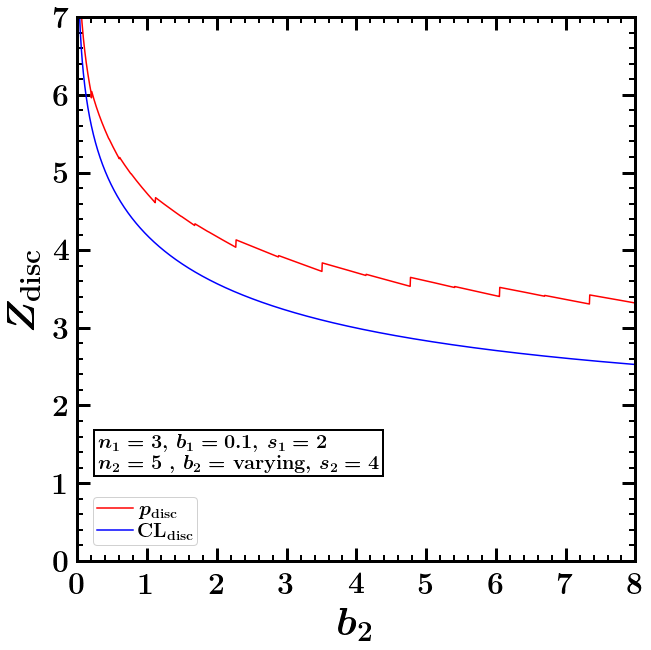

In [92]:
fig = plt.figure(figsize=(10,10))

plt.plot(b2array, Z_pDisc_bothchannels, color='red', ls='-', label=r'$\textrm{\bf $p_{\rm disc}$}$')

plt.plot(b2array, Z_CLDisc_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='linear', y_scale='linear',
     x_min=b2min-b2step, x_max=b2max,
     y_min=0, y_max=7,
     y_label=r'$\textrm{\bf $Z_{\rm disc}$}$',
     x_label=r'$b_2$',
     major_xtick=1, minor_xtick=0.2,
     major_ytick=1, minor_ytick=0.2)

RotationAwareAnnotation("$\\textrm{\\bf $n_1 = 3$, $b_1 = 0.1$, $s_1 = 2$}$\n$\\textrm{\\bf $n_2 = 5$ , $b_2 = $ varying, $s_2 = 4$}$", xy=(0.18*(8./5.), 1.4*(7./6.)), p=(20, 1.4*(7./6.)), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZDisc_3_0p1_2_5_var_4.pdf',bbox_inches='tight')

## Fig 2.16: Comparing Asimov significances from $p_{\rm disc}$ and ${\rm CL}_{\rm disc}$ in two-channel counting experiment

### Fig 2.16a

In [95]:
#Inputs

#channel 1
s1 = 3.4 #signal

#channel 2
s2 = 1.3 #signal
b2 = 0.05 #background

#Combined
sarray = [s1, s2]
barray_varyb1 = lambda b1: [b1, b2]

#X-axis: background mean in channel 1
b1min = 0.01
b1max = 10
b1array = np.geomspace(b1min, b1max, 3000)

#Y-axis: expected discovery significances

#CLdisc for both channels
Z_CLDisc_bothchannels = [ZDiscExpN_Unc0(sarray, barray_varyb1(b), CLDiscbool=True) for b in b1array]

#pdisc for both channels
Z_pDisc_bothchannels = [ZDiscExpN_Unc0(sarray, barray_varyb1(b), CLDiscbool=False) for b in b1array]

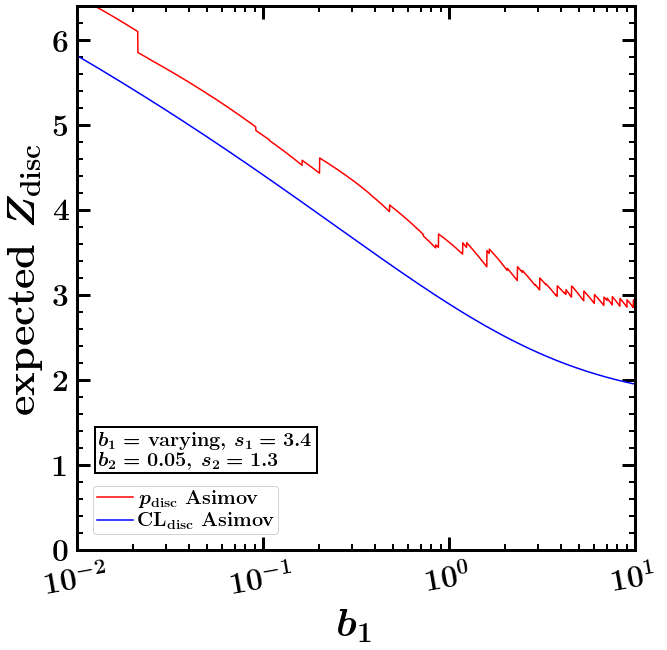

In [96]:
fig = plt.figure(figsize=(10,10))

plt.plot(b1array, Z_pDisc_bothchannels, color='red', ls='-', label=r'$\textrm{\bf $p_{\rm disc}$ Asimov}$')

plt.plot(b1array, Z_CLDisc_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$ Asimov}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='log', y_scale='linear', x_min=b1min, x_max=b1max, y_min=0, y_max=6.4, y_label=r'$\textrm{\bf expected $Z_{\rm disc}$}$', x_label=r'$b_1$', major_ytick=1, minor_ytick=0.2, xl_rotate=10)

RotationAwareAnnotation("$\\textrm{\\bf $b_1 = $ varying, $s_1 = 3.4$}$\n$\\textrm{\\bf $b_2 = 0.05$, $s_2 = 1.3$}$", xy=(0.013, 1.4), p=(10, 1.4), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZAsimov_disc2.pdf',bbox_inches='tight')

### Fig 2.16b

In [97]:
#Inputs

#channel 1
s1 = 3.4 #signal

#channel 2
s2 = 2.6 #signal
b2 = 1.2 #background

#Combined
sarray = [s1, s2]
barray_varyb1 = lambda b1: [b1, b2]

#X-axis: background mean in channel 1
b1min = 0.01
b1max = 10
b1array = np.geomspace(b1min, b1max, 3000)

#Y-axis: expected discovery significances

#CLdisc for both channels
Z_CLDisc_bothchannels = [ZDiscExpN_Unc0(sarray, barray_varyb1(b), CLDiscbool=True) for b in b1array]

#pdisc for both channels
Z_pDisc_bothchannels = [ZDiscExpN_Unc0(sarray, barray_varyb1(b), CLDiscbool=False) for b in b1array]

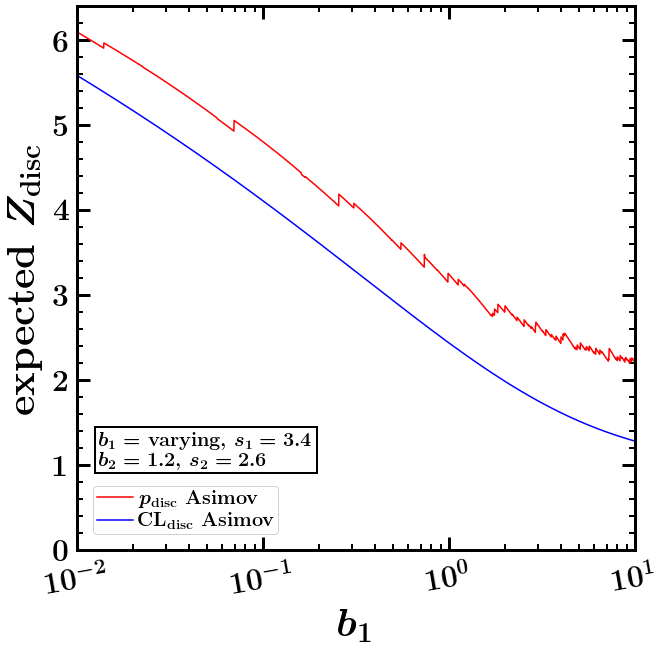

In [98]:
fig = plt.figure(figsize=(10,10))

plt.plot(b1array, Z_pDisc_bothchannels, color='red', ls='-', label=r'$\textrm{\bf $p_{\rm disc}$ Asimov}$')

plt.plot(b1array, Z_CLDisc_bothchannels, color='blue', ls='-', label=r'$\textrm{\bf ${\rm CL}_{\rm disc}$ Asimov}$')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.8, loc='lower left')

plot(x_scale='log', y_scale='linear', x_min=b1min, x_max=b1max, y_min=0, y_max=6.4, y_label=r'$\textrm{\bf expected $Z_{\rm disc}$}$', x_label=r'$b_1$', major_ytick=1, minor_ytick=0.2, xl_rotate=10)

RotationAwareAnnotation("$\\textrm{\\bf $b_1 = $ varying, $s_1 = 3.4$}$\n$\\textrm{\\bf $b_2 = 1.2$, $s_2 = 2.6$}$", xy=(0.013, 1.4), p=(10, 1.4), xytext=(0, 0), va='top', textcoords="offset points", fontsize=20, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='ZAsimov_disc1.pdf',bbox_inches='tight')

# Section III: Application to proton decay

## Fig 3.1: Current SuperK limits in $p \rightarrow \overline{\nu} K^+$ and $p \rightarrow e^+ \pi^0$

### Fig 3.1a: $p \rightarrow \overline{\nu} K^+$

In [99]:
#SuperK data

#Number of protons per kiloton of water
Np = 3.34e32

#Observed number of events        
narray = [0, 0, 0, 0,
          0, 0, 0, 0,
          177, 78, 85, 226]

#Expected backgrounds
bhatarray = [0.07, 0.14, 0.03, 0.13,
          0.18, 0.17, 0.07, 0.17,
          193.21, 94.27, 69.0, 223.14]

#Expected background uncertainties
dbhatarray = [0.02, 0.03, 0.01, 0.03,
           0.04, 0.03, 0.01, 0.03,
           3.58, 1.72, 1.28, 4.1]

#Signal selection efficiencies
epsarray = [0.079, 0.063, 0.077, 0.091,
            0.078, 0.067, 0.079, 0.1,
            0.339, 0.306, 0.326, 0.376]

#Uncertainties on the signal selection efficiencies
depsarray = [0.001, 0.001, 0.001, 0.001,
             0.001, 0.001, 0.001, 0.001,
             0.003, 0.003, 0.003, 0.003]

#Corresponding exposures in kiloton-years
exposurearray = [91.7, 49.2, 31.9, 87.3,
                 91.7, 49.2, 31.9, 87.3,
                 91.7, 49.2, 31.9, 87.3]

In [103]:
# #NOTE: Computation of this cell will take a very very long time, and it is better to compute these confidence levels on a cluster/supercomputer

# #X-axis: proton partial lifetime in years
# tau_array = np.arange(0.005, 3+0.005, 0.005)*1e34

# #Y-axis: confidence level for exclusion
# CL_array = [ProtonDecay.ConfidenceLevelExclObsN(tau, narray, bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np) for tau in tau_array]

In [104]:
#To produce the plot in real-time, the final data from the computation of the above cell is provided as a txt file.

#X-axis: proton partial lifetime in years
tau_array = np.loadtxt('PartialData/SuperK_nuK.txt', usecols=0)

#Y-axis: confidence level for exclusion
CL_array = np.loadtxt('PartialData/SuperK_nuK.txt', usecols=1)

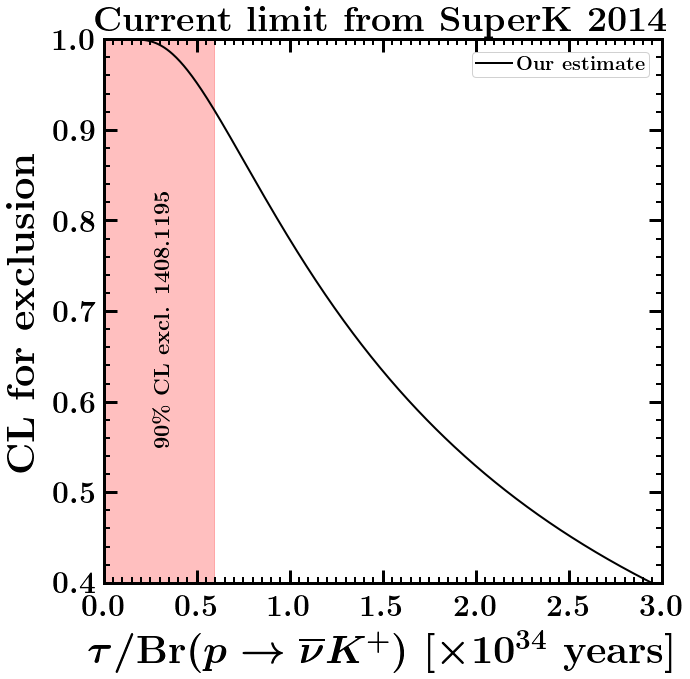

In [106]:
fig = plt.figure(figsize=(10,10))

plt.plot(tau_array/1e34, CL_array, color='black', ls='-', label=r'$\textrm{\bf Our estimate}$', lw=2)

fillbetween([0, 0.59], [0.0, 0.0], [0, 0.59], [1.0, 1.0], color='red', alpha=0.25)

RotationAwareAnnotation(r'$\textrm{\bf 90\% CL excl. 1408.1195}$', xy=(0.59/2, 0.55), p=(0.59/2, 1), xytext=(5, 0), va='center', textcoords="offset points", fontsize=22, zorder=10)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65)

plot(x_min=0, x_max=3, y_min=0.4, y_max=1, x_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [$\times 10^{34}$ years]}$', y_label=r'\textrm{\bf CL for exclusion}', title=r'$\textrm{\bf Current limit from SuperK 2014}$', major_xtick=0.5, minor_xtick=0.05, major_ytick=0.1, minor_ytick=0.02)

fig.savefig(fname='SuperK_nuK.pdf',bbox_inches='tight')

### Fig 3.1b: $p \rightarrow e^+ \pi^0$

In [107]:
#SuperK data

#Number of protons per kiloton of water
Np = 3.34e32

#Observed number of events
narray = [0, 0, 0, 0,
          0, 0, 0, 0]

#Expected backgrounds
bhatarray = [0.01, 0.01, 0.01, 0.01,
             0.15, 0.11, 0.07, 0.25]

#Expected background uncertainties
dbhatarray = [0.01, 0.01, 0, 0,
              0.06, 0.04, 0.03, 0.11]

#Signal selection efficiencies
epsarray = [0.183, 0.166, 0.187, 0.182,
            0.2, 0.194, 0.203, 0.192]

#Uncertainties on the signal selection efficiencies
depsarray = [0.017, 0.017, 0.017, 0.015,
             0.033, 0.03, 0.033, 0.031]

#Corresponding exposures in kiloton-years
exposurearray = [111.4, 59.4, 38.6, 241.3,
                 111.4, 59.4, 38.6, 241.3]

In [108]:
# #NOTE: Computation of this cell will take a very very long time, and it is better to compute these confidence levels on a cluster/supercomputer

# #X-axis: proton partial lifetime in years
# tau_array = np.arange(0.025, 11+0.025, 0.025)*1e34

# #Y-axis: confidence level for exclusion
# CL_array = [ProtonDecay.ConfidenceLevelExclObsN(tau, narray, bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np) for tau in tau_array]

In [109]:
#To produce the plot in real-time, the final data from the computation of the above cell is provided as a txt file.

#X-axis: proton partial lifetime in years
tau_array = np.loadtxt('PartialData/SuperK_epi.txt', usecols=0)

#Y-axis: confidence level for exclusion
CL_array = np.loadtxt('PartialData/SuperK_epi.txt', usecols=1)

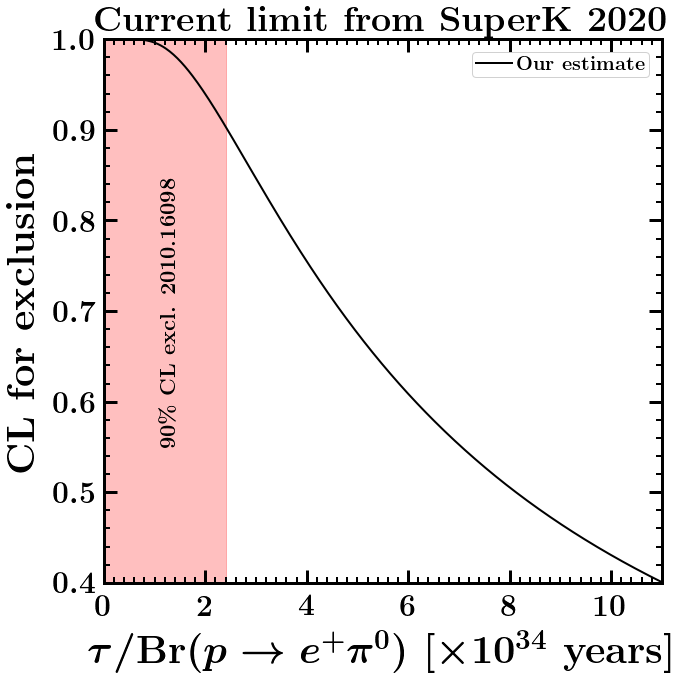

In [111]:
fig = plt.figure(figsize=(10,10))

plt.plot(tau_array/10**34, CL_array, color='black', label=r'$\textrm{\bf Our estimate}$', ls='-', lw=2)

fillbetween([0, 2.4], [0.0, 0.0], [0, 2.4], [1.0, 1.0], color='red', alpha=0.25)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65)

RotationAwareAnnotation(r'$\textrm{\bf 90\% CL excl. 2010.16098}$', xy=(2.4/2, 0.55), p=(2.4/2, 1), xytext=(5, 0), va='center', textcoords="offset points", fontsize=22, zorder=10)

plot(x_min=0, x_max=11, y_min=0.4, y_max=1, x_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow e^+ \pi^0)$ [$\times 10^{34}$ years]}$', y_label=r'\textrm{\bf CL for exclusion}', title=r'$\textrm{\bf Current limit from SuperK 2020}$', major_xtick=2, minor_xtick=0.2, major_ytick=0.1, minor_ytick=0.02)

fig.savefig(fname='SuperK_epi.pdf',bbox_inches='tight')

## Fig 3.2: Required runtime to exclude/discover $p \rightarrow \overline{\nu} K^+$ at 40 kton DUNE

### Fig 3.2a: Expected 90% CL exclusion

In [112]:
#Inputs
NKTON = 40 #No of ktons of detector material
NP = 2.71e32 #No of protons per kton
EPS=0.4 #signal efficiency
DEL_EPS=0.1 #variation in signal efficiency
CL = 0.90 #confidence level
b_array = np.geomspace(1e-5, 5e3, num=1200) #background means

#Y-axis: runtime needed in years for various proton partial lifetimes = {7.5e33, 1.5e34, 2.5e34, 4e34} years
runtime_tau7p5e33 = np.array([ProtonDecay.RuntimeExclExp_Unc0(7.5e33, b, EPS, NKTON, NP, CL, CLExclbool=True) for b in b_array])
runtime_tau7p5e33_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau7p5e33) #runtime with most optimistic efficiency
runtime_tau7p5e33_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau7p5e33) #runtime with most pessimistic efficiency

runtime_tau1p5e34 = np.array([ProtonDecay.RuntimeExclExp_Unc0(1.5e34, b, EPS, NKTON, NP, CL, CLExclbool=True) for b in b_array])
runtime_tau1p5e34_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau1p5e34) #runtime with most optimistic efficiency
runtime_tau1p5e34_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau1p5e34) #runtime with most pessimistic efficiency

runtime_tau2p5e34 = np.array([ProtonDecay.RuntimeExclExp_Unc0(2.5e34, b, EPS, NKTON, NP, CL, CLExclbool=True) for b in b_array])
runtime_tau2p5e34_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau2p5e34) #runtime with most optimistic efficiency
runtime_tau2p5e34_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau2p5e34) #runtime with most pessimistic efficiency

runtime_tau4e34 = np.array([ProtonDecay.RuntimeExclExp_Unc0(4e34, b, EPS, NKTON, NP, CL, CLExclbool=True) for b in b_array])
runtime_tau4e34_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau4e34) #runtime with most optimistic efficiency
runtime_tau4e34_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau4e34) #runtime with most pessimistic efficiency

#X-axis: background rate per megaton year of exposure for various proton partial lifetimes
bperMtonyear_tau7p5e33 = b_array/(runtime_tau7p5e33*NKTON*1e-3)
bperMtonyear_tau7p5e33_effmax = b_array/(runtime_tau7p5e33_effmax*NKTON*1e-3)
bperMtonyear_tau7p5e33_effmin = b_array/(runtime_tau7p5e33_effmin*NKTON*1e-3)

bperMtonyear_tau1p5e34 = b_array/(runtime_tau1p5e34*NKTON*1e-3)
bperMtonyear_tau1p5e34_effmax = b_array/(runtime_tau1p5e34_effmax*NKTON*1e-3)
bperMtonyear_tau1p5e34_effmin = b_array/(runtime_tau1p5e34_effmin*NKTON*1e-3)

bperMtonyear_tau2p5e34 = b_array/(runtime_tau2p5e34*NKTON*1e-3)
bperMtonyear_tau2p5e34_effmax = b_array/(runtime_tau2p5e34_effmax*NKTON*1e-3)
bperMtonyear_tau2p5e34_effmin = b_array/(runtime_tau2p5e34_effmin*NKTON*1e-3)

bperMtonyear_tau4e34 = b_array/(runtime_tau4e34*NKTON*1e-3)
bperMtonyear_tau4e34_effmax = b_array/(runtime_tau4e34_effmax*NKTON*1e-3)
bperMtonyear_tau4e34_effmin = b_array/(runtime_tau4e34_effmin*NKTON*1e-3)

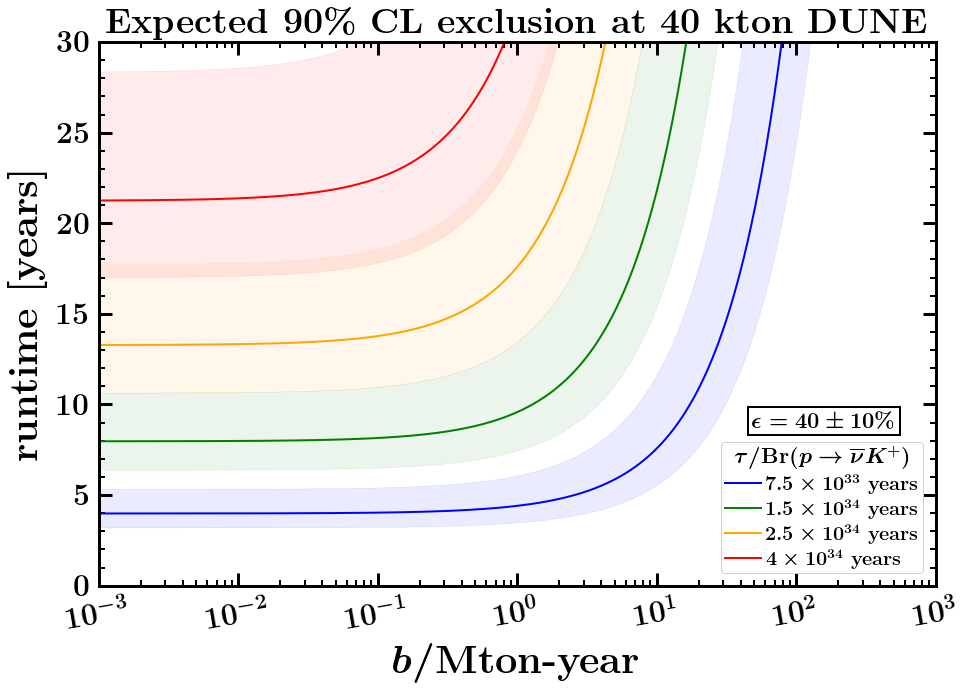

In [113]:
fig = plt.figure(figsize=(15,10))

plt.plot(bperMtonyear_tau7p5e33, runtime_tau7p5e33, color='blue', lw=2, label=r'$\textrm{\bf $7.5 \times 10^{33}$ years}$')

fillbetween(bperMtonyear_tau7p5e33_effmax , runtime_tau7p5e33_effmax, bperMtonyear_tau7p5e33_effmin, runtime_tau7p5e33_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('blue'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('blue'), 0.08),
            lw = 0.25, ls='-')


plt.plot(bperMtonyear_tau1p5e34, runtime_tau1p5e34, color='green', lw=2, label=r'$\textrm{\bf $1.5 \times 10^{34}$ years}$')

fillbetween(bperMtonyear_tau1p5e34_effmax , runtime_tau1p5e34_effmax, bperMtonyear_tau1p5e34_effmin, runtime_tau1p5e34_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('green'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('green'), 0.08),
            lw = 0.25, ls='-')


plt.plot(bperMtonyear_tau2p5e34, runtime_tau2p5e34, color='orange', lw=2, label=r'$\textrm{\bf $2.5 \times 10^{34}$ years}$')

fillbetween(bperMtonyear_tau2p5e34_effmax , runtime_tau2p5e34_effmax, bperMtonyear_tau2p5e34_effmin, runtime_tau2p5e34_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('orange'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('orange'), 0.08),
            lw = 0.25, ls='-')


plt.plot(bperMtonyear_tau4e34, runtime_tau4e34, color='red', lw=2, label=r'$\textrm{\bf $4 \times 10^{34}$ years}$')

fillbetween(bperMtonyear_tau4e34_effmax , runtime_tau4e34_effmax, bperMtonyear_tau4e34_effmin, runtime_tau4e34_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('red'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('red'), 0.08),
            lw = 0.25, ls='-')


plt.legend(title=r'\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$}', title_fontsize=22, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=4)

RotationAwareAnnotation(r'$\textrm{\bf $\epsilon = 40 \pm 10 %s$}$' %('\%'), xy=(48, 8), p=(1e3, 8), xytext=(0, 10), va='bottom', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plot(x_min=1e-3, x_max=1e3, y_min=0, y_max=30, x_label=r'\textrm{\bf $b/\textrm{Mton-year}$}', y_label=r'$\textrm{\bf runtime [years]}$', title=r'$\textrm{\bf Expected %s%s CL exclusion at 40 kton DUNE}$' %(round(100*CL), '\%'), major_xtick=1, minor_xtick=0.2, major_ytick=5, minor_ytick=1, x_scale='log', y_scale='linear', xl_rotate=10)

fig.savefig(fname='DUNE_bperyear_CLs_%sCL_nuK.pdf' %(round(100*CL)),bbox_inches='tight')

### Fig 3.2b: Expected $Z=3$ evidence

In [125]:
#Inputs
NKTON = 40 #No of ktons of detector material
NP = 2.71e32 #No of protons per kton
EPS=0.4 #signal efficiency
DEL_EPS=0.1 #variation in signal efficiency
Z = 3 #Significance for discovery
S_MIN = 1 #minimum signal needed to claim a discovery/evidence
b_array = np.geomspace(1e-5, 5e3, num=1200) #background means

#Y-axis: runtime needed in years for various proton partial lifetimes = {7.5e33, 1.5e34, 2.5e34, 4e34} years        
runtime_tau7p5e33 = np.array([ProtonDecay.RuntimeDiscExp_Unc0(7.5e33, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) for b in b_array])
runtime_tau7p5e33_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau7p5e33) #runtime with most optimistic efficiency
runtime_tau7p5e33_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau7p5e33) #runtime with most pessimistic efficiency

runtime_tau7p5e33_solid = np.array([ProtonDecay.RuntimeDiscExp_Unc0(7.5e33, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) >= S_MIN else np.nan for b in b_array])
runtime_tau7p5e33_dash = np.array([ProtonDecay.RuntimeDiscExp_Unc0(7.5e33, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) < S_MIN else np.nan for b in b_array])


runtime_tau1p5e34 = np.array([ProtonDecay.RuntimeDiscExp_Unc0(1.5e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) for b in b_array])
runtime_tau1p5e34_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau1p5e34) #runtime with most optimistic efficiency
runtime_tau1p5e34_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau1p5e34) #runtime with most pessimistic efficiency

runtime_tau1p5e34_solid = np.array([ProtonDecay.RuntimeDiscExp_Unc0(1.5e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) >= S_MIN else np.nan for b in b_array])
runtime_tau1p5e34_dash = np.array([ProtonDecay.RuntimeDiscExp_Unc0(1.5e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) < S_MIN else np.nan for b in b_array])


runtime_tau2p5e34 = np.array([ProtonDecay.RuntimeDiscExp_Unc0(2.5e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) for b in b_array])
runtime_tau2p5e34_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau2p5e34) #runtime with most optimistic efficiency
runtime_tau2p5e34_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau2p5e34) #runtime with most pessimistic efficiency

runtime_tau2p5e34_solid = np.array([ProtonDecay.RuntimeDiscExp_Unc0(2.5e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) >= S_MIN else np.nan for b in b_array])
runtime_tau2p5e34_dash = np.array([ProtonDecay.RuntimeDiscExp_Unc0(2.5e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) < S_MIN else np.nan for b in b_array])


runtime_tau4e34 = np.array([ProtonDecay.RuntimeDiscExp_Unc0(4e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) for b in b_array])
runtime_tau4e34_effmax = (EPS/(EPS+DEL_EPS))*np.array(runtime_tau4e34) #runtime with most optimistic efficiency
runtime_tau4e34_effmin = (EPS/(EPS-DEL_EPS))*np.array(runtime_tau4e34) #runtime with most pessimistic efficiency

runtime_tau4e34_solid = np.array([ProtonDecay.RuntimeDiscExp_Unc0(4e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) >= S_MIN else np.nan for b in b_array])
runtime_tau4e34_dash = np.array([ProtonDecay.RuntimeDiscExp_Unc0(4e34, b, EPS, NKTON, NP, Z, CLDiscbool=True, s_min=S_MIN) if ProtonDecay._DiscSignal(b, Z, CLDiscbool=True) < S_MIN else np.nan for b in b_array])


#X-axis: background rate per megaton year of exposure for various proton partial lifetimes
bperMtonyear_tau7p5e33 = b_array/(runtime_tau7p5e33*NKTON*1e-3)
bperMtonyear_tau7p5e33_effmax = b_array/(runtime_tau7p5e33_effmax*NKTON*1e-3)
bperMtonyear_tau7p5e33_effmin = b_array/(runtime_tau7p5e33_effmin*NKTON*1e-3)

bperMtonyear_tau1p5e34 = b_array/(runtime_tau1p5e34*NKTON*1e-3)
bperMtonyear_tau1p5e34_effmax = b_array/(runtime_tau1p5e34_effmax*NKTON*1e-3)
bperMtonyear_tau1p5e34_effmin = b_array/(runtime_tau1p5e34_effmin*NKTON*1e-3)

bperMtonyear_tau2p5e34 = b_array/(runtime_tau2p5e34*NKTON*1e-3)
bperMtonyear_tau2p5e34_effmax = b_array/(runtime_tau2p5e34_effmax*NKTON*1e-3)
bperMtonyear_tau2p5e34_effmin = b_array/(runtime_tau2p5e34_effmin*NKTON*1e-3)

bperMtonyear_tau4e34 = b_array/(runtime_tau4e34*NKTON*1e-3)
bperMtonyear_tau4e34_effmax = b_array/(runtime_tau4e34_effmax*NKTON*1e-3)
bperMtonyear_tau4e34_effmin = b_array/(runtime_tau4e34_effmin*NKTON*1e-3)

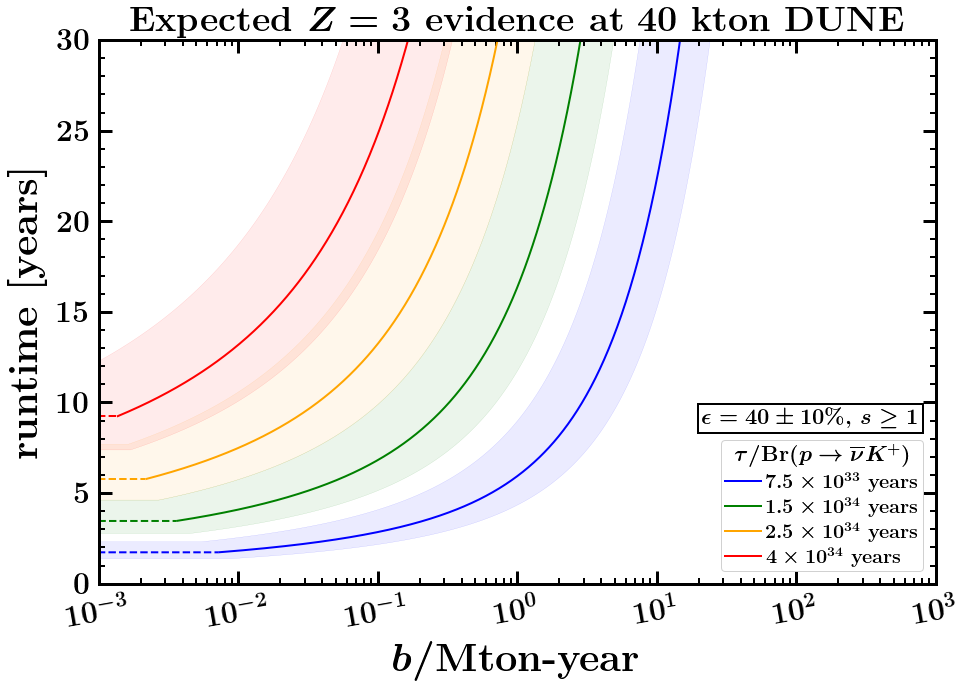

In [126]:
fig = plt.figure(figsize=(15,10))

plt.plot(bperMtonyear_tau7p5e33, runtime_tau7p5e33_solid, color='blue', ls='-', lw=2, label=r'$\textrm{\bf $7.5 \times 10^{33}$ years}$')
plt.plot(bperMtonyear_tau7p5e33, runtime_tau7p5e33_dash, color='blue', ls='--', lw=2)

fillbetween(bperMtonyear_tau7p5e33_effmax , runtime_tau7p5e33_effmax, bperMtonyear_tau7p5e33_effmin, runtime_tau7p5e33_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('blue'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('blue'), 0.08),
            lw = 0.25, ls='-')


plt.plot(bperMtonyear_tau1p5e34, runtime_tau1p5e34_solid, color='green', ls='-', lw=2, label=r'$\textrm{\bf $1.5 \times 10^{34}$ years}$')
plt.plot(bperMtonyear_tau1p5e34, runtime_tau1p5e34_dash, color='green', ls='--', lw=2)

fillbetween(bperMtonyear_tau1p5e34_effmax , runtime_tau1p5e34_effmax, bperMtonyear_tau1p5e34_effmin, runtime_tau1p5e34_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('green'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('green'), 0.08),
            lw = 0.25, ls='-')


plt.plot(bperMtonyear_tau2p5e34, runtime_tau2p5e34_solid, color='orange', ls='-', lw=2, label=r'$\textrm{\bf $2.5 \times 10^{34}$ years}$')
plt.plot(bperMtonyear_tau2p5e34, runtime_tau2p5e34_dash, color='orange', ls='--', lw=2)

fillbetween(bperMtonyear_tau2p5e34_effmax , runtime_tau2p5e34_effmax, bperMtonyear_tau2p5e34_effmin, runtime_tau2p5e34_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('orange'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('orange'), 0.08),
            lw = 0.25, ls='-')


plt.plot(bperMtonyear_tau4e34, runtime_tau4e34_solid, color='red', ls='-', lw=2, label=r'$\textrm{\bf $4 \times 10^{34}$ years}$')
plt.plot(bperMtonyear_tau4e34, runtime_tau4e34_dash, color='red', ls='--', lw=2)

fillbetween(bperMtonyear_tau4e34_effmax , runtime_tau4e34_effmax, bperMtonyear_tau4e34_effmin, runtime_tau4e34_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('red'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('red'), 0.08),
            lw = 0.25, ls='-')

plt.legend(title=r'\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$}', title_fontsize=22, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc=4)

RotationAwareAnnotation(r'$\textrm{\bf $\epsilon = 40 \pm 10 %s$, $s \ge %s$}$' %('\%', S_MIN), xy=(21, 8), p=(1e3, 8), xytext=(0, 10), va='bottom', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plot(x_min=1e-3, x_max=1e3, y_min=0, y_max=30, x_label=r'\textrm{\bf $b/\textrm{Mton-year}$}', y_label=r'$\textrm{\bf runtime [years]}$', title=r'$\textrm{\bf Expected $Z=%s$ evidence at 40 kton DUNE}$' %(Z), major_xtick=1, minor_xtick=0.2, major_ytick=5, minor_ytick=1, x_scale='log', y_scale='linear', xl_rotate=10)

fig.savefig(fname='DUNE_bperyear_CLdisc_%ssigma_nuK.pdf' %(Z),bbox_inches='tight')

## Fig 3.3: Expected reach for $p \rightarrow \overline{\nu} K^+$ at 40 kton DUNE

### Fig 3.3a: Expected 90% CL exclusion

In [127]:
#Inputs
NKTON = 40 #No of ktons of detector material
NP = 2.71e32 #No of protons per kton
EPS=0.4 #signal efficiency
DEL_EPS=0.1 #variation in signal efficiency
CL = 0.90 #confidence level

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of background rates per megaton-year of exposure = {0, 0.25, 1, 2.5}
lifetime_bperMtonyear0 = [ProtonDecay.LifetimeExclExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*ty, Np=NP, CL=CL, CLExclbool=True) for ty in runtime_array]

lifetime_bperMtonyear0p25 = [ProtonDecay.LifetimeExclExp_Unc0(b=0.25*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, CL=CL, CLExclbool=True) for ty in runtime_array] 
lifetime_bperMtonyear0p25_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear0p25) #lifetime with most optimistic efficiency
lifetime_bperMtonyear0p25_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear0p25) #lifetime with most pessimistic efficiency

lifetime_bperMtonyear1 = [ProtonDecay.LifetimeExclExp_Unc0(b=1*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, CL=CL, CLExclbool=True) for ty in runtime_array] 
lifetime_bperMtonyear1_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear1) #lifetime with most optimistic efficiency
lifetime_bperMtonyear1_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear1) #lifetime with most pessimistic efficiency

lifetime_bperMtonyear2p5 = [ProtonDecay.LifetimeExclExp_Unc0(b=2.5*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, CL=CL, CLExclbool=True) for ty in runtime_array] 
lifetime_bperMtonyear2p5_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear2p5) #lifetime with most optimistic efficiency
lifetime_bperMtonyear2p5_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear2p5) #lifetime with most pessimistic efficiency

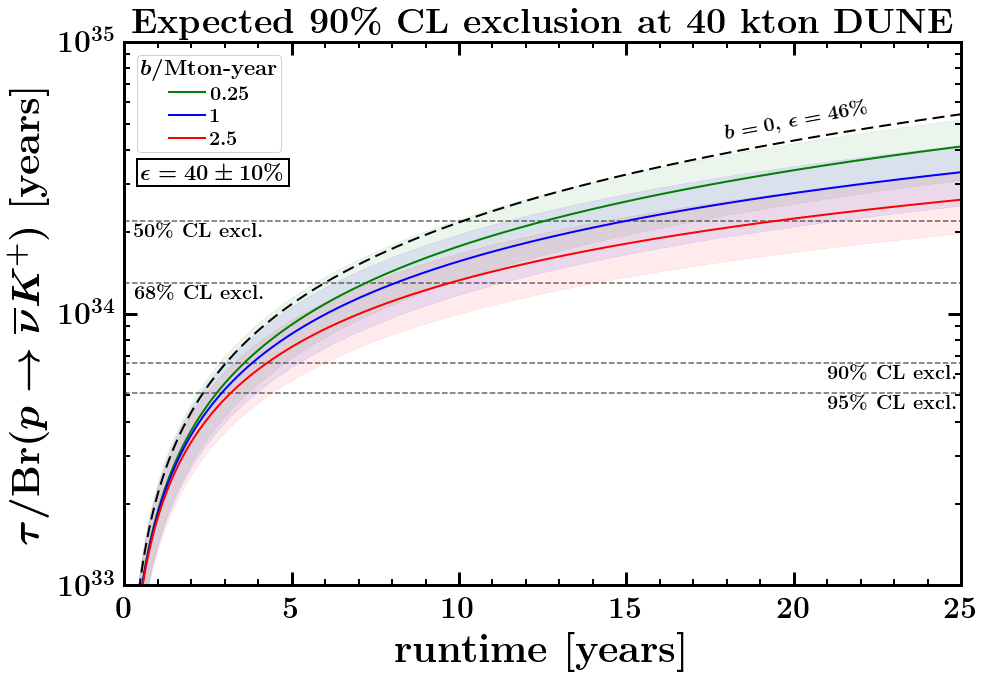

In [129]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_bperMtonyear0, color='black', ls=(0, (6, 3)), lw=2)

RotationAwareAnnotation(r'$\textrm{\bf $b = 0$, $\epsilon = 46\%$}$', xy=(18.0, ProtonDecay.LifetimeExclExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*18, Np=NP, CL=CL, CLExclbool=True)), p=(20, ProtonDecay.LifetimeExclExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*20, Np=NP, CL=CL, CLExclbool=True)), xytext=(0, 10), va='bottom', textcoords="offset points", fontsize=20)

plt.plot(runtime_array, lifetime_bperMtonyear0p25, color='green', lw=2, label=r'$\textrm{\bf $0.25$}$')

fillbetween(runtime_array, lifetime_bperMtonyear0p25_effmax, runtime_array, lifetime_bperMtonyear0p25_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('green'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('green'), 0.08),
            lw = 0.25, ls='-')

plt.plot(runtime_array, lifetime_bperMtonyear1, color='blue', lw=2, label=r'$\textrm{\bf $1$}$')

fillbetween(runtime_array, lifetime_bperMtonyear1_effmax, runtime_array, lifetime_bperMtonyear1_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('blue'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('blue'), 0.08),
            lw = 0.25, ls='-')

plt.plot(runtime_array, lifetime_bperMtonyear2p5, color='red', lw=2, label=r'$\textrm{\bf $2.5$}$')

fillbetween(runtime_array, lifetime_bperMtonyear2p5_effmax, runtime_array, lifetime_bperMtonyear2p5_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('red'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('red'), 0.08),
            lw = 0.25, ls='-')

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

RotationAwareAnnotation(r'$\textrm{\bf $\epsilon = %s \pm %s %s$}$' %(round(100*EPS), round(100*DEL_EPS), '\%'), xy=(0.5, 3.9*10**34.), p=(25., 3.9*10**34.), xytext=(0, -10), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected %s%s CL exclusion at 40 kton DUNE}$' %(round(100*CL), '\%'), major_xtick=5, minor_xtick=1)

plt.legend(title=r'\textrm{\bf $b/\textrm{\bf Mton-year}$}', title_fontsize=22, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='DUNE_CLs_%sCL_nuK.pdf' %(round(100*CL)),bbox_inches='tight')

### Fig 3.3b: Expected $Z=3$ evidence

In [130]:
#Inputs
NKTON = 40 #No of ktons of detector material
NP = 2.71e32 #No of protons per kton
EPS=0.4 #signal efficiency
DEL_EPS=0.1 #variation in signal efficiency
Z = 3 #Significance for discovery
S_MIN = 1 #minimum signal needed to claim a discovery/evidence

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of background rates per megaton-year of exposure = {0, 0.25, 1, 2.5}
lifetime_bperMtonyear0 = [ProtonDecay.LifetimeDiscExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

lifetime_bperMtonyear0p25 = [ProtonDecay.LifetimeDiscExp_Unc0(b=0.25*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array] 
lifetime_bperMtonyear0p25_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear0p25) #lifetime with most optimistic efficiency
lifetime_bperMtonyear0p25_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear0p25) #lifetime with most pessimistic efficiency

lifetime_bperMtonyear1 = [ProtonDecay.LifetimeDiscExp_Unc0(b=1*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array] 
lifetime_bperMtonyear1_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear1) #lifetime with most optimistic efficiency
lifetime_bperMtonyear1_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear1) #lifetime with most pessimistic efficiency

lifetime_bperMtonyear2p5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=2.5*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array] 
lifetime_bperMtonyear2p5_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear2p5) #lifetime with most optimistic efficiency
lifetime_bperMtonyear2p5_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear2p5) #lifetime with most pessimistic efficiency

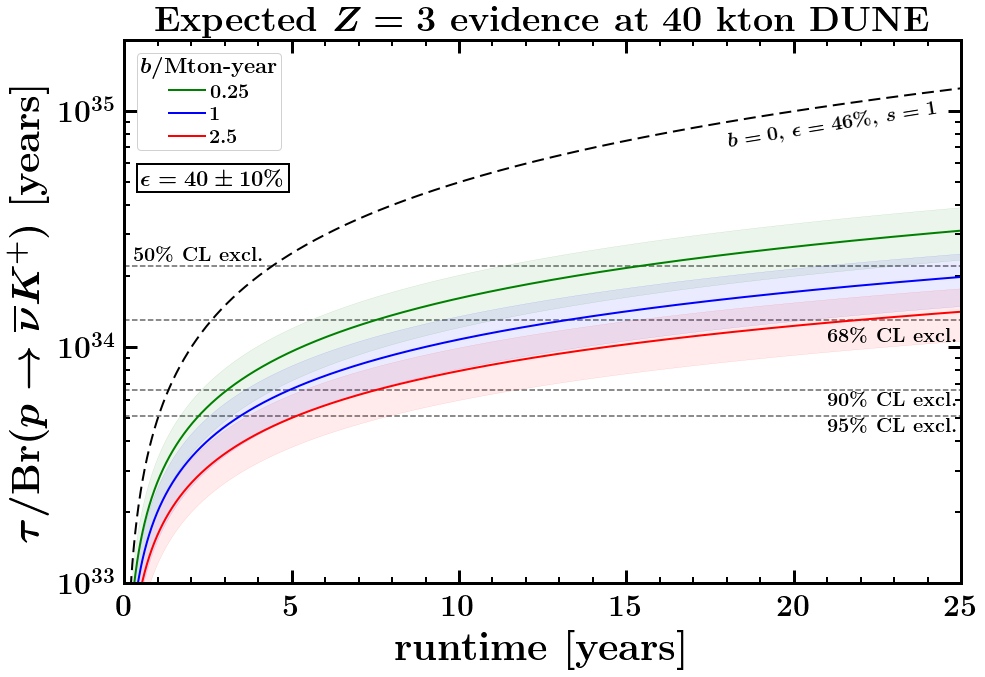

In [131]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_bperMtonyear0, color='black', ls=(0, (6, 3)), lw=2)

RotationAwareAnnotation(r'$\textrm{\bf $b = 0$, $\epsilon = 46 %s$, $s = %g$}$' %('\%',S_MIN), xy=(18.0, ProtonDecay.LifetimeDiscExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*18, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN)), p=(20, ProtonDecay.LifetimeDiscExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*20, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN)), xytext=(0, -10), va='top', textcoords="offset points", fontsize=20)

plt.plot(runtime_array, lifetime_bperMtonyear0p25, color='green', lw=2, label=r'$\textrm{\bf $0.25$}$')

fillbetween(runtime_array, lifetime_bperMtonyear0p25_effmax, runtime_array, lifetime_bperMtonyear0p25_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('green'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('green'), 0.08),
            lw = 0.25, ls='-')

plt.plot(runtime_array, lifetime_bperMtonyear1, color='blue', lw=2, label=r'$\textrm{\bf $1$}$')

fillbetween(runtime_array, lifetime_bperMtonyear1_effmax, runtime_array, lifetime_bperMtonyear1_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('blue'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('blue'), 0.08),
            lw = 0.25, ls='-')

plt.plot(runtime_array, lifetime_bperMtonyear2p5, color='red', lw=2, label=r'$\textrm{\bf $2.5$}$')

fillbetween(runtime_array, lifetime_bperMtonyear2p5_effmax, runtime_array, lifetime_bperMtonyear2p5_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('red'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('red'), 0.08),
            lw = 0.25, ls='-')

RotationAwareAnnotation(r'$\textrm{\bf $\epsilon = %s \pm %s %s$}$' %(round(100*EPS), round(100*DEL_EPS), '\%'), xy=(0.5, 6.3*10**34.), p=(25., 6.3*10**34.), xytext=(0, -10), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (21, 1.3e+34), (25, 1.3e+34), xytext=(0, -8), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, +2), va='bottom', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=2e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected $Z = %s$ evidence at 40 kton DUNE}$' %(Z), major_xtick=5, minor_xtick=1)

plt.legend(title=r'\textrm{\bf $b/\textrm{\bf Mton-year}$}', title_fontsize=22, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='DUNE_CLdisc_%ssigma_nuK.pdf' %(Z),bbox_inches='tight')

## Fig 3.4: Expected reach for $Z=5$ discovery of $p \rightarrow \overline{\nu} K^+$ at 40 kton DUNE

In [132]:
#Inputs
NKTON = 40 #No of ktons of detector material
NP = 2.71e32 #No of protons per kton
EPS=0.4 #signal efficiency
DEL_EPS=0.1 #variation in signal efficiency
Z = 5 #Significance for discovery
S_MIN = 1 #minimum signal needed to claim a discovery/evidence

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of background rates per megaton-year of exposure = {0, 0.25, 1, 2.5}
lifetime_bperMtonyear0 = [ProtonDecay.LifetimeDiscExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

lifetime_bperMtonyear0p25 = [ProtonDecay.LifetimeDiscExp_Unc0(b=0.25*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array] 
lifetime_bperMtonyear0p25_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear0p25) #lifetime with most optimistic efficiency
lifetime_bperMtonyear0p25_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear0p25) #lifetime with most pessimistic efficiency

lifetime_bperMtonyear1 = [ProtonDecay.LifetimeDiscExp_Unc0(b=1*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array] 
lifetime_bperMtonyear1_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear1) #lifetime with most optimistic efficiency
lifetime_bperMtonyear1_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear1) #lifetime with most pessimistic efficiency

lifetime_bperMtonyear2p5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=2.5*NKTON*ty/1e3, eps=EPS, exposure=NKTON*ty, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array] 
lifetime_bperMtonyear2p5_effmax = ((EPS+DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear2p5) #lifetime with most optimistic efficiency
lifetime_bperMtonyear2p5_effmin = ((EPS-DEL_EPS)/EPS)*np.array(lifetime_bperMtonyear2p5) #lifetime with most pessimistic efficiency

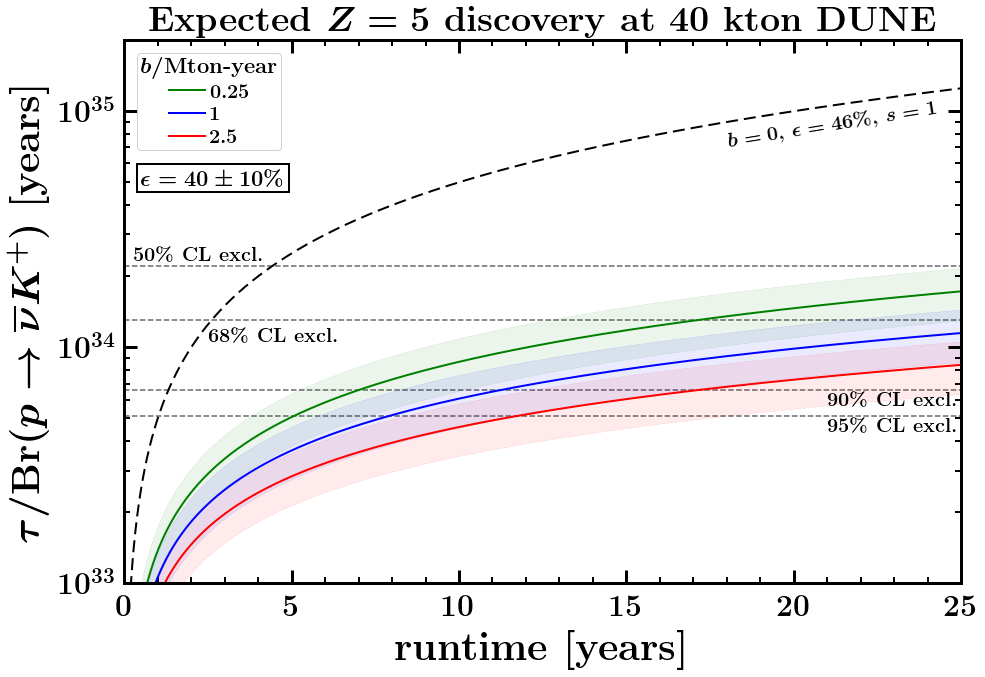

In [133]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_bperMtonyear0, color='black', ls=(0, (6, 3)), lw=2)

RotationAwareAnnotation(r'$\textrm{\bf $b = 0$, $\epsilon = 46 %s$, $s = %g$}$' %('\%',S_MIN), xy=(18.0, ProtonDecay.LifetimeDiscExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*18, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN)), p=(20, ProtonDecay.LifetimeDiscExp_Unc0(b=0.0, eps=0.46, exposure=NKTON*20, Np=NP, Z=Z, CLDiscbool=True, s_min=S_MIN)), xytext=(0, -10), va='top', textcoords="offset points", fontsize=20)

plt.plot(runtime_array, lifetime_bperMtonyear0p25, color='green', lw=2, label=r'$\textrm{\bf $0.25$}$')

fillbetween(runtime_array, lifetime_bperMtonyear0p25_effmax, runtime_array, lifetime_bperMtonyear0p25_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('green'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('green'), 0.08),
            lw = 0.25, ls='-')

plt.plot(runtime_array, lifetime_bperMtonyear1, color='blue', lw=2, label=r'$\textrm{\bf $1$}$')

fillbetween(runtime_array, lifetime_bperMtonyear1_effmax, runtime_array, lifetime_bperMtonyear1_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('blue'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('blue'), 0.08),
            lw = 0.25, ls='-')

plt.plot(runtime_array, lifetime_bperMtonyear2p5, color='red', lw=2, label=r'$\textrm{\bf $2.5$}$')

fillbetween(runtime_array, lifetime_bperMtonyear2p5_effmax, runtime_array, lifetime_bperMtonyear2p5_effmin,
            edgecolor=np.append(mpl.colors.to_rgb('red'), 0.25),
            facecolor=np.append(mpl.colors.to_rgb('red'), 0.08),
            lw = 0.25, ls='-')

RotationAwareAnnotation(r'$\textrm{\bf $\epsilon = %s \pm %s %s$}$' %(round(100*EPS), round(100*DEL_EPS), '\%'), xy=(0.5, 6.3*10**34.), p=(25., 6.3*10**34.), xytext=(0, -10), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (2.5, 1.3e+34), (25, 1.3e+34), xytext=(0, -8), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, +2), va='bottom', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=2e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected $Z = %s$ discovery at 40 kton DUNE}$' %(Z), major_xtick=5, minor_xtick=1)

plt.legend(title=r'\textrm{\bf $b/\textrm{\bf Mton-year}$}', title_fontsize=22, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='DUNE_CLdisc_%ssigma_nuK.pdf' %(Z),bbox_inches='tight')

## Fig 3.5: $p \rightarrow \overline{\nu} K^+$ at 40 kton DUNE with the idealized optimistic case of no background

In [137]:
#Inputs
NKTON = 40 #No of ktons of detector material
NP = 2.71e32 #No of protons per kton
EPS=0.46 #signal efficiency

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: proton partial lifetime in p -> nubar K+ channel that give different probabilities of observing at least one event = {0.5, 0.632, 0.8, 0.9, 0.95, 0.99}

signal_Prob_nge1 = lambda Prob: -np.log(1 - Prob) 

lifetime_Prob50 = [ProtonDecay.ProtonLifetime(exposure=NKTON*ty, s=signal_Prob_nge1(0.50), eps=EPS, Np=NP) for ty in runtime_array]
lifetime_Prob63p2 = [ProtonDecay.ProtonLifetime(exposure=NKTON*ty, s=signal_Prob_nge1(0.632), eps=EPS, Np=NP) for ty in runtime_array]
lifetime_Prob80 = [ProtonDecay.ProtonLifetime(exposure=NKTON*ty, s=signal_Prob_nge1(0.80), eps=EPS, Np=NP) for ty in runtime_array]
lifetime_Prob90 = [ProtonDecay.ProtonLifetime(exposure=NKTON*ty, s=signal_Prob_nge1(0.90), eps=EPS, Np=NP) for ty in runtime_array]
lifetime_Prob95 = [ProtonDecay.ProtonLifetime(exposure=NKTON*ty, s=signal_Prob_nge1(0.95), eps=EPS, Np=NP) for ty in runtime_array]
lifetime_Prob99 = [ProtonDecay.ProtonLifetime(exposure=NKTON*ty, s=signal_Prob_nge1(0.99), eps=EPS, Np=NP) for ty in runtime_array]

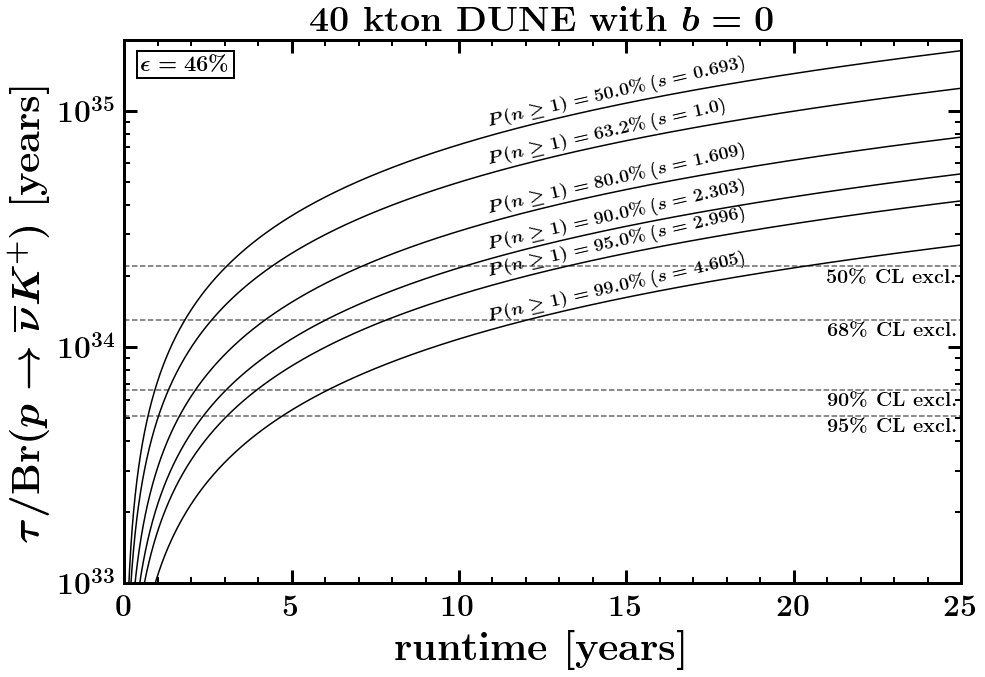

In [138]:
(xmin, ymin)=(0, 1e33)
(xmax, ymax)=(25, 2e35)

fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_Prob50, color='black')
plt.plot(runtime_array, lifetime_Prob63p2, color='black')
plt.plot(runtime_array, lifetime_Prob80, color='black')
plt.plot(runtime_array, lifetime_Prob90, color='black')
plt.plot(runtime_array, lifetime_Prob95, color='black')
plt.plot(runtime_array, lifetime_Prob99, color='black')

#for labeling
for prob in [0.5, 0.632, 0.8, 0.9, 0.95, 0.99]:
    xtemp=11
    del_xtemp=5
    ytemp=lambda x: ProtonDecay.ProtonLifetime(NKTON*x, signal_Prob_nge1(prob), EPS, NP)
    
    RotationAwareAnnotation(r'$P(n \ge 1) = %s %s$ ($s = %s$)' %(round(100*(1-np.exp(-signal_Prob_nge1(prob))),1), '\%', round(signal_Prob_nge1(prob), 3)), xy=(xtemp, ytemp(xtemp)),p=(xtemp+del_xtemp, ytemp(xtemp+del_xtemp)), xytext=(-2, 4), va='bottom', textcoords="offset points", fontsize=18, color='black')

RotationAwareAnnotation(r'$\textrm{\bf $\epsilon = 46\%$}$', xy=(0.5, 2e35), p=(25., 2e35), xytext=(0, -15), va='top', textcoords="offset points", fontsize=22, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (21, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (21, 2.18e+34), (25, 2.18e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf 40 kton DUNE with $b=0$}$', major_xtick=5, minor_xtick=1)

fig.savefig(fname='DUNE_disc_b0_nuK.pdf',bbox_inches='tight')

## Fig 3.6: Expected reach for $p \rightarrow \overline{\nu} K^+$ at 20 kton JUNO

### Fig 3.6a: Expected 90% and 95% CL exclusion

In [139]:
#Inputs
NKTON = 20 #No of ktons of detector material
NP = 6.75e33/20 #No of protons per kton

BPERMTONYEAR1 = 2.5 #b per megaton year of exposure
EPS1=0.55 #signal efficiency

BPERMTONYEAR2 = 1.5 #b per megaton year of exposure
EPS2=0.26 #signal efficiency

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of (signal efficiency, background rates per megaton-year of exposure) = {(0.55, 2.5), (0.26, 1.5)}
lifetime1_CL90 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR1*NKTON*ty/1e3, eps=EPS1, exposure=NKTON*ty, Np=NP, CL=0.90, CLExclbool=True) for ty in runtime_array]
lifetime1_CL95 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR1*NKTON*ty/1e3, eps=EPS1, exposure=NKTON*ty, Np=NP, CL=0.95, CLExclbool=True) for ty in runtime_array]

lifetime2_CL90 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR2*NKTON*ty/1e3, eps=EPS2, exposure=NKTON*ty, Np=NP, CL=0.90, CLExclbool=True) for ty in runtime_array]
lifetime2_CL95 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR2*NKTON*ty/1e3, eps=EPS2, exposure=NKTON*ty, Np=NP, CL=0.95, CLExclbool=True) for ty in runtime_array]

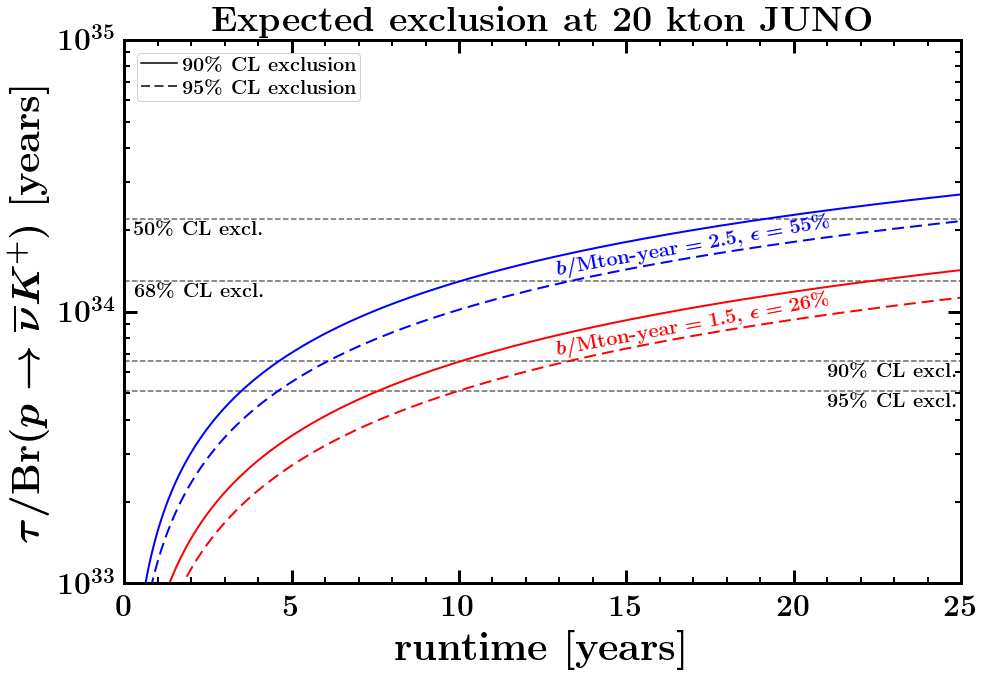

In [140]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', label=r'$\textrm{\bf 90\% CL exclusion}$')
plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf 95\% CL exclusion}$')

plt.plot(runtime_array, lifetime1_CL90, color='blue', lw=2)
plt.plot(runtime_array, lifetime1_CL95, color='blue', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf $b/\textrm{\bf Mton-year} = %s$, $\epsilon = %s %s$}$' %(BPERMTONYEAR1, round(EPS1*100), '\%'), xy=(13.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR1*NKTON*13*1e-3, EPS1, NKTON*13, NP, 0.95, True)), p=(20.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR1*NKTON*20*1e-3, EPS1, NKTON*20, NP, 0.95, True)), xytext=(0, 4), va='bottom', textcoords="offset points", fontsize=20, color='blue')

plt.plot(runtime_array, lifetime2_CL90, color='red', lw=2)
plt.plot(runtime_array, lifetime2_CL95, color='red', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf $b/\textrm{\bf Mton-year} = %s$, $\epsilon = %s %s$}$' %(BPERMTONYEAR2, round(EPS2*100), '\%'), xy=(13.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR2*NKTON*13*1e-3, EPS2, NKTON*13, NP, 0.95, True)), p=(20.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR2*NKTON*20*1e-3, EPS2, NKTON*20, NP, 0.95, True)), xytext=(0, 4), va='bottom', textcoords="offset points", fontsize=20, color='red')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected exclusion at 20 kton JUNO}$', major_xtick=5, minor_xtick=1)

fig.savefig(fname='JUNO_CLs_nuK.pdf',bbox_inches='tight')

### Fig 3.6b: Expected Z=3 evidence and Z=5 discovery

In [141]:
#Inputs
NKTON = 20 #No of ktons of detector material
NP = 6.75e33/20 #No of protons per kton
S_MIN = 1 #min signal needed to claim discovery

BPERMTONYEAR1 = 2.5 #b per megaton year of exposure
EPS1=0.55 #signal efficiency

BPERMTONYEAR2 = 1.5 #b per megaton year of exposure
EPS2=0.26 #signal efficiency

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of (signal efficiency, background rates per megaton-year of exposure) = {(0.55, 2.5), (0.26, 1.5)}
lifetime1_Z3 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR1*NKTON*ty/1e3, eps=EPS1, exposure=NKTON*ty, Np=NP, Z=3, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]
lifetime1_Z5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR1*NKTON*ty/1e3, eps=EPS1, exposure=NKTON*ty, Np=NP, Z=5, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

lifetime2_Z3 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR2*NKTON*ty/1e3, eps=EPS2, exposure=NKTON*ty, Np=NP, Z=3, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]
lifetime2_Z5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR2*NKTON*ty/1e3, eps=EPS2, exposure=NKTON*ty, Np=NP, Z=5, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

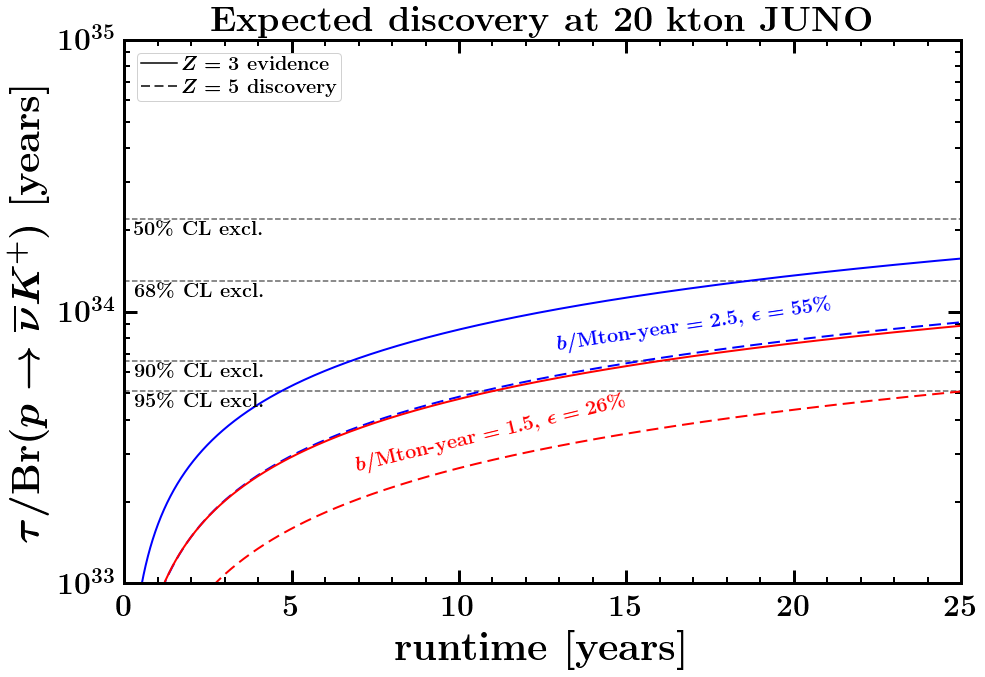

In [142]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', label=r'$\textrm{\bf $Z = 3$ evidence}$')
plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf $Z = 5$ discovery}$')

plt.plot(runtime_array, lifetime1_Z3, color='blue', lw=2)
plt.plot(runtime_array, lifetime1_Z5, color='blue', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf $b/\textrm{\bf Mton-year} = %s$, $\epsilon = %s %s$}$' %(BPERMTONYEAR1, round(EPS1*100), '\%'), xy=(13.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR1*NKTON*13*1e-3, EPS1, NKTON*13, NP, 5, True)), p=(20.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR1*NKTON*20*1e-3, EPS1, NKTON*20, NP, 5, True)), xytext=(0, 20), va='bottom', textcoords="offset points", fontsize=20, color='blue')

plt.plot(runtime_array, lifetime2_Z3, color='red', lw=2)
plt.plot(runtime_array, lifetime2_Z5, color='red', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf $b/\textrm{\bf Mton-year} = %s$, $\epsilon = %s %s$}$' %(BPERMTONYEAR2, round(EPS2*100), '\%'), xy=(7.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR2*NKTON*7*1e-3, EPS2, NKTON*7, NP, 5, True)), p=(15.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR2*NKTON*15*1e-3, EPS2, NKTON*15, NP, 5, True)), xytext=(0, 23), va='bottom', textcoords="offset points", fontsize=20, color='red')

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (0.3, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (0.3, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected discovery at 20 kton JUNO}$', major_xtick=5, minor_xtick=1)

fig.savefig(fname='JUNO_CLdisc_nuK.pdf', bbox_inches='tight')

## Fig 3.7: Expected reach for $p \rightarrow \overline{\nu} K^+$ at 186 kton Hyper-Kamiokande

In [161]:
#Inputs
Nkton = 186 #No of ktons of detector material
Np = 3.34e32 #No of protons per kton

bperMtonyeararray = [1916, 0.9, 0.7] #background per megaton-year of exposure
dbperMtonyeararray = [0.0, 0.2, 0.2] #background uncertainty per megaton-year of exposure
bhatarray = lambda runtime: [bperMtonyear*Nkton*runtime/1e3 for bperMtonyear in bperMtonyeararray] #background
dbhatarray = lambda runtime: [dbperMtonyear*Nkton*runtime/1e3 for dbperMtonyear in dbperMtonyeararray] #background uncertainty
epsarray = [0.31, 0.127, 0.108] #signal efficiency
depsarray = [0, 0.024, 0.011] #uncertainty in signal efficiency
exposurearray = lambda runtime: [Nkton*runtime]*len(epsarray)

### Fig 3.7a: Expected 90% and 95% CL exclusion

In [172]:
# #NOTE: Computation of this cell will take a very very long time, and it is better to compute these reach estimates on a cluster/supercomputer

# #X-axis: runtime in years
# runtime_array = np.arange(0.1, 25.1, 0.1)

# #Y-axis: expected reach for proton partial lifetime in years
# lifetime_CL90 = [ProtonDecay.LifetimeExclExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, CL=0.90) for ty in runtime_array]
# lifetime_CL95 = [ProtonDecay.LifetimeExclExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, CL=0.95) for ty in runtime_array]

In [163]:
#To produce the plot in real-time, the final data from the computation of the above cell is provided as a txt file.

#X-axis: runtime in years
runtime_array = np.loadtxt('PartialData/HyperK_nuK_90CLExcl.txt', usecols=0)

#Y-axis: expected reach for various values of (signal efficiency, background rates per megaton-year of exposure) = {(0.55, 2.5), (0.26, 1.5)}
lifetime_CL90 = np.loadtxt('PartialData/HyperK_nuK_90CLExcl.txt', usecols=1)
lifetime_CL95 = np.loadtxt('PartialData/HyperK_nuK_95CLExcl.txt', usecols=1)

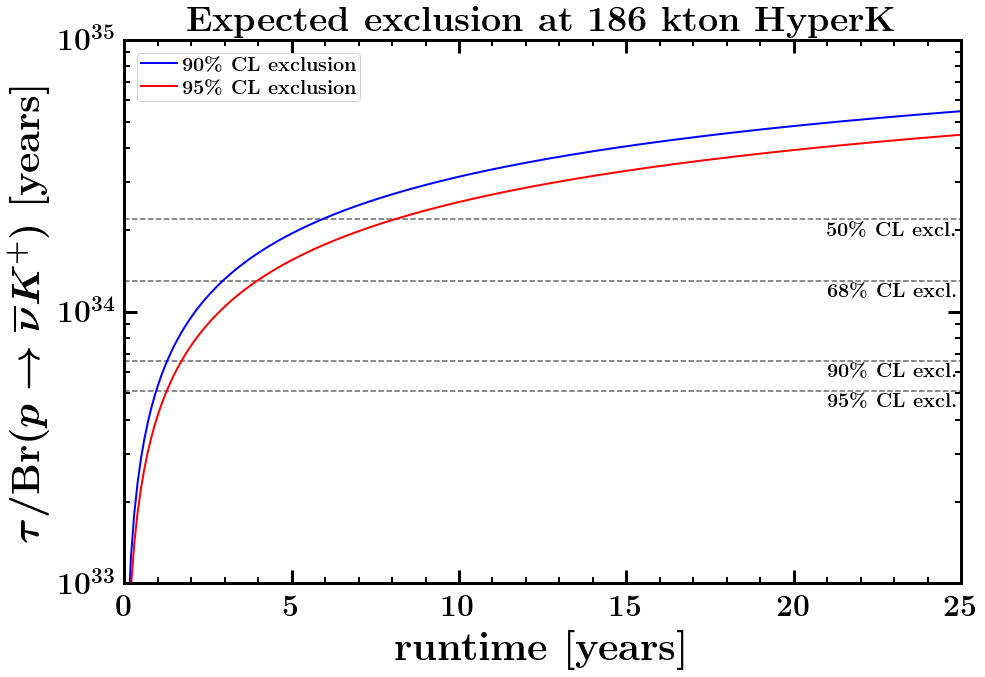

In [164]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_CL90, label=r'$\textrm{\bf 90\% CL exclusion}$', color='blue', lw=2)
plt.plot(runtime_array, lifetime_CL95, label=r'$\textrm{\bf 95\% CL exclusion}$', color='red', lw=2)

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (21, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (21, 2.18e+34), (25, 2.18e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected exclusion at 186 kton HyperK}$', major_xtick=5, minor_xtick=1)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')
    
fig.savefig(fname='HyperK_CLexcl_nuK.pdf',bbox_inches='tight')

### Fig 3.7b: Expected Z=3 evidence and Z=5 discovery

In [173]:
# #NOTE: Computation of this cell will take a very very long time, and it is better to compute these reach estimates on a cluster/supercomputer

# #X-axis: runtime in years
# runtime_array = np.arange(0.1, 25.1, 0.1)

# #Y-axis: expected reach for proton partial lifetime in years
# lifetime_Z3 = [ProtonDecay.LifetimeDiscExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, Z=3) for ty in runtime_array]
# lifetime_Z5 = [ProtonDecay.LifetimeDiscExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, Z=5) for ty in runtime_array]

In [170]:
#To produce the plot in real-time, the final data from the computation of the above cell is provided as a txt file.

#X-axis: runtime in years
runtime_array = np.loadtxt('PartialData/HyperK_nuK_3SigmaDisc.txt', usecols=0)

#Y-axis: expected reach for various values of (signal efficiency, background rates per megaton-year of exposure) = {(0.55, 2.5), (0.26, 1.5)}
lifetime_Z3 = np.loadtxt('PartialData/HyperK_nuK_3SigmaDisc.txt', usecols=1)
lifetime_Z5 = np.loadtxt('PartialData/HyperK_nuK_5SigmaDisc.txt', usecols=1)

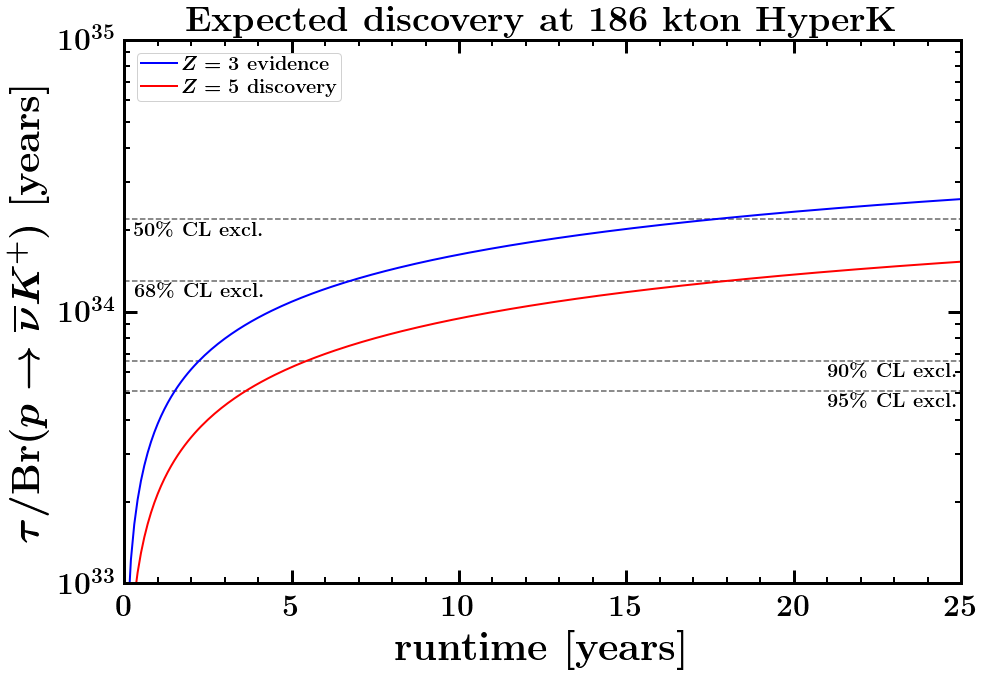

In [171]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_Z3, label=r'$\textrm{\bf $Z = 3$ evidence}$', color='blue', lw=2)
plt.plot(runtime_array, lifetime_Z5, label=r'$\textrm{\bf $Z = 5$ discovery}$', color='red', lw=2)

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.18e+34), (25, 2.18e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected discovery at 186 kton HyperK}$', major_xtick=5, minor_xtick=1)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')
    
fig.savefig(fname='HyperK_CLdisc_nuK.pdf', bbox_inches='tight')

## Fig 3.8: Expected reach for $p \rightarrow e^+ \pi^0$ at 186 kton Hyper-Kamiokande

In [174]:
#Inputs
Nkton = 186 #No of ktons of detector material
Np = 3.34e32 #No of protons per kton

bperMtonyeararray = [0.06, 0.62] #background per megaton-year of exposure
dbperMtonyeararray = [0.02, 0.2] #background uncertainty per megaton-year of exposure
bhatarray = lambda runtime: [bperMtonyear*Nkton*runtime/1e3 for bperMtonyear in bperMtonyeararray] #background
dbhatarray = lambda runtime: [dbperMtonyear*Nkton*runtime/1e3 for dbperMtonyear in dbperMtonyeararray] #background uncertainty
epsarray = [0.187, 0.194] #signal efficiency
depsarray = [0.012, 0.029] #uncertainty in signal efficiency
exposurearray = lambda runtime: [Nkton*runtime]*len(epsarray)

### Fig 3.8a: Expected 90% and 95% CL exclusion

In [175]:
# #NOTE: Computation of this cell will take a very very long time, and it is better to compute these reach estimates on a cluster/supercomputer

# #X-axis: runtime in years
# runtime_array = np.arange(0.1, 25.1, 0.1)

# #Y-axis: expected reach for proton partial lifetime in years
# lifetime_CL90 = [ProtonDecay.LifetimeExclExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, CL=0.90) for ty in runtime_array]
# lifetime_CL95 = [ProtonDecay.LifetimeExclExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, CL=0.95) for ty in runtime_array]

In [178]:
#To produce the plot in real-time, the final data from the computation of the above cell is provided as a txt file.

#X-axis: runtime in years
runtime_array = np.loadtxt('PartialData/HyperK_epi_90CLExcl.txt', usecols=0)

#Y-axis: expected reach for various values of (signal efficiency, background rates per megaton-year of exposure) = {(0.55, 2.5), (0.26, 1.5)}
lifetime_CL90 = np.loadtxt('PartialData/HyperK_epi_90CLExcl.txt', usecols=1)
lifetime_CL95 = np.loadtxt('PartialData/HyperK_epi_95CLExcl.txt', usecols=1)

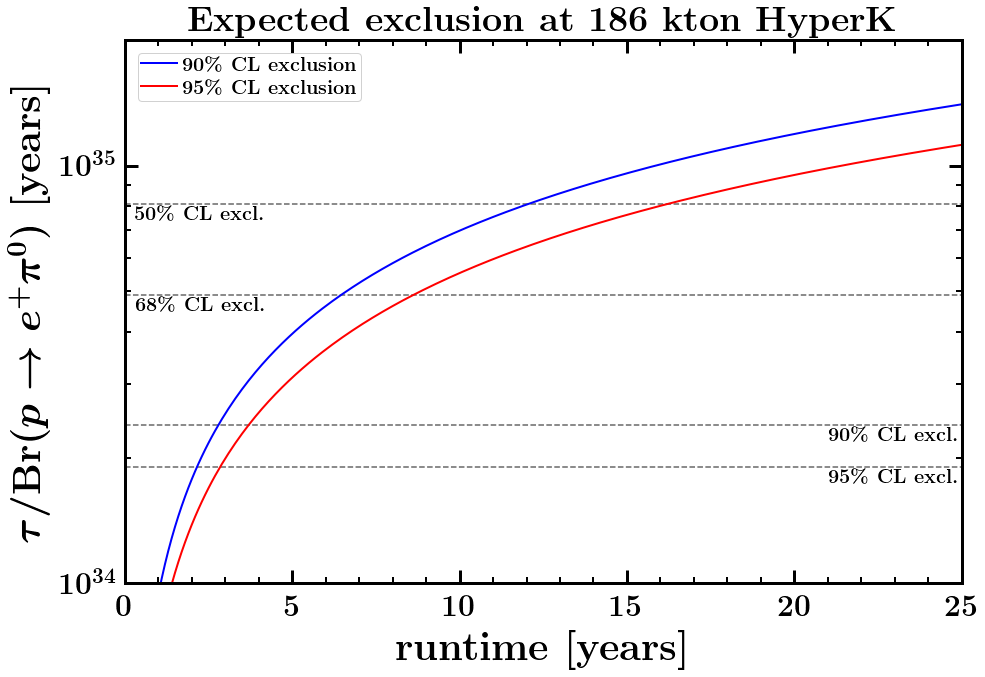

In [179]:
DETECTOR = 'HyperK'
METHOD='CLexcl'
MODE='epi'

fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_CL90, label=r'$\textrm{\bf 90\% CL exclusion}$', color='blue', lw=2)
plt.plot(runtime_array, lifetime_CL95, label=r'$\textrm{\bf 95\% CL exclusion}$', color='red', lw=2)

plt.hlines(1.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 1.9e34), (25, 1.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.4e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 2.4e34), (25, 2.4e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(4.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 4.9e34), (25, 4.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(8.1e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 8.1e34), (25, 8.1e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e34, y_max=2e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow e^+ \pi^0)$ [years]}$', title=r'$\textrm{\bf Expected exclusion at 186 kton HyperK}$', major_xtick=5, minor_xtick=1)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')
    
fig.savefig(fname='HyperK_CLexcl_epi.pdf', bbox_inches='tight')

### Fig 3.8b: Expected Z=3 evidence and Z=5 discovery

In [180]:
# #NOTE: Computation of this cell will take a very very long time, and it is better to compute these reach estimates on a cluster/supercomputer

# #X-axis: runtime in years
# runtime_array = np.arange(0.1, 25.1, 0.1)

# #Y-axis: expected reach for proton partial lifetime in years
# lifetime_Z3 = [ProtonDecay.LifetimeDiscExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, Z=3) for ty in runtime_array]
# lifetime_Z5 = [ProtonDecay.LifetimeDiscExpN(bhatarray(ty), dbhatarray(ty), epsarray, depsarray, exposurearray(ty), Np, Z=5) for ty in runtime_array]

In [181]:
#To produce the plot in real-time, the final data from the computation of the above cell is provided as a txt file.

#X-axis: runtime in years
runtime_array = np.loadtxt('PartialData/HyperK_epi_3SigmaDisc.txt', usecols=0)

#Y-axis: expected reach for various values of (signal efficiency, background rates per megaton-year of exposure) = {(0.55, 2.5), (0.26, 1.5)}
lifetime_Z3 = np.loadtxt('PartialData/HyperK_epi_3SigmaDisc.txt', usecols=1)
lifetime_Z5 = np.loadtxt('PartialData/HyperK_epi_5SigmaDisc.txt', usecols=1)

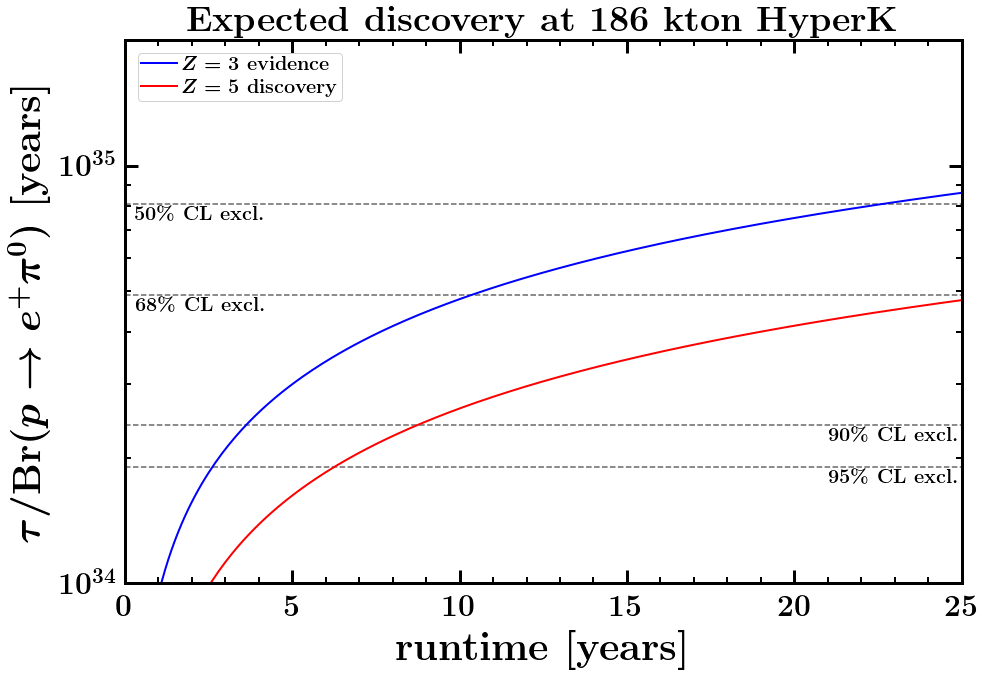

In [183]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, lifetime_Z3, label=r'$\textrm{\bf $Z = 3$ evidence}$', color='blue', lw=2)
plt.plot(runtime_array, lifetime_Z5, label=r'$\textrm{\bf $Z = 5$ discovery}$', color='red', lw=2)

plt.hlines(1.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 1.9e34), (25, 1.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.4e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 2.4e34), (25, 2.4e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(4.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 4.9e34), (25, 4.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(8.1e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 8.1e34), (25, 8.1e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e34, y_max=2e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow e^+ \pi^0)$ [years]}$', title=r'$\textrm{\bf Expected discovery at 186 kton HyperK}$', major_xtick=5, minor_xtick=1)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')
    
fig.savefig(fname='HyperK_CLdisc_epi.pdf',bbox_inches='tight')

## Fig 3.9: Expected reach for $p \rightarrow \overline{\nu} K^+$ at 17 and 80 kton THEIA

### Fig 3.9a: Expected 90% and 95% CL exclusion

In [146]:
#Inputs
NP = 3.35e32 #No of protons per kton
BPERMTONYEAR = 2.5 #b per megaton year of exposure
EPS=0.55 #signal efficiency

NKTON1 = 17 #No of ktons of detector material for THEIA-25
NKTON2 = 80 #No of ktons of detector material for THEIA-100

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of number of kilotons of detector material at THEIA
lifetime1_CL90 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, CL=0.90, CLExclbool=True) for ty in runtime_array]
lifetime1_CL95 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, CL=0.95, CLExclbool=True) for ty in runtime_array]

lifetime2_CL90 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, CL=0.90, CLExclbool=True) for ty in runtime_array]
lifetime2_CL95 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, CL=0.95, CLExclbool=True) for ty in runtime_array]

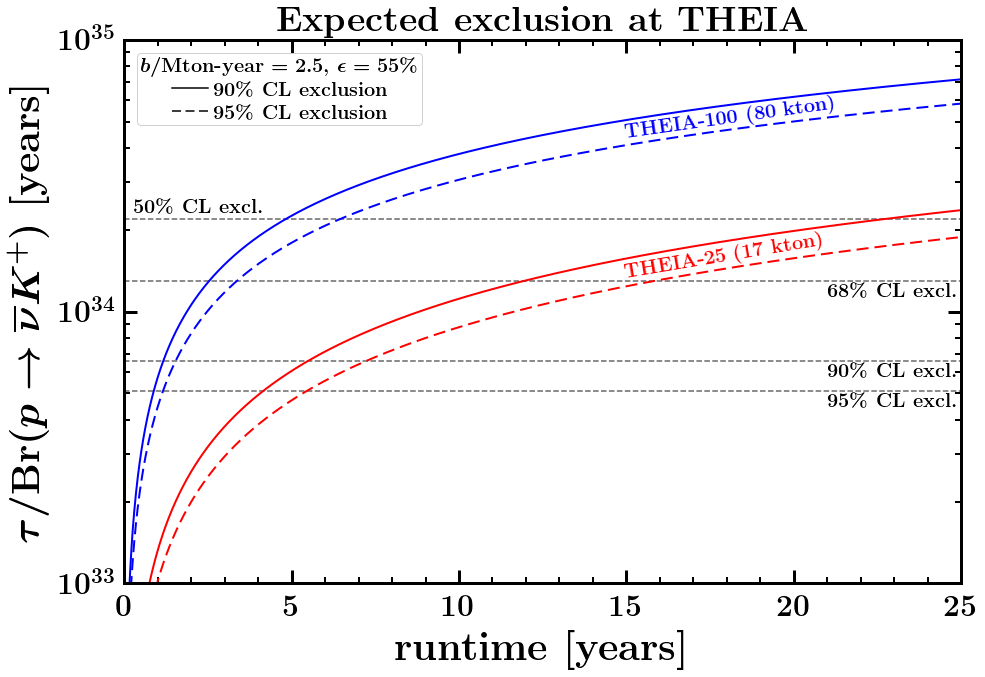

In [147]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', label=r'$\textrm{\bf 90\% CL exclusion}$')
plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf 95\% CL exclusion}$')

plt.plot(runtime_array, lifetime1_CL90, color='red', lw=2)
plt.plot(runtime_array, lifetime1_CL95, color='red', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-25 (%s kton)}$' %(NKTON1), xy=(15.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON1*15*1e-3, EPS, NKTON1*15, NP, 0.95, True)), p=(20.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON1*20*1e-3, EPS, NKTON1*20, NP, 0.95, True)), xytext=(0, 4), va='bottom', textcoords="offset points", fontsize=20, color='red')

plt.plot(runtime_array, lifetime2_CL90, color='blue', lw=2)
plt.plot(runtime_array, lifetime2_CL95, color='blue', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-100 (%s kton)}$' %(NKTON2), xy=(15.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON2*15*1e-3, EPS, NKTON2*15, NP, 0.95, True)), p=(20.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON2*20*1e-3, EPS, NKTON2*20, NP, 0.95, True)), xytext=(0, 2), va='bottom', textcoords="offset points", fontsize=20, color='blue')

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (21, 1.3e+34), (25, 1.3e+34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, +2), va='bottom', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected exclusion at THEIA}$', major_xtick=5, minor_xtick=1)
plt.legend(title=r'$\textrm{\bf $b/\textrm{Mton-year} = 2.5$, $\epsilon = 55$\%}$', title_fontsize=20, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='THEIA_CLs_nuK.pdf',bbox_inches='tight')

### Fig 3.9b: Expected Z=3 evidence and Z=5 discovery

In [148]:
#Inputs
NP = 3.35e32 #No of protons per kton
BPERMTONYEAR = 2.5 #b per megaton year of exposure
EPS=0.55 #signal efficiency

NKTON1 = 17 #No of ktons of detector material for THEIA-25
NKTON2 = 80 #No of ktons of detector material for THEIA-100

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of number of kilotons of detector material at THEIA
lifetime1_Z3 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, Z=3, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]
lifetime1_Z5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, Z=5, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

lifetime2_Z3 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, Z=3, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]
lifetime2_Z5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, Z=5, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

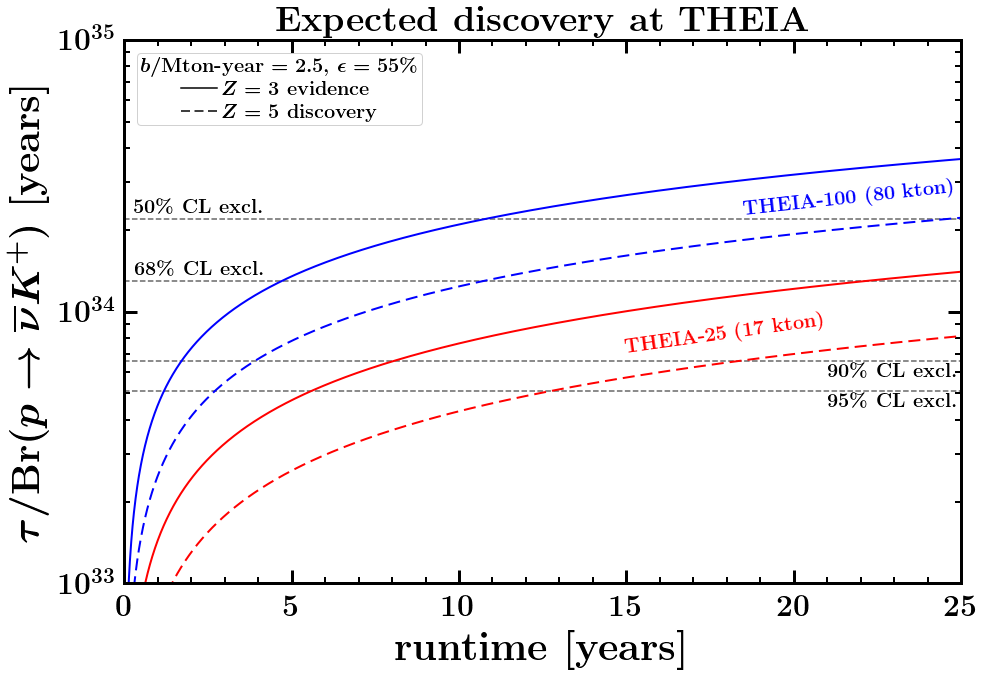

In [149]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', label=r'$\textrm{\bf $Z = 3$ evidence}$')
plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf $Z = 5$ discovery}$')

plt.plot(runtime_array, lifetime1_Z3, color='red', lw=2)
plt.plot(runtime_array, lifetime1_Z5, color='red', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-25 (%s kton)}$' %(NKTON1), xy=(15.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON1*15*1e-3, EPS, NKTON1*15, NP, 5, True, S_MIN)), p=(20.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON1*20*1e-3, EPS, NKTON1*20, NP, 5, True, S_MIN)), xytext=(0, 20), va='bottom', textcoords="offset points", fontsize=20, color='red')

plt.plot(runtime_array, lifetime2_Z3, color='blue', lw=2)
plt.plot(runtime_array, lifetime2_Z5, color='blue', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-100 (%s kton)}$' %(NKTON2), xy=(18.5, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON2*18.5*1e-3, EPS, NKTON2*18.5, NP, 5, True, S_MIN)), p=(22.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON2*22*1e-3, EPS, NKTON2*22, NP, 5, True, S_MIN)), xytext=(0, 20), va='bottom', textcoords="offset points", fontsize=20, color='blue')

plt.hlines(5.1*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (21, 5.1*10**33), (25, 5.1*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(6.6*10**33, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (21, 6.6*10**33), (25, 6.6*10**33), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(1.3e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 1.3e+34), (25, 1.3e+34), xytext=(0, +2), va='bottom', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.2e+34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 2.2e+34), (25, 2.2e+34), xytext=(0, +2), va='bottom', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e33, y_max=1e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow \overline \nu K^+)$ [years]}$', title=r'$\textrm{\bf Expected discovery at THEIA}$', major_xtick=5, minor_xtick=1)
plt.legend(title=r'$\textrm{\bf $b/\textrm{Mton-year} = 2.5$, $\epsilon = 55$\%}$', title_fontsize=20, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='THEIA_CLdisc_nuK.pdf',bbox_inches='tight')

## Fig 3.10: Expected reach for $p \rightarrow e^+ \pi^0$ at 17 and 80 kton THEIA

### Fig 3.10a: Expected 90% and 95% CL exclusion

In [150]:
#Inputs
NP = 3.35e32 #No of protons per kton
BPERMTONYEAR = 0.3 #b per megaton year of exposure
EPS=0.4 #signal efficiency

NKTON1 = 17 #No of ktons of detector material for THEIA-25
NKTON2 = 80 #No of ktons of detector material for THEIA-100

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of number of kilotons of detector material at THEIA
lifetime1_CL90 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, CL=0.90, CLExclbool=True) for ty in runtime_array]
lifetime1_CL95 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, CL=0.95, CLExclbool=True) for ty in runtime_array]

lifetime2_CL90 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, CL=0.90, CLExclbool=True) for ty in runtime_array]
lifetime2_CL95 = [ProtonDecay.LifetimeExclExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, CL=0.95, CLExclbool=True) for ty in runtime_array]

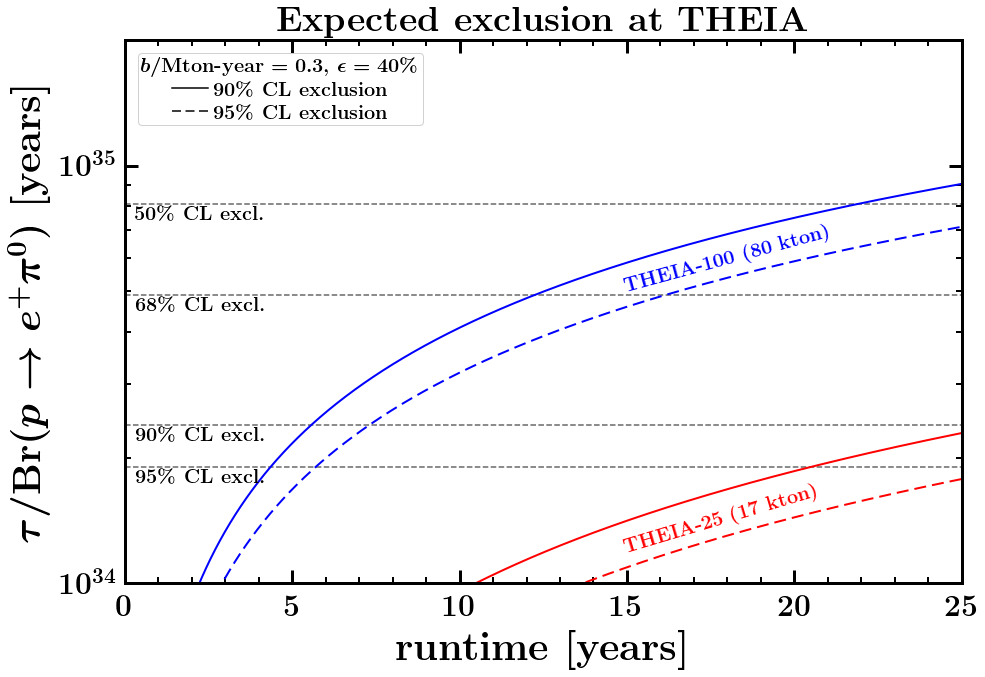

In [151]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', label=r'$\textrm{\bf 90\% CL exclusion}$')
plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf 95\% CL exclusion}$')

plt.plot(runtime_array, lifetime1_CL90, color='red', lw=2)
plt.plot(runtime_array, lifetime1_CL95, color='red', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-25 (%s kton)}$' %(NKTON1), xy=(15.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON1*15*1e-3, EPS, NKTON1*15, NP, 0.95, True)), p=(20.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON1*20*1e-3, EPS, NKTON1*20, NP, 0.95, True)), xytext=(0, 10), va='bottom', textcoords="offset points", fontsize=20, color='red')

plt.plot(runtime_array, lifetime2_CL90, color='blue', lw=2)
plt.plot(runtime_array, lifetime2_CL95, color='blue', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-100 (%s kton)}$' %(NKTON2), xy=(15.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON2*15*1e-3, EPS, NKTON2*15, NP, 0.95, True)), p=(20.0, ProtonDecay.LifetimeExclExp_Unc0(BPERMTONYEAR*NKTON2*20*1e-3, EPS, NKTON2*20, NP, 0.95, True)), xytext=(0, 10), va='bottom', textcoords="offset points", fontsize=20, color='blue')

plt.hlines(1.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (0.3, 1.9e34), (25, 1.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.4e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (0.3, 2.4e34), (25, 2.4e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(4.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 4.9e34), (25, 4.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(8.1e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 8.1e34), (25, 8.1e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e34, y_max=2e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow e^+ \pi^0)$ [years]}$', title=r'$\textrm{\bf Expected exclusion at THEIA}$', major_xtick=5, minor_xtick=1)

plt.legend(title=r'$\textrm{\bf $b/\textrm{Mton-year} = 0.3$, $\epsilon = 40$\%}$', title_fontsize=20, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='THEIA_CLs_epi.pdf',bbox_inches='tight')

### Fig 3.10b: Expected Z=3 evidence and Z=5 discovery

In [152]:
#Inputs
NP = 3.35e32 #No of protons per kton
BPERMTONYEAR = 0.3 #b per megaton year of exposure
EPS=0.4 #signal efficiency

NKTON1 = 17 #No of ktons of detector material for THEIA-25
NKTON2 = 80 #No of ktons of detector material for THEIA-100

#X-axis: runtime in years
runtime_array = np.arange(0.01, 25.01, 0.01)

#Y-axis: expected reach for various values of number of kilotons of detector material at THEIA
lifetime1_Z3 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, Z=3, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]
lifetime1_Z5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON1*ty/1e3, eps=EPS, exposure=NKTON1*ty, Np=NP, Z=5, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

lifetime2_Z3 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, Z=3, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]
lifetime2_Z5 = [ProtonDecay.LifetimeDiscExp_Unc0(b=BPERMTONYEAR*NKTON2*ty/1e3, eps=EPS, exposure=NKTON2*ty, Np=NP, Z=5, CLDiscbool=True, s_min=S_MIN) for ty in runtime_array]

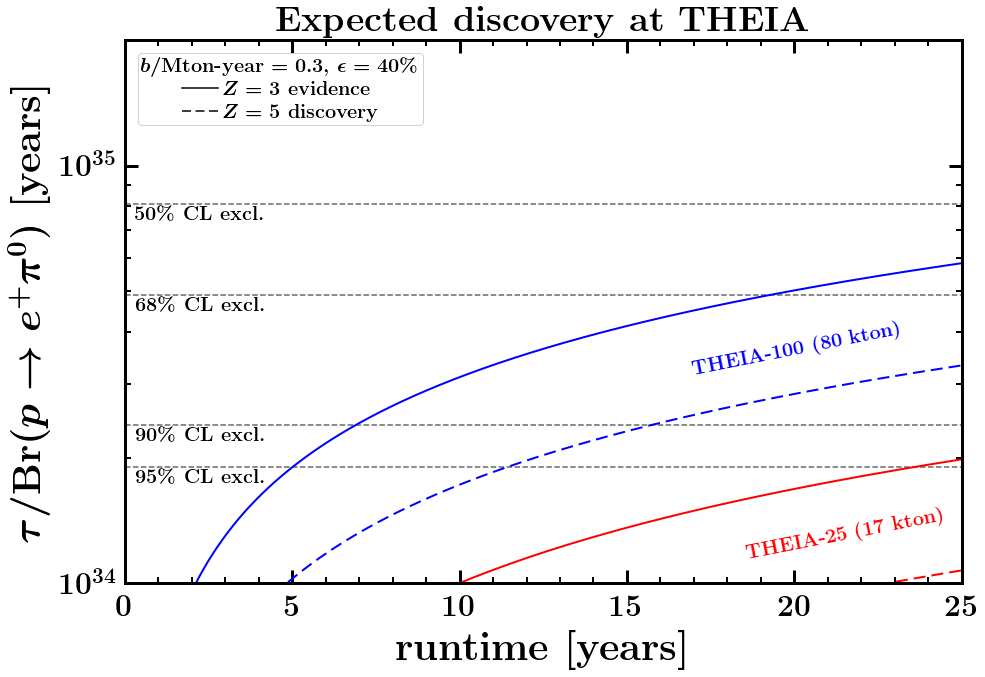

In [153]:
fig = plt.figure(figsize=(15,10))

plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', label=r'$\textrm{\bf $Z = 3$ evidence}$')
plt.plot(runtime_array, [np.nan]*len(runtime_array), color='black', ls=(0, (6, 3)), label=r'$\textrm{\bf $Z = 5$ discovery}$')

plt.plot(runtime_array, lifetime1_Z3, color='red', lw=2)
plt.plot(runtime_array, lifetime1_Z5, color='red', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-25 (%s kton)}$' %(NKTON1), xy=(18.5, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON1*18.5*1e-3, EPS, NKTON1*18.5, NP, 3, True, S_MIN)), p=(22.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON1*22*1e-3, EPS, NKTON1*22, NP, 3, True, S_MIN)), xytext=(0, -45), va='top', textcoords="offset points", fontsize=20, color='red')

plt.plot(runtime_array, lifetime2_Z3, color='blue', lw=2)
plt.plot(runtime_array, lifetime2_Z5, color='blue', ls=(0, (6, 3)), lw=2)
RotationAwareAnnotation(r'$\textrm{\bf THEIA-100 (%s kton)}$' %(NKTON2), xy=(17, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON2*17*1e-3, EPS, NKTON2*17, NP, 5, True, S_MIN)), p=(22.0, ProtonDecay.LifetimeDiscExp_Unc0(BPERMTONYEAR*NKTON2*22*1e-3, EPS, NKTON2*22, NP, 5, True, S_MIN)), xytext=(0, 35), va='bottom', textcoords="offset points", fontsize=20, color='blue')

plt.hlines(1.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $95\%$ CL excl.}$', (0.3, 1.9e34), (25, 1.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(2.4e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $90\%$ CL excl.}$', (0.3, 2.4e34), (25, 2.4e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(4.9e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $68\%$ CL excl.}$', (0.3, 4.9e34), (25, 4.9e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plt.hlines(8.1e34, xmin=0, xmax=25, color='black', ls='--', alpha=0.6, zorder=-5)
RotationAwareAnnotation(r'$\textrm{\bf $50\%$ CL excl.}$', (0.3, 8.1e34), (25, 8.1e34), xytext=(0, -2), va='top', textcoords="offset points", fontsize=20, color='black')

plot(y_scale='log', x_min=0, x_max=25, y_min=1e34, y_max=2e35, x_label=r'\textrm{\bf runtime [years]}', y_label=r'$\textrm{\bf $\tau/\textrm{\bf Br}(p \rightarrow e^+ \pi^0)$ [years]}$', title=r'$\textrm{\bf Expected discovery at THEIA}$', major_xtick=5, minor_xtick=1)

plt.legend(title=r'$\textrm{\bf $b/\textrm{Mton-year} = 0.3$, $\epsilon = 40$\%}$', title_fontsize=20, handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='upper left')

fig.savefig(fname='THEIA_CLdisc_epi.pdf', bbox_inches='tight')

# Section IV: Outlook

In [22]:
#background per Mton-year and signal efficiencies at various future experiments

#JUNO
Nkton_JUNO = 20
Np_JUNO = 6.75e33/20

#JUNO - nubar K+ channel
bperMtonyear_JUNO_nuK1 = 1.5
eps_JUNO_nuK1 = 0.26

bperMtonyear_JUNO_nuK2 = 2.5
eps_JUNO_nuK2 = 0.55

#DUNE
Nkton_DUNE = 40
Np_DUNE = 2.71e32

#DUNE - nubar K+ channel
bperMtonyear_DUNE_nuK1 = 2.5
eps_DUNE_nuK1 = 0.5

bperMtonyear_DUNE_nuK2 = 1
eps_DUNE_nuK2 = 0.5

bperMtonyear_DUNE_nuK3 = 0.25
eps_DUNE_nuK3 = 0.5

#DUNE - e+ pi0 channel
bperMtonyear_DUNE_epi = 15
eps_DUNE_epi = 0.47

#HyperK
Nkton_HK = 186
Np_HK = 3.34e32

#HyperK - nubar K+ channel
bperMtonyeararray_HK_nuK = [1916, 0.9, 0.7] #background per megaton-year of exposure
dbperMtonyeararray_HK_nuK = [0.0, 0.2, 0.2] #background uncertainty per megaton-year of exposure
bhatarray_HK_nuK = lambda runtime: [bperMtonyear*Nkton_HK*runtime/1e3 for bperMtonyear in bperMtonyeararray_HK_nuK] #background
dbhatarray_HK_nuK = lambda runtime: [dbperMtonyear*Nkton_HK*runtime/1e3 for dbperMtonyear in dbperMtonyeararray_HK_nuK] #background uncertainty
epsarray_HK_nuK = [0.31, 0.127, 0.108] #signal efficiency
depsarray_HK_nuK = [0, 0.024, 0.011] #uncertainty in signal efficiency
exposurearray_HK_nuK = lambda runtime: [Nkton_HK*runtime]*len(epsarray_HK_nuK) #exposure in kiloton-years

#HyperK - e+ pi0 channel
bperMtonyeararray_HK_epi = [0.06, 0.62] #background per megaton-year of exposure
dbperMtonyeararray_HK_epi = [0.02, 0.2] #background uncertainty per megaton-year of exposure
bhatarray_HK_epi = lambda runtime: [bperMtonyear*Nkton_HK*runtime/1e3 for bperMtonyear in bperMtonyeararray_HK_epi] #background
dbhatarray_HK_epi = lambda runtime: [dbperMtonyear*Nkton_HK*runtime/1e3 for dbperMtonyear in dbperMtonyeararray_HK_epi] #background uncertainty
epsarray_HK_epi = [0.187, 0.194] #signal efficiency
depsarray_HK_epi = [0.012, 0.029] #uncertainty in signal efficiency
exposurearray_HK_epi = lambda runtime: [Nkton_HK*runtime]*len(epsarray_HK_epi) #exposure in kiloton-years

#THEIA
Nkton_THEIAfiducial10 = 10
Nkton_THEIAfiducial25 = 25
Nkton_THEIAfiducial50 = 50
Nkton_THEIAfiducial100 = 100
Np_THEIA = 3.35e32

#THEIA100 - nubar K+ channel
bperMtonyear_THEIA_nuK = 2.5
eps_THEIA_nuK = 0.55

#THEIA100 - e+ pi0 channel
bperMtonyear_THEIA_epi = 0.3
eps_THEIA_epi = 0.4

In [6]:
#Colors, transparency of shadings in the plots
ALPHA1 = 0.35
ALPHA2 = 0.15

COLOR_EPI = 'blue'
COLOR_NUK = 'red'

#Vertical spacing of bands
YMIN = 0
YWIDTH=0.2
YDEL=YWIDTH/4
YSPACE=YWIDTH

## Fig 4.1: Summary of exclusion reaches

In [47]:
#X-axis: Exclusion reach for proton partial lifetime in years

#for single-channel experiments
Lifetime_func = lambda bMtonyear, eps, exposure, Np, CL: ProtonDecay.LifetimeExclExp_Unc0(bMtonyear*exposure/1e3, eps, exposure, Np, CL, True)

#for multi-channel experiments 
LifetimeN_func = lambda bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, CL: ProtonDecay.LifetimeExclExpN(bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, CL)

### Fig 4.1a: Expected 90% CL exclusion

In [50]:
#Confidence level for exclusion
CL = 0.90

#reaches for proton decay in various modes at various experiments after 10 and 20 years of runtime
#JUNO - nubar K+ channel
JUNO_nuK1_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*10, Np_JUNO, CL)
JUNO_nuK1_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*20, Np_JUNO, CL)

JUNO_nuK2_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*10, Np_JUNO, CL)
JUNO_nuK2_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*20, Np_JUNO, CL)

#DUNE - nubar K+ channel
DUNE_nuK1_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_nuK1_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*20, Np_DUNE, CL)

DUNE_nuK2_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_nuK2_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*20, Np_DUNE, CL)

DUNE_nuK3_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_nuK3_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*20, Np_DUNE, CL)

#DUNE - e+ pi0 channel
DUNE_epi_10yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_epi_20yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*20, Np_DUNE, CL)

#HK - nubar K+ channel
HK_nuK_10yrs = LifetimeN_func(bhatarray_HK_nuK(10), dbhatarray_HK_nuK(10), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(10), Np_HK, CL)
HK_nuK_20yrs = LifetimeN_func(bhatarray_HK_nuK(20), dbhatarray_HK_nuK(20), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(20), Np_HK, CL)

#HK - e+ pi0 channel
HK_epi_10yrs = LifetimeN_func(bhatarray_HK_epi(10), dbhatarray_HK_epi(10), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(10), Np_HK, CL)
HK_epi_20yrs = LifetimeN_func(bhatarray_HK_epi(20), dbhatarray_HK_epi(20), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(20), Np_HK, CL)

#THEIA100 - nubar K+ channel
THEIA100_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*10, Np_THEIA100, CL)
THEIA100_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*20, Np_THEIA100, CL)

#THEIA100 - e+ pi0 channel
THEIA100_epi_10yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*10, Np_THEIA100, CL)
THEIA100_epi_20yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*20, Np_THEIA100, CL)

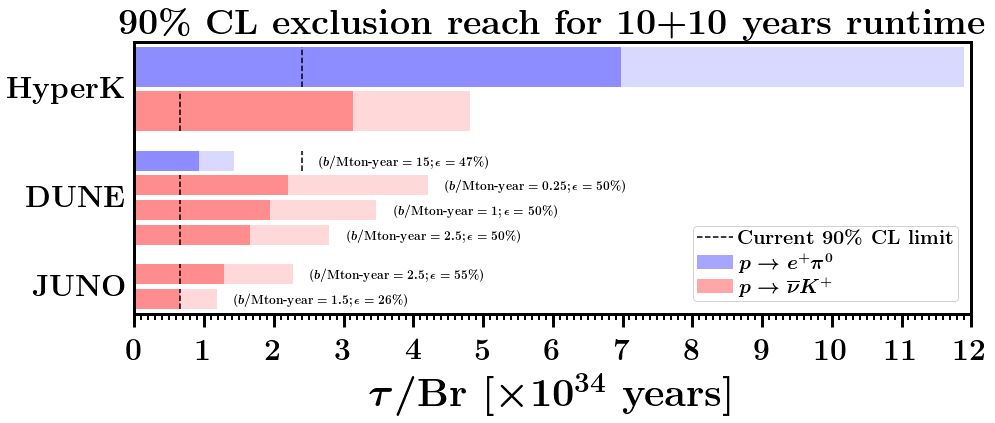

In [51]:
fig = plt.figure(figsize=(15,5))

#JUNO
y = YMIN+YDEL
## p -> nubar K+
y+=YWIDTH/2

XWIDTH=JUNO_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 1.5; \epsilon = 26$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=JUNO_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--', label=r'$\textrm{\bf Current 90\% CL limit}$')

yJUNO = YWIDTH + (3/2)*YDEL

#DUNE
## p -> nubar K+
y+=YSPACE+YWIDTH

XWIDTH=DUNE_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 1; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK3_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK3_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 0.25; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+YWIDTH

XWIDTH=DUNE_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0, label=r'$p \rightarrow e^+ \pi^0$')

XWIDTH=DUNE_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 15; \epsilon = 47\%$)}$', (2.4+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(2.4, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

yDUNE = yJUNO + YSPACE + 3*YWIDTH + 2*YDEL

#HyperK
## p -> nubar K+
y+=YSPACE+(3/2)*YWIDTH

XWIDTH=HK_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0, label=r'$\textrm{\bf $p \rightarrow \overline{\nu} K^+$}$')

XWIDTH=HK_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=HK_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=HK_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yHYPERK = yDUNE + 4*YWIDTH + 2*YDEL + YSPACE

#Plot style
plot(xl_rotate=0, x_scale='linear', x_label=r'$\textrm{\bf $\tau/{\rm Br}$ [$\times 10^{34}$ years]}$', title=r'$\textrm{\bf %s%s CL exclusion reach for 10+10 years runtime}$' %(round(100*CL), '\%'),
     x_min=0, x_max=12,
     y_min=0, y_max=y+YWIDTH+YDEL,
     major_xtick=1, minor_xtick=0.1,
    )
plt.yticks(ticks=[yJUNO, yDUNE, yHYPERK], labels=[r'$\textrm{\bf JUNO}$', r'$\textrm{\bf DUNE}$', r'$\textrm{\bf HyperK}$'])
plt.rc('ytick', labelsize=30, direction='in', right=False, labelright=False)
plt.rcParams['ytick.major.size'] = 0
plt.rc('xtick', labelsize=30, direction='out', top=False, labeltop=False)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

fig.savefig(fname='Reach_%sclexcl.pdf' %(round(CL*100)),bbox_inches='tight')

### Fig 4.1b: Expected 95% CL exclusion

In [48]:
#Confidence level for exclusion
CL = 0.95

#reaches for proton decay in various modes at various experiments after 10 and 20 years of runtime
#JUNO - nubar K+ channel
JUNO_nuK1_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*10, Np_JUNO, CL)
JUNO_nuK1_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*20, Np_JUNO, CL)

JUNO_nuK2_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*10, Np_JUNO, CL)
JUNO_nuK2_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*20, Np_JUNO, CL)

#DUNE - nubar K+ channel
DUNE_nuK1_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_nuK1_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*20, Np_DUNE, CL)

DUNE_nuK2_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_nuK2_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*20, Np_DUNE, CL)

DUNE_nuK3_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_nuK3_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*20, Np_DUNE, CL)

#DUNE - e+ pi0 channel
DUNE_epi_10yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*10, Np_DUNE, CL)
DUNE_epi_20yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*20, Np_DUNE, CL)

#HK - nubar K+ channel
HK_nuK_10yrs = LifetimeN_func(bhatarray_HK_nuK(10), dbhatarray_HK_nuK(10), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(10), Np_HK, CL)
HK_nuK_20yrs = LifetimeN_func(bhatarray_HK_nuK(20), dbhatarray_HK_nuK(20), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(20), Np_HK, CL)

#HK - e+ pi0 channel
HK_epi_10yrs = LifetimeN_func(bhatarray_HK_epi(10), dbhatarray_HK_epi(10), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(10), Np_HK, CL)
HK_epi_20yrs = LifetimeN_func(bhatarray_HK_epi(20), dbhatarray_HK_epi(20), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(20), Np_HK, CL)

#THEIA100 - nubar K+ channel
THEIA100_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*10, Np_THEIA100, CL)
THEIA100_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*20, Np_THEIA100, CL)

#THEIA100 - e+ pi0 channel
THEIA100_epi_10yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*10, Np_THEIA100, CL)
THEIA100_epi_20yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*20, Np_THEIA100, CL)

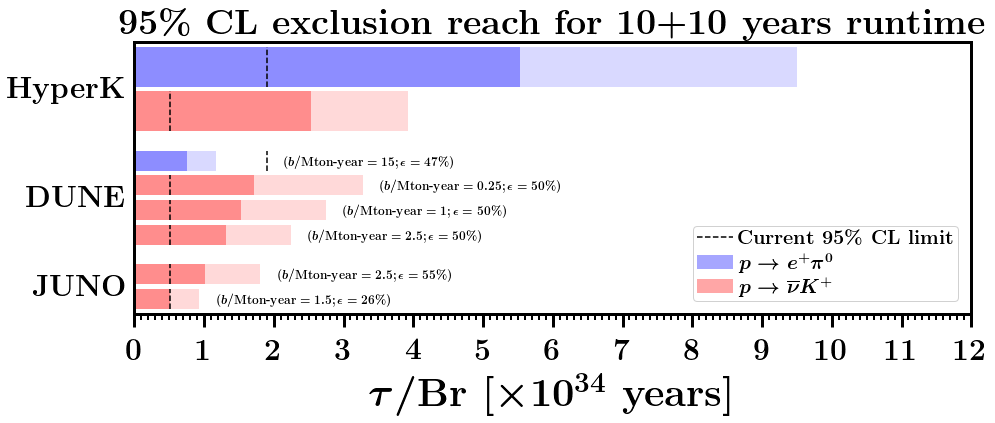

In [49]:
fig = plt.figure(figsize=(15,5))

#JUNO
y = YMIN+YDEL
## p -> nubar K+
y+=YWIDTH/2

XWIDTH=JUNO_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 1.5; \epsilon = 26$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.51, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=JUNO_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.51, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--', label=r'$\textrm{\bf Current 95\% CL limit}$')

yJUNO = YWIDTH + (3/2)*YDEL

#DUNE
## p -> nubar K+
y+=YSPACE+YWIDTH

XWIDTH=DUNE_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.51, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 1; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.51, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK3_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK3_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 0.25; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.51, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+YWIDTH

XWIDTH=DUNE_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0, label=r'$p \rightarrow e^+ \pi^0$')

XWIDTH=DUNE_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 15; \epsilon = 47\%$)}$', (1.9+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(1.9, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

yDUNE = yJUNO + YSPACE + 3*YWIDTH + 2*YDEL

#HyperK
## p -> nubar K+
y+=YSPACE+(3/2)*YWIDTH

XWIDTH=HK_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0, label=r'$\textrm{\bf $p \rightarrow \overline{\nu} K^+$}$')

XWIDTH=HK_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.51, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=HK_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=HK_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(1.9, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yHYPERK = yDUNE + 4*YWIDTH + 2*YDEL + YSPACE

#Plot style
plot(xl_rotate=0, x_scale='linear', x_label=r'$\textrm{\bf $\tau/{\rm Br}$ [$\times 10^{34}$ years]}$', title=r'$\textrm{\bf %s%s CL exclusion reach for 10+10 years runtime}$' %(round(100*CL), '\%'),
     x_min=0, x_max=12,
     y_min=0, y_max=y+YWIDTH+YDEL,
     major_xtick=1, minor_xtick=0.1,
    )
plt.yticks(ticks=[yJUNO, yDUNE, yHYPERK], labels=[r'$\textrm{\bf JUNO}$', r'$\textrm{\bf DUNE}$', r'$\textrm{\bf HyperK}$'])
plt.rc('ytick', labelsize=30, direction='in', right=False, labelright=False)
plt.rcParams['ytick.major.size'] = 0
plt.rc('xtick', labelsize=30, direction='out', top=False, labeltop=False)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

fig.savefig(fname='Reach_%sclexcl.pdf' %(round(CL*100)),bbox_inches='tight')

## Fig 4.2: Summary of discovery reaches

In [102]:
#X-axis: Discovery reach for proton partial lifetime in years

#for single-channel experiments
Lifetime_func = lambda bMtonyear, eps, exposure, Np, Z: ProtonDecay.LifetimeDiscExp_Unc0(bMtonyear*exposure/1e3, eps, exposure, Np, Z, True, s_min=1)

#for multi-channel experiments 
LifetimeN_func = lambda bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, Z: ProtonDecay.LifetimeDiscExpN(bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, Z)

### Fig 4.2a: Expected Z=3 evidence

In [103]:
#Significance for discovery
Z = 3

#reaches for proton decay in various modes at various experiments after 10 and 20 years of runtime
#JUNO - nubar K+ channel
JUNO_nuK1_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*10, Np_JUNO, Z)
JUNO_nuK1_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*20, Np_JUNO, Z)

JUNO_nuK2_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*10, Np_JUNO, Z)
JUNO_nuK2_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*20, Np_JUNO, Z)

#DUNE - nubar K+ channel
DUNE_nuK1_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_nuK1_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*20, Np_DUNE, Z)

DUNE_nuK2_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_nuK2_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*20, Np_DUNE, Z)

DUNE_nuK3_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_nuK3_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*20, Np_DUNE, Z)

#DUNE - e+ pi0 channel
DUNE_epi_10yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_epi_20yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*20, Np_DUNE, Z)

#HK - nubar K+ channel
HK_nuK_10yrs = LifetimeN_func(bhatarray_HK_nuK(10), dbhatarray_HK_nuK(10), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(10), Np_HK, Z)
HK_nuK_20yrs = LifetimeN_func(bhatarray_HK_nuK(20), dbhatarray_HK_nuK(20), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(20), Np_HK, Z)

#HK - e+ pi0 channel
HK_epi_10yrs = LifetimeN_func(bhatarray_HK_epi(10), dbhatarray_HK_epi(10), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(10), Np_HK, Z)
HK_epi_20yrs = LifetimeN_func(bhatarray_HK_epi(20), dbhatarray_HK_epi(20), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(20), Np_HK, Z)

#THEIA100 - nubar K+ channel
THEIA100_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*10, Np_THEIA100, Z)
THEIA100_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*20, Np_THEIA100, Z)

#THEIA100 - e+ pi0 channel
THEIA100_epi_10yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*10, Np_THEIA100, Z)
THEIA100_epi_20yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*20, Np_THEIA100, Z)

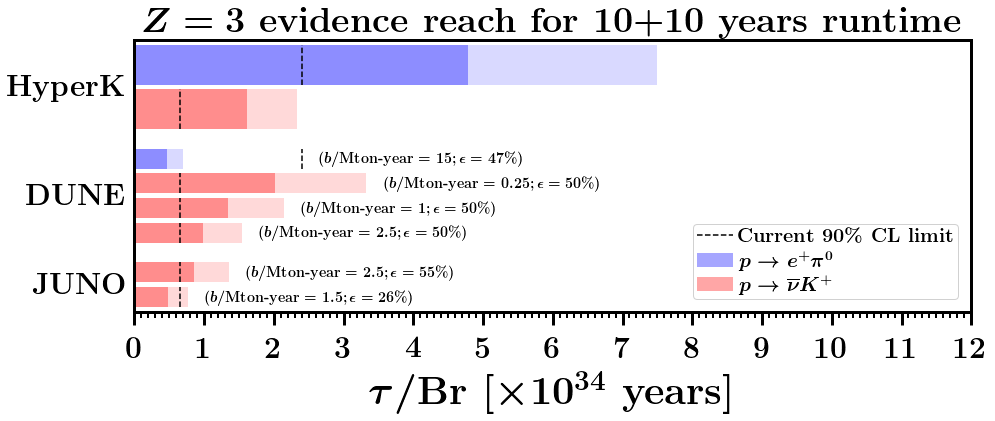

In [105]:
fig = plt.figure(figsize=(15,5))

#JUNO
y = YMIN+YDEL
## p -> nubar K+
y+=YWIDTH/2

XWIDTH=JUNO_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 1.5; \epsilon = 26$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=JUNO_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--', label=r'$\textrm{\bf Current 90\% CL limit}$')

yJUNO = YWIDTH + (3/2)*YDEL

#DUNE
## p -> nubar K+
y+=YSPACE+YWIDTH

XWIDTH=DUNE_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 1; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK3_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK3_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 0.25; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+YWIDTH

XWIDTH=DUNE_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0, label=r'$p \rightarrow e^+ \pi^0$')

XWIDTH=DUNE_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 15; \epsilon = 47\%$)}$', (2.4+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(2.4, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

yDUNE = yJUNO + YSPACE + 3*YWIDTH + 2*YDEL

#HyperK
## p -> nubar K+
y+=YSPACE+(3/2)*YWIDTH

XWIDTH=HK_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0, label=r'$\textrm{\bf $p \rightarrow \overline{\nu} K^+$}$')

XWIDTH=HK_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=HK_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=HK_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yHYPERK = yDUNE + 4*YWIDTH + 2*YDEL + YSPACE

#Plot style
plot(xl_rotate=0, x_scale='linear', x_label=r'$\textrm{\bf $\tau/{\rm Br}$ [$\times 10^{34}$ years]}$', title=r'$\textrm{\bf $Z = %s$ evidence reach for 10+10 years runtime}$' %(Z),
     x_min=0, x_max=12,
     y_min=0, y_max=y+YWIDTH+YDEL,
     major_xtick=1, minor_xtick=0.1,
     #major_ytick=1, minor_ytick=0.1
    )
plt.yticks(ticks=[yJUNO, yDUNE, yHYPERK], labels=[r'$\textrm{\bf JUNO}$', r'$\textrm{\bf DUNE}$', r'$\textrm{\bf HyperK}$'])
plt.rc('ytick', labelsize=30, direction='in', right=False, labelright=False)
plt.rcParams['ytick.major.size'] = 0
plt.rc('xtick', labelsize=30, direction='out', top=False, labeltop=False)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

fig.savefig(fname='Reach_%ssigmadisc.pdf' %(Z),bbox_inches='tight')

### Fig 4.2b: Expected Z=5 discovery

In [106]:
#Significance for discovery
Z = 5

#reaches for proton decay in various modes at various experiments after 10 and 20 years of runtime
#JUNO - nubar K+ channel
JUNO_nuK1_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*10, Np_JUNO, Z)
JUNO_nuK1_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK1, eps_JUNO_nuK1, Nkton_JUNO*20, Np_JUNO, Z)

JUNO_nuK2_10yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*10, Np_JUNO, Z)
JUNO_nuK2_20yrs = Lifetime_func(bperMtonyear_JUNO_nuK2, eps_JUNO_nuK2, Nkton_JUNO*20, Np_JUNO, Z)

#DUNE - nubar K+ channel
DUNE_nuK1_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_nuK1_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK1, eps_DUNE_nuK1, Nkton_DUNE*20, Np_DUNE, Z)

DUNE_nuK2_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_nuK2_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK2, eps_DUNE_nuK2, Nkton_DUNE*20, Np_DUNE, Z)

DUNE_nuK3_10yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_nuK3_20yrs = Lifetime_func(bperMtonyear_DUNE_nuK3, eps_DUNE_nuK3, Nkton_DUNE*20, Np_DUNE, Z)

#DUNE - e+ pi0 channel
DUNE_epi_10yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*10, Np_DUNE, Z)
DUNE_epi_20yrs = Lifetime_func(bperMtonyear_DUNE_epi, eps_DUNE_epi, Nkton_DUNE*20, Np_DUNE, Z)

#HK - nubar K+ channel
HK_nuK_10yrs = LifetimeN_func(bhatarray_HK_nuK(10), dbhatarray_HK_nuK(10), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(10), Np_HK, Z)
HK_nuK_20yrs = LifetimeN_func(bhatarray_HK_nuK(20), dbhatarray_HK_nuK(20), epsarray_HK_nuK, depsarray_HK_nuK, exposurearray_HK_nuK(20), Np_HK, Z)

#HK - e+ pi0 channel
HK_epi_10yrs = LifetimeN_func(bhatarray_HK_epi(10), dbhatarray_HK_epi(10), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(10), Np_HK, Z)
HK_epi_20yrs = LifetimeN_func(bhatarray_HK_epi(20), dbhatarray_HK_epi(20), epsarray_HK_epi, depsarray_HK_epi, exposurearray_HK_epi(20), Np_HK, Z)

#THEIA100 - nubar K+ channel
THEIA100_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*10, Np_THEIA100, Z)
THEIA100_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA100_nuK, eps_THEIA100_nuK, Nkton_THEIA100*20, Np_THEIA100, Z)

#THEIA100 - e+ pi0 channel
THEIA100_epi_10yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*10, Np_THEIA100, Z)
THEIA100_epi_20yrs = Lifetime_func(bperMtonyear_THEIA100_epi, eps_THEIA100_epi, Nkton_THEIA100*20, Np_THEIA100, Z)

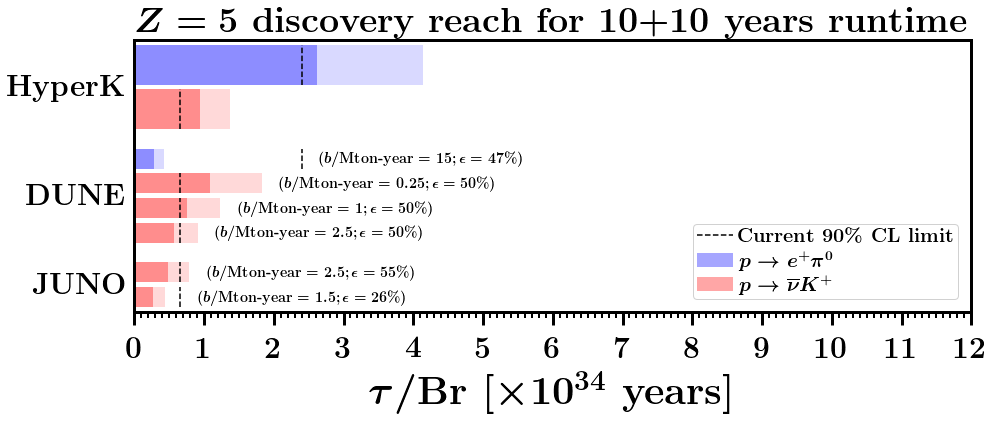

In [107]:
fig = plt.figure(figsize=(15,5))

#JUNO
y = YMIN+YDEL
## p -> nubar K+
y+=YWIDTH/2

XWIDTH=JUNO_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 1.5; \epsilon = 26$\%)}$', (0.66+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=JUNO_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=JUNO_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55$\%)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--', label=r'$\textrm{\bf Current 90\% CL limit}$')

yJUNO = YWIDTH + (3/2)*YDEL

#DUNE
## p -> nubar K+
y+=YSPACE+YWIDTH

XWIDTH=DUNE_nuK1_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK1_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK2_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK2_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 1; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

y+=YDEL+YWIDTH

XWIDTH=DUNE_nuK3_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=DUNE_nuK3_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 0.25; \epsilon = 50\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+YWIDTH

XWIDTH=DUNE_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0, label=r'$p \rightarrow e^+ \pi^0$')

XWIDTH=DUNE_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

RotationAwareAnnotation(r'$\textrm{\bf \Large ($b/\textrm{\bf Mton-year} = 15; \epsilon = 47\%$)}$', (2.4+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(2.4, y-YWIDTH/2, y+YWIDTH/2, color='black', ls='--')

yDUNE = yJUNO + YSPACE + 3*YWIDTH + 2*YDEL

#HyperK
## p -> nubar K+
y+=YSPACE+(3/2)*YWIDTH

XWIDTH=HK_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0, label=r'$\textrm{\bf $p \rightarrow \overline{\nu} K^+$}$')

XWIDTH=HK_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=HK_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=HK_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yHYPERK = yDUNE + 4*YWIDTH + 2*YDEL + YSPACE

#Plot style
plot(xl_rotate=0, x_scale='linear', x_label=r'$\textrm{\bf $\tau/{\rm Br}$ [$\times 10^{34}$ years]}$', title=r'$\textrm{\bf $Z = %s$ discovery reach for 10+10 years runtime}$' %(Z),
     x_min=0, x_max=12,
     y_min=0, y_max=y+YWIDTH+YDEL,
     major_xtick=1, minor_xtick=0.1,
     #major_ytick=1, minor_ytick=0.1
    )
plt.yticks(ticks=[yJUNO, yDUNE, yHYPERK], labels=[r'$\textrm{\bf JUNO}$', r'$\textrm{\bf DUNE}$', r'$\textrm{\bf HyperK}$'])
plt.rc('ytick', labelsize=30, direction='in', right=False, labelright=False)
plt.rcParams['ytick.major.size'] = 0
plt.rc('xtick', labelsize=30, direction='out', top=False, labeltop=False)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

fig.savefig(fname='Reach_%ssigmadisc.pdf' %(Z),bbox_inches='tight')

## Fig 4.3: Summary of 95% exclusion and Z=5 discovery reaches at THEIA

### Fig 4.3a: Expected 95% CL exclusion

In [99]:
#X-axis: Exclusion reach for proton partial lifetime in years

#for single-channel experiments
Lifetime_func = lambda bMtonyear, eps, exposure, Np, CL: ProtonDecay.LifetimeExclExp_Unc0(bMtonyear*exposure/1e3, eps, exposure, Np, CL, True)

#for multi-channel experiments 
LifetimeN_func = lambda bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, CL: ProtonDecay.LifetimeExclExpN(bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, CL)

In [100]:
#Confidence level for exclusion
CL = 0.95

#reaches for proton decay in various modes at various experiments after 10 and 20 years of runtime

#THEIA100 - nubar K+ channel
THEIAfiducial10_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial10*10, Np_THEIA, CL)
THEIAfiducial10_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial10*20, Np_THEIA, CL)

THEIAfiducial25_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial25*10, Np_THEIA, CL)
THEIAfiducial25_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial25*20, Np_THEIA, CL)

THEIAfiducial50_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial50*10, Np_THEIA, CL)
THEIAfiducial50_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial50*20, Np_THEIA, CL)

THEIAfiducial100_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial100*10, Np_THEIA, CL)
THEIAfiducial100_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial100*20, Np_THEIA, CL)

#THEIA100 - e+ pi0 channel
THEIAfiducial10_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial10*10, Np_THEIA, CL)
THEIAfiducial10_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial10*20, Np_THEIA, CL)

THEIAfiducial25_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial25*10, Np_THEIA, CL)
THEIAfiducial25_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial25*20, Np_THEIA, CL)

THEIAfiducial50_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial50*10, Np_THEIA, CL)
THEIAfiducial50_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial50*20, Np_THEIA, CL)

THEIAfiducial100_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial100*10, Np_THEIA, CL)
THEIAfiducial100_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial100*20, Np_THEIA, CL)

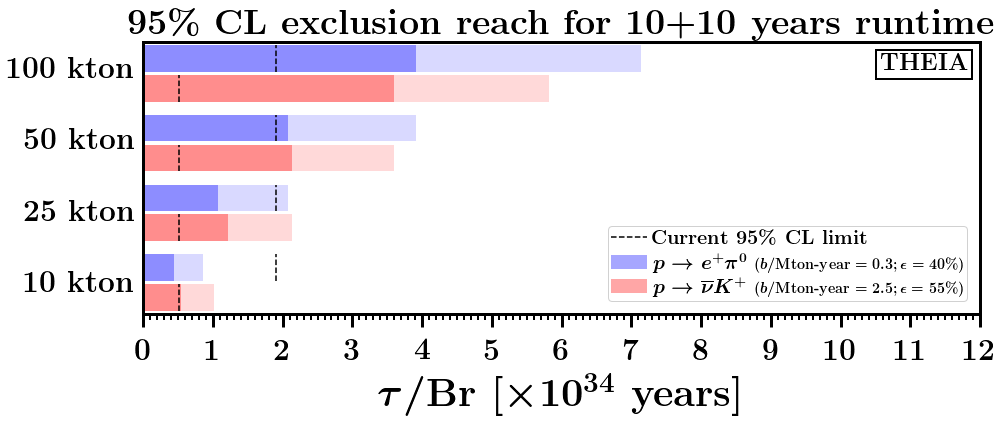

In [101]:
fig = plt.figure(figsize=(15,5))

#THEIA 10
## p -> nubar K+
y = YMIN+YDEL+YWIDTH

XWIDTH=THEIAfiducial10_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=THEIAfiducial10_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

#RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55\%$)}$', (XWIDTH+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.51, y-YWIDTH, y+YWIDTH, color='black', ls='--', label=r'$\textrm{\bf Current 95\% CL limit}$')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial10_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0, label=r'$\textrm{\bf $p \rightarrow e^+ \pi^0$ {\Large ($b/\textrm{\bf Mton-year} = 0.3; \epsilon = 40\%$)}}$')

XWIDTH=THEIAfiducial10_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

#RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 0.3; \epsilon = 40\%$)}$', (1.9+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(1.9, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial10 = YMIN + 2*YWIDTH + (3/2)*YDEL

#THEIA 25
## p -> nubar K+
y+=YSPACE+2*YWIDTH

XWIDTH=THEIAfiducial25_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0, label=r'$\textrm{\bf $p \rightarrow \overline{\nu} K^+$ {\Large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55\%$)}}$')

XWIDTH=THEIAfiducial25_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.51, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial25_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=THEIAfiducial25_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(1.9, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial25 = yTHEIAfiducial10 + 4*YWIDTH + YSPACE + (3/2)*YDEL

#THEIA 50
## p -> nubar K+
y+=YSPACE+2*YWIDTH

XWIDTH=THEIAfiducial50_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=THEIAfiducial50_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.51, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial50_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=THEIAfiducial50_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(1.9, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial50 = yTHEIAfiducial25 + 4*YWIDTH + YSPACE + (3/2)*YDEL

#THEIA 100
## p -> nubar K+
y+=YSPACE+2*YWIDTH

XWIDTH=THEIAfiducial100_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=THEIAfiducial100_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.51, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial100_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=THEIAfiducial100_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(1.9, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial100 = yTHEIAfiducial50 + 4*YWIDTH + YSPACE + (3/2)*YDEL

#Plot style
plot(xl_rotate=0, x_scale='linear', x_label=r'$\textrm{\bf $\tau/{\rm Br}$ [$\times 10^{34}$ years]}$', title=r'$\textrm{\bf %s%s CL exclusion reach for 10+10 years runtime}$' %(round(100*CL), '\%'),
     x_min=0, x_max=12,
     y_min=0, y_max=y+YWIDTH+YDEL,
     major_xtick=1, minor_xtick=0.1,
    )
plt.yticks(ticks=[yTHEIAfiducial10, yTHEIAfiducial25, yTHEIAfiducial50, yTHEIAfiducial100], labels=[r'$\textrm{\bf 10 kton}$', r'$\textrm{\bf 25 kton}$', r'$\textrm{\bf 50 kton}$', r'$\textrm{\bf 100 kton}$'])
plt.rc('ytick', labelsize=30, direction='in', right=False, labelright=False)
plt.rcParams['ytick.major.size'] = 0
plt.rc('xtick', labelsize=30, direction='out', top=False, labeltop=False)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

RotationAwareAnnotation(r'$\textrm{\bf THEIA}$', xy=(12, y+YWIDTH+YDEL), p=(12, y+YWIDTH+YDEL), xytext=(-12, -12), ha='right', va='top', textcoords="offset points", fontsize=24, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='THEIA_Reach_%sclexcl.pdf' %(round(CL*100)),bbox_inches='tight')

### Fig 4.3b: Expected Z=5 discovery

In [92]:
#X-axis: Discovery reach for proton partial lifetime in years

#for single-channel experiments
Lifetime_func = lambda bMtonyear, eps, exposure, Np, Z: ProtonDecay.LifetimeDiscExp_Unc0(bMtonyear*exposure/1e3, eps, exposure, Np, Z, True, s_min=1)

#for multi-channel experiments 
LifetimeN_func = lambda bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, Z: ProtonDecay.LifetimeDiscExpN(bhatarray, dbhatarray, epsarray, depsarray, exposurearray, Np, Z)

In [93]:
#Confidence level for exclusion
Z = 5

#reaches for proton decay in various modes at various experiments after 10 and 20 years of runtime

#THEIA100 - nubar K+ channel
THEIAfiducial10_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial10*10, Np_THEIA, Z)
THEIAfiducial10_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial10*20, Np_THEIA, Z)

THEIAfiducial25_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial25*10, Np_THEIA, Z)
THEIAfiducial25_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial25*20, Np_THEIA, Z)

THEIAfiducial50_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial50*10, Np_THEIA, Z)
THEIAfiducial50_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial50*20, Np_THEIA, Z)

THEIAfiducial100_nuK_10yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial100*10, Np_THEIA, Z)
THEIAfiducial100_nuK_20yrs = Lifetime_func(bperMtonyear_THEIA_nuK, eps_THEIA_nuK, Nkton_THEIAfiducial100*20, Np_THEIA, Z)

#THEIA100 - e+ pi0 channel
THEIAfiducial10_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial10*10, Np_THEIA, Z)
THEIAfiducial10_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial10*20, Np_THEIA, Z)

THEIAfiducial25_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial25*10, Np_THEIA, Z)
THEIAfiducial25_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial25*20, Np_THEIA, Z)

THEIAfiducial50_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial50*10, Np_THEIA, Z)
THEIAfiducial50_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial50*20, Np_THEIA, Z)

THEIAfiducial100_epi_10yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial100*10, Np_THEIA, Z)
THEIAfiducial100_epi_20yrs = Lifetime_func(bperMtonyear_THEIA_epi, eps_THEIA_epi, Nkton_THEIAfiducial100*20, Np_THEIA, Z)

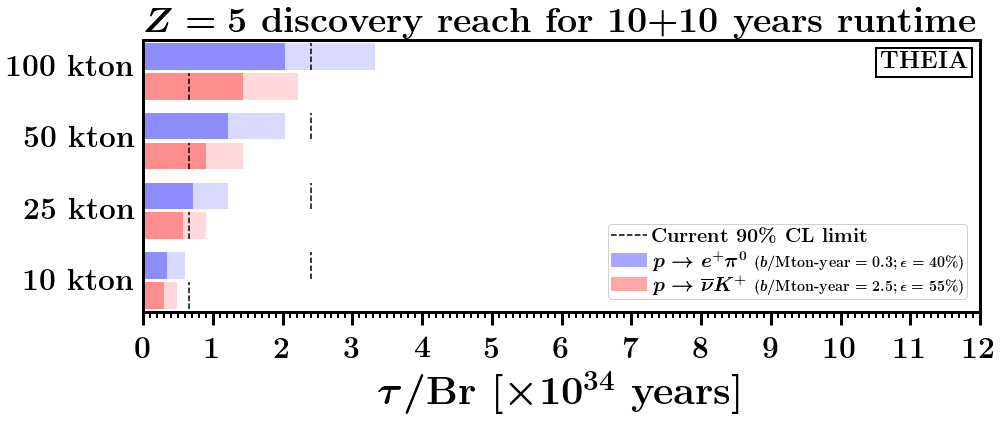

In [98]:
fig = plt.figure(figsize=(15,5))

#THEIA 10
## p -> nubar K+
y = YMIN+YDEL+YWIDTH

XWIDTH=THEIAfiducial10_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=THEIAfiducial10_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

#RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55\%$)}$', (0.66+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--', label=r'$\textrm{\bf Current 90\% CL limit}$')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial10_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0, label=r'$\textrm{\bf $p \rightarrow e^+ \pi^0$ {\Large ($b/\textrm{\bf Mton-year} = 0.3; \epsilon = 40\%$)}}$')

XWIDTH=THEIAfiducial10_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

#RotationAwareAnnotation(r'$\textrm{\bf \large ($b/\textrm{\bf Mton-year} = 0.3; \epsilon = 40\%$)}$', (2.4+0.25, y), (25, y), xytext=(0, 0), va='center', textcoords="offset points", fontsize=20, color='black')
plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial10 = YMIN + 2*YWIDTH + (3/2)*YDEL

#THEIA 25
## p -> nubar K+
y+=YSPACE+2*YWIDTH

XWIDTH=THEIAfiducial25_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0, label=r'$\textrm{\bf $p \rightarrow \overline{\nu} K^+$ {\Large ($b/\textrm{\bf Mton-year} = 2.5; \epsilon = 55\%$)}}$')

XWIDTH=THEIAfiducial25_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial25_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=THEIAfiducial25_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial25 = yTHEIAfiducial10 + 4*YWIDTH + YSPACE + (3/2)*YDEL

#THEIA 50
## p -> nubar K+
y+=YSPACE+2*YWIDTH

XWIDTH=THEIAfiducial50_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=THEIAfiducial50_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial50_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=THEIAfiducial50_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial50 = yTHEIAfiducial25 + 4*YWIDTH + YSPACE + (3/2)*YDEL

#THEIA 100
## p -> nubar K+
y+=YSPACE+2*YWIDTH

XWIDTH=THEIAfiducial100_nuK_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA1, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

XWIDTH=THEIAfiducial100_nuK_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_NUK, alpha=ALPHA2, fill=1, ec=COLOR_NUK, fc=COLOR_NUK, lw=0)

plt.vlines(0.66, y-YWIDTH, y+YWIDTH, color='black', ls='--')

## p -> e+ pi0
y+=YDEL+2*YWIDTH

XWIDTH=THEIAfiducial100_epi_10yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA1, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

XWIDTH=THEIAfiducial100_epi_20yrs/1e34
plt.barh(y=y, width=XWIDTH, height=2*YWIDTH, color=COLOR_EPI, alpha=ALPHA2, fill=1, ec=COLOR_EPI, fc=COLOR_EPI, lw=0)

plt.vlines(2.4, y-YWIDTH, y+YWIDTH, color='black', ls='--')

yTHEIAfiducial100 = yTHEIAfiducial50 + 4*YWIDTH + YSPACE + (3/2)*YDEL

#Plot style
plot(xl_rotate=0, x_scale='linear', x_label=r'$\textrm{\bf $\tau/{\rm Br}$ [$\times 10^{34}$ years]}$', title=r'$\textrm{\bf $Z = %s$ discovery reach for 10+10 years runtime}$' %(Z),
     x_min=0, x_max=12,
     y_min=0, y_max=y+YWIDTH+YDEL,
     major_xtick=1, minor_xtick=0.1,
     #major_ytick=1, minor_ytick=0.1
    )
plt.yticks(ticks=[yTHEIAfiducial10, yTHEIAfiducial25, yTHEIAfiducial50, yTHEIAfiducial100], labels=[r'$\textrm{\bf 10 kton}$', r'$\textrm{\bf 25 kton}$', r'$\textrm{\bf 50 kton}$', r'$\textrm{\bf 100 kton}$'])
plt.rc('ytick', labelsize=30, direction='in', right=False, labelright=False)
plt.rcParams['ytick.major.size'] = 0
plt.rc('xtick', labelsize=30, direction='out', top=False, labeltop=False)

plt.legend(handlelength=1.8,handletextpad=0.25,labelspacing=0.25,borderpad=0.175,borderaxespad=0.65, loc='lower right')

RotationAwareAnnotation(r'$\textrm{\bf THEIA}$', xy=(12, y+YWIDTH+YDEL), p=(12, y+YWIDTH+YDEL), xytext=(-12, -12), ha='right', va='top', textcoords="offset points", fontsize=24, bbox=dict(facecolor='white', alpha=1, edgecolor='black', linewidth=2))

fig.savefig(fname='THEIA_Reach_%ssigmadisc.pdf' %(Z),bbox_inches='tight')